In [1]:
import numpy as np
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam
import numpy as np
import pandas as pd
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Flatten
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.losses import Huber
from sklearn.model_selection import TimeSeriesSplit
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.impute import KNNImputer
import random
import tensorflow as tf
from sklearn.neighbors import KNeighborsRegressor
from haversine import haversine, Unit
from tensorflow.keras.layers import LSTM, Dense, Dropout
import numpy as np
import pandas as pd
from shapely.geometry import Polygon
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# Function to plot research activity in a given subplot
def plot_research_activity(ax, csv_path, keywords):
    # Read the data into a pandas DataFrame
    data = pd.read_csv(csv_path)

    # Create a line plot of the publications over time
    ax.plot(data['Category'], data['Publications (total)'], marker='o', label=f'"{keywords}"')

    # Filling the area below the line plot
    ax.fill_between(data['Category'], data['Publications (total)'], step="pre", alpha=0.1)

    # Improving the layout
    ax.grid(True)
    ax.set_xlabel('Year', fontsize=16)
    ax.set_ylabel('Number of Publications', fontsize=16)
    ax.set_title(f'Research Activity on "{keywords}"', fontsize=18)

    # Ensuring the x-axis only shows integer year values
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.tick_params(axis='both', which='major', labelsize=14)  # Increase tick label size

# Paths to CSV files
csv_paths = [
    'C:/Users/Harrys/Desktop/Thesis/Literature/timeline/keywords RNN earthquakes.csv',
    'C:/Users/Harrys/Desktop/Thesis/Literature/timeline/key words spatiotemporal analysis earthquakes.csv',
    'C:/Users/Harrys/Desktop/Thesis/Literature/timeline/keywords LSTM earthquakes.csv'
]
keywords_list = ['RNN and earthquakes', 'spatiotemporal analysis and earthquakes', 'LSTM and earthquakes']

# Create a figure with subplots in a single row
fig, axs = plt.subplots(1, len(csv_paths), figsize=(25, 8))  # Increase height for better readability

# Loop through each CSV file and plot the data in corresponding subplot
for ax, csv_path, keywords in zip(axs, csv_paths, keywords_list):
    plot_research_activity(ax, csv_path, keywords)

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the figure as a PDF
plt.savefig("Research_Activity.pdf")

# Show the combined plot
plt.show()


In [2]:
# Set seeds to ensure reproducibility
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

In [3]:
#read the dataset
df = pd.read_csv("df.csv")
df = df.drop(columns = ['geometry', 'Unnamed: 0.1', 'Unnamed: 0',  'magType', 'nst', 'gap', 'dmin', 'rms', 'net', 'place',
       'horizontalError', 'depthError', 'magError', 'magNst','index_right', 'LAYER', 'Code'])
print(f"df columns: {df.columns}")
print("#################")
# Convert the date column to a datetime type
df['time'] = pd.to_datetime(df['time']).dt.date
print(df.head())

df columns: Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'countries',
       'PlateName'],
      dtype='object')
#################
         time  latitude  longitude    depth  mag       countries  \
0  2024-01-31  -22.8316  -177.1381  185.482  5.8           Tonga   
1  2024-01-29   41.1867    78.7155   10.000  5.7           China   
2  2024-01-28   -8.2366   -71.4097  619.551  6.5          Brazil   
3  2024-01-27   14.1128   -90.5191  107.952  6.1       Guatemala   
4  2024-01-25   -1.1559   -13.9734   10.000  5.5  United Kingdom   

       PlateName  
0      Australia  
1        Eurasia  
2  South America  
3  North America  
4  South America  


## Visualizing

Indonesia                   4293
Japan                       3064
United States of America    2849
Russia                      2301
Papua New Guinea            2217
                            ... 
Scarborough Reef               1
Malta                          1
Namibia                        1
Guyana                         1
Slovakia                       1
Name: countries, Length: 152, dtype: int64
                    Country  Count
0                 Indonesia   4293
1                     Japan   3064
2  United States of America   2849
3                    Russia   2301
4          Papua New Guinea   2217
-------------
Total NaN, None, or empty string values in 'countries': 0


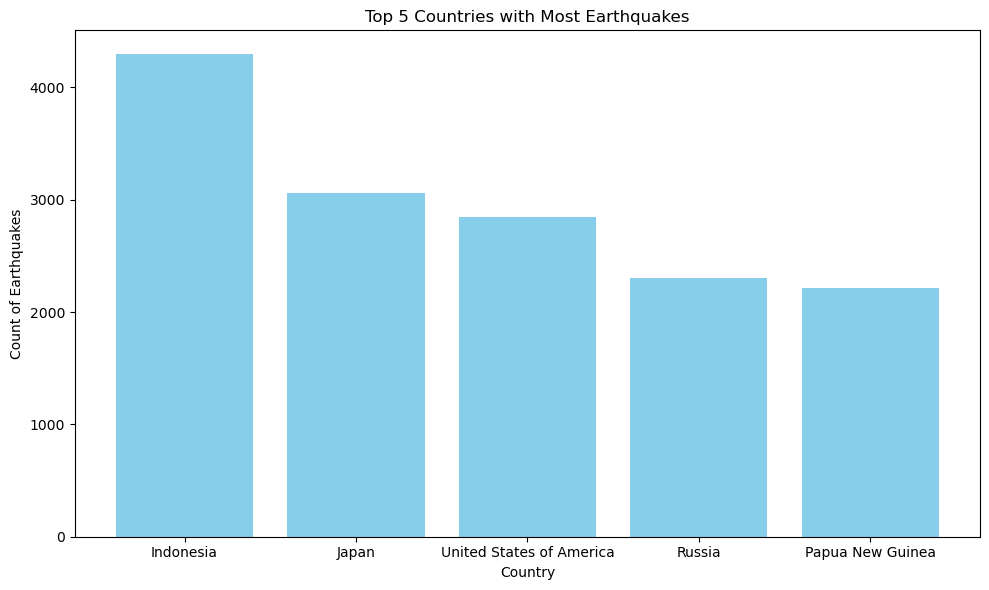

In [4]:
print(df["countries"].value_counts())
country_counts = df['countries'].value_counts()

# Convert the Series into a DataFrame
country_counts_df = country_counts.reset_index()
# Rename the columns to "Country" and "Count"
country_counts_df.columns = ['Country', 'Count']
# Display the resulting DataFrame
print(country_counts_df.head())

print("-------------")
# Count NaN, None, and empty string values in the 'countries' column
na_or_empty = df['countries'].isna() | (df['countries'] == '') | (df['countries'].isnull())
# Print the total count of NaN, None, and empty string values
print("Total NaN, None, or empty string values in 'countries':", na_or_empty.sum())

# Plotting the number of earthquakes by country
# Selecting the top 5 countries with the most earthquakes
top_5_countries = country_counts_df.head(5)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(top_5_countries['Country'], top_5_countries['Count'], color='skyblue')
plt.xlabel('Country')
plt.ylabel('Count of Earthquakes')
plt.title('Top 5 Countries with Most Earthquakes')
plt.tight_layout()  # Adjust layout to not cut off labels
plt.show()

Okhotsk           3401
North America     3266
Sunda             3090
Pacific           2985
Eurasia           2737
South America     2269
Australia         1989
New Hebrides      1424
Philippine Sea    1399
Kermadec          1291
Antarctica        1190
Tonga             1104
South Bismarck    1077
Africa             658
Sandwich           590
Caribbean          589
Nazca              550
Okinawa            538
Birds Head         519
Banda Sea          511
North Bismarck     507
Burma              444
Altiplano          432
Mariana            407
India              386
Timor              363
Molucca Sea        362
Somalia            351
Amur               318
Aegean Sea         302
Woodlark           291
North Andes        256
Niuafo'ou          234
Panama             217
Maoke              207
Juan de Fuca       197
Anatolia           181
Cocos              131
Yangtze            127
Solomon Sea        114
Arabia             105
Scotia              78
Rivera              76
Conway Reef

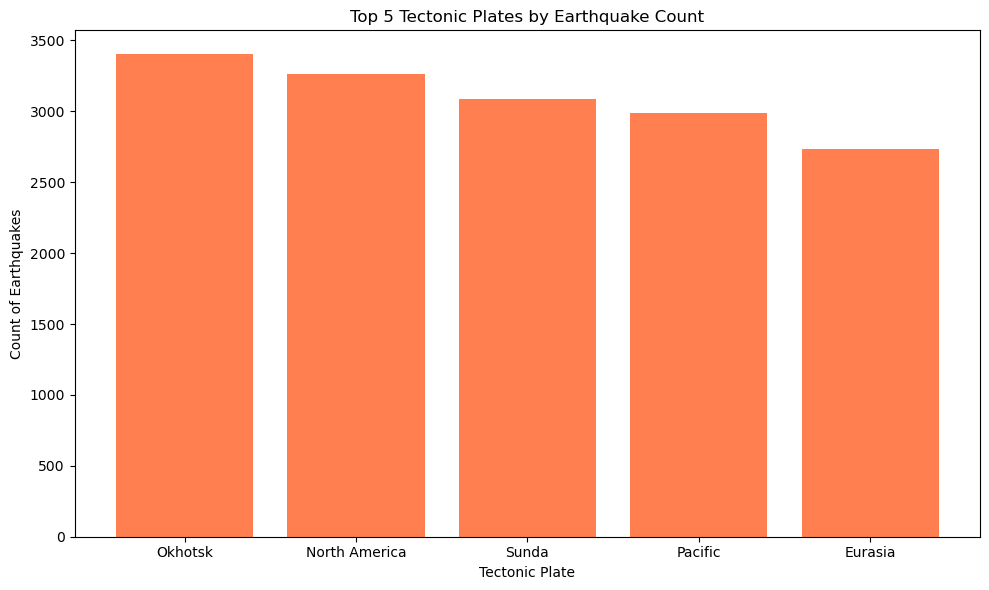

In [5]:
print(df["PlateName"].value_counts())
print(df["PlateName"].value_counts().mean())

# Getting the value counts for "PlateName"
plate_counts = df["PlateName"].value_counts()

# Convert the Series into a DataFrame
plate_counts_df = plate_counts.reset_index()
# Rename the columns to "Plate" and "Count"
plate_counts_df.columns = ['Plate', 'Count']

# Selecting the top 5 plates with the most earthquakes
top_5_plates = plate_counts_df.head(5)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(top_5_plates['Plate'], top_5_plates['Count'], color='coral')
plt.xlabel('Tectonic Plate')
plt.ylabel('Count of Earthquakes')
plt.title('Top 5 Tectonic Plates by Earthquake Count')
plt.tight_layout()  # Adjust layout to not cut off labels
plt.show()


C:\Users\Harrys\AppData\Local\Temp\ipykernel_19156\1955243067.py:14: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


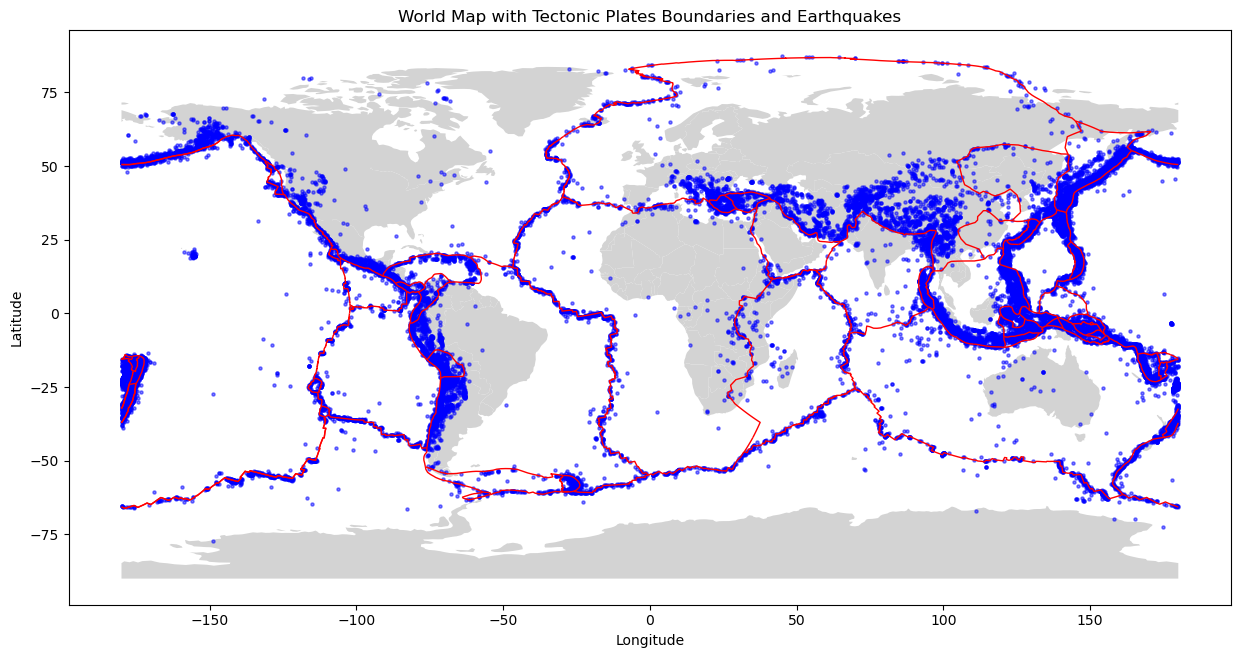

In [7]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the tectonic plates boundaries GeoJSON
gdf_plates_boundaries = gpd.read_file('C:/Users/Harrys/Desktop/Thesis/plates mapping/PB2002_boundaries.json')

# Read earthquakes data 
df_earthquakes = df[(df['latitude'] != -999) & (df['longitude'] != -999)].copy()

# Convert the filtered earthquake DataFrame to a GeoDataFrame
gdf_earthquakes = gpd.GeoDataFrame(df_earthquakes, geometry=gpd.points_from_xy(df_earthquakes.longitude, df_earthquakes.latitude), crs="EPSG:4326")

# Load a simple world map as the base
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Start plotting
fig, ax = plt.subplots(figsize=(15, 10))

# Plot the world map
world.plot(ax=ax, color='lightgrey')

# Plot the tectonic plates boundaries
gdf_plates_boundaries.plot(ax=ax, color='red', linewidth=1)

# Plot the earthquakes, excluding those with placeholder coordinates
gdf_earthquakes.plot(ax=ax, color='blue', markersize=5, alpha=0.5)

# Set the title and axes labels
ax.set_title('World Map with Tectonic Plates Boundaries and Earthquakes')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.savefig("World Map - Earthquakes.pdf")
plt.show()


## Adding features

In [8]:
## Adding time features
df['time'] = pd.to_datetime(df['time'])

# Check the result
print(f"head of columns time: {df['time'].head()}")

# Extract time-based features
df['year'] = df['time'].dt.year
df['month'] = df['time'].dt.month
df['day'] = df['time'].dt.day
df['hour'] = df['time'].dt.hour
df['day_of_week'] = df['time'].dt.dayofweek

# cyclical encoding for cyclical features like hour and day_of_week
df['day_of_week_sin'] = np.sin(df['day_of_week'] * (2 * np.pi / 7))
df['day_of_week_cos'] = np.cos(df['day_of_week'] * (2 * np.pi / 7))
df['month_sin'] = np.sin((df['month'] - 1) * (2 * np.pi / 12))  # -1 to adjust month index from 1-12 to 0-11
df['month_cos'] = np.cos((df['month'] - 1) * (2 * np.pi / 12))

df.drop(columns=["hour"])

#removing the year 2024 because it is unbalanced to include it
df = df[df['year'] != 2024.0]
 
print(f" df head : {df.head()}")
print("#################")
print(f"df columns: {df.columns}")

head of columns time: 0   2024-01-31
1   2024-01-29
2   2024-01-28
3   2024-01-27
4   2024-01-25
Name: time, dtype: datetime64[ns]
 df head :          time  latitude  longitude   depth  mag       countries  PlateName  \
37 2023-12-30   -2.9934   139.3720  33.000  6.3       Indonesia      Maoke   
38 2023-12-30   -3.2050   139.2890  10.000  6.5       Indonesia      Maoke   
39 2023-12-30    2.4949    92.9942  19.000  5.7       Indonesia      India   
40 2023-12-30  -49.2906  -116.2051  10.000  5.9           Chile    Pacific   
41 2023-12-29   -7.1134    67.9800   9.929  5.7  United Kingdom  Australia   

    year  month  day  hour  day_of_week  day_of_week_sin  day_of_week_cos  \
37  2023     12   30     0            5        -0.974928        -0.222521   
38  2023     12   30     0            5        -0.974928        -0.222521   
39  2023     12   30     0            5        -0.974928        -0.222521   
40  2023     12   30     0            5        -0.974928        -0.222521   
41  

Adding features

In [9]:
## Adding features

# Sort the DataFrame by the 'time' column in ascending order
df = df.sort_values(by='time', ascending=True)

# 'country_event_id' column is added to count events per country from oldest to newest
df['country_event_id'] = df.groupby('countries').cumcount() + 1

# Calculate the mean magnitude up to the current point in time for each country
df['mean mag'] = df.groupby('countries')['mag'].expanding().mean().reset_index(level=0, drop=True)

# Calculate the Magnitude Difference compared to the previous event within the same country
df['prev_mag'] = df.groupby('countries')['mag'].shift(1)
df['Magnitude Difference'] = df['mag'] - df['prev_mag']
# Handle NaN values that result from the shift operation for the first occurrence in each group
df['Magnitude Difference'] = df['Magnitude Difference'].fillna(0)

# Directly count earthquakes from oldest to newest for 'number of earthquakes' without reversing the DataFrame
df['number of earthquakes'] = df.groupby('countries').cumcount() + 1

# Drop the intermediate 'prev_mag' and 'country_event_id' columns as they are no longer needed
df.drop(['prev_mag', 'country_event_id'], axis=1, inplace=True)

# Display the DataFrame with the new columns
print(df[['countries', 'mean mag', 'number of earthquakes', 'Magnitude Difference']])
df.to_csv("check the features mean mag and # of quakes.csv")
print(f"df columns: {df.columns}")

                      countries  mean mag  number of earthquakes  \
37577  United States of America  7.860000                      1   
37576  United States of America  7.130000                      2   
37575  United States of America  7.086667                      3   
37574  United States of America  7.090000                      4   
37573  United States of America  7.072000                      5   
...                         ...       ...                    ...   
41               United Kingdom  5.860092                   1304   
40                        Chile  5.947672                   1761   
39                    Indonesia  5.924442                   4289   
38                    Indonesia  5.924576                   4290   
37                    Indonesia  5.924663                   4291   

       Magnitude Difference  
37577                  0.00  
37576                 -1.46  
37575                  0.60  
37574                  0.10  
37573                 -0.10  
...

transforming integers to floats

In [10]:
## Transforming integers to floats

# List of columns to convert from int64 to float64
int_columns = df.select_dtypes(include=['int64']).columns

# Convert each column in the list to float64
df[int_columns] = df[int_columns].astype('float64')

# Check the data types to confirm the conversion
print(df.dtypes)

time                     datetime64[ns]
latitude                        float64
longitude                       float64
depth                           float64
mag                             float64
countries                        object
PlateName                        object
year                            float64
month                           float64
day                             float64
hour                            float64
day_of_week                     float64
day_of_week_sin                 float64
day_of_week_cos                 float64
month_sin                       float64
month_cos                       float64
mean mag                        float64
Magnitude Difference            float64
number of earthquakes           float64
dtype: object


## Earthquakes per year and outliers

In [11]:
# Group by 'year' and count the occurrences
yearly_count = df.groupby('year').size().reset_index(name='count')
print(yearly_count)

# Calculate the mean and standard deviation of the yearly earthquake counts
mean_earthquakes = yearly_count['count'].mean()
std_earthquakes = yearly_count['count'].std()

# Define a threshold for what we consider an outlier
threshold = std_earthquakes

# Find years where the earthquake count is significantly lower than the mean minus the threshold
potential_outlier_years = yearly_count[yearly_count['count'] < mean_earthquakes - threshold]

print("Potential outlier years based on a low number of earthquakes:")
print(potential_outlier_years['year'])

       year  count
0    1900.0      1
1    1901.0      3
2    1902.0      2
3    1903.0      5
4    1904.0      9
..      ...    ...
119  2019.0    443
120  2020.0    405
121  2021.0    561
122  2022.0    446
123  2023.0    523

[124 rows x 2 columns]
Potential outlier years based on a low number of earthquakes:
0     1900.0
1     1901.0
2     1902.0
3     1903.0
4     1904.0
5     1905.0
6     1906.0
7     1907.0
8     1908.0
9     1909.0
10    1910.0
11    1911.0
12    1912.0
13    1913.0
14    1914.0
15    1915.0
16    1916.0
17    1917.0
18    1918.0
19    1919.0
20    1920.0
21    1921.0
22    1922.0
23    1923.0
24    1924.0
44    1944.0
45    1945.0
47    1947.0
Name: year, dtype: float64


       year  count
0    1900.0      1
1    1901.0      3
2    1902.0      2
3    1903.0      5
4    1904.0      9
5    1905.0     58
6    1906.0     85
7    1907.0     66
8    1908.0     28
9    1909.0     49
10   1910.0     55
11   1911.0     38
12   1912.0     40
13   1913.0     81
14   1914.0     61
15   1915.0     77
16   1916.0     71
17   1917.0    126
18   1918.0    124
19   1919.0    101
20   1920.0     93
21   1921.0     77
22   1922.0     95
23   1923.0    119
24   1924.0    120
25   1925.0    145
26   1926.0    247
27   1927.0    267
28   1928.0    260
29   1929.0    272
30   1930.0    224
31   1931.0    261
32   1932.0    184
33   1933.0    233
34   1934.0    227
35   1935.0    217
36   1936.0    225
37   1937.0    201
38   1938.0    274
39   1939.0    198
40   1940.0    191
41   1941.0    170
42   1942.0    147
43   1943.0    150
44   1944.0    116
45   1945.0    114
46   1946.0    136
47   1947.0    129
48   1948.0    156
49   1949.0    130
50   1950.0    214
51   1951.0 

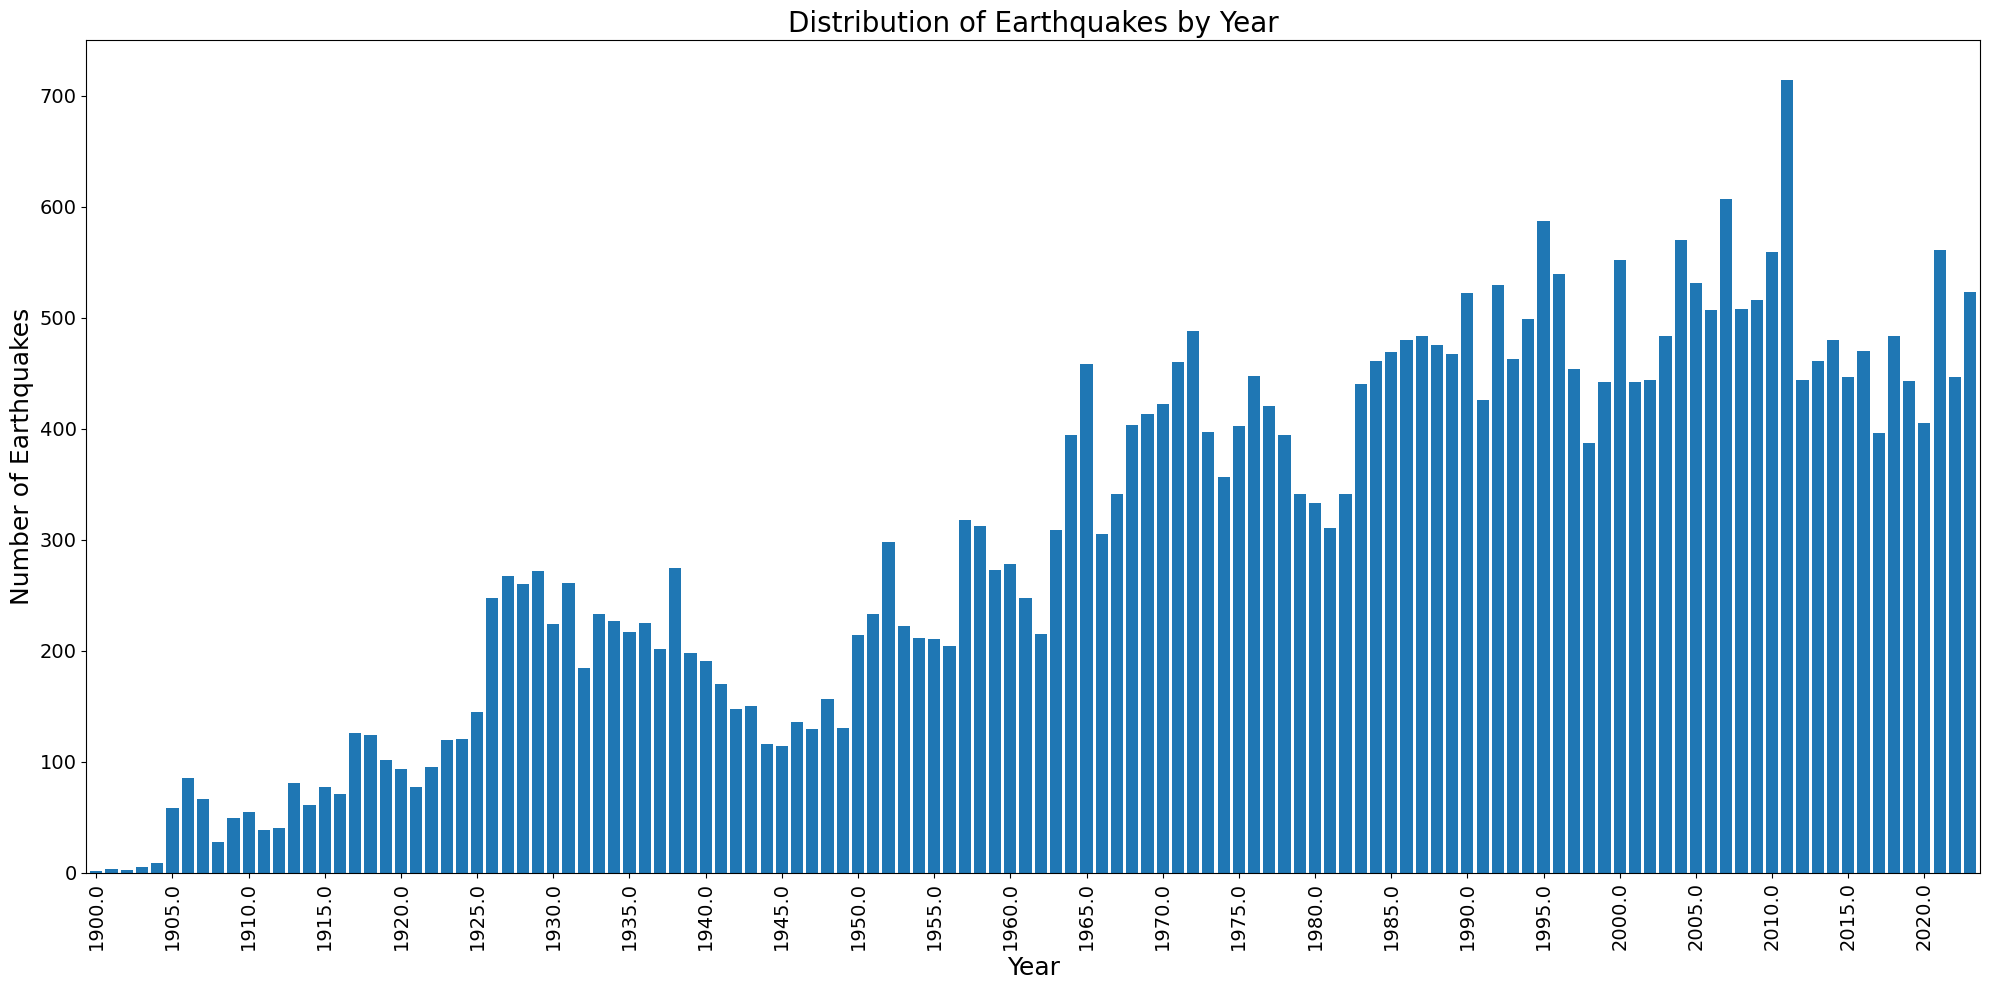

In [111]:
import matplotlib.pyplot as plt
import pandas as pd
# Group by 'year' and count the occurrences
yearly_count = df.groupby('year').size().reset_index(name='count')
print(yearly_count)

# Create the plot
plt.figure(figsize=(20, 10))  # Increase figure size
yearly_count.set_index('year')['count'].plot(kind='bar', width=0.8)
plt.title('Distribution of Earthquakes by Year', fontsize=20)  # Increase font size for title
plt.xlabel('Year', fontsize=18)  # Increase font size for x-axis label
plt.ylabel('Number of Earthquakes', fontsize=18)  # Increase font size for y-axis label

# Adjust tick spacing and font size
tick_spacing = 5
plt.xticks(rotation=90, fontsize=14)  # Rotate x-axis labels and increase font size
plt.yticks(fontsize=14)  # Increase font size for y-axis ticks
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(tick_spacing))

plt.tight_layout()
plt.savefig("Earthquakes per Year.pdf")
plt.show()

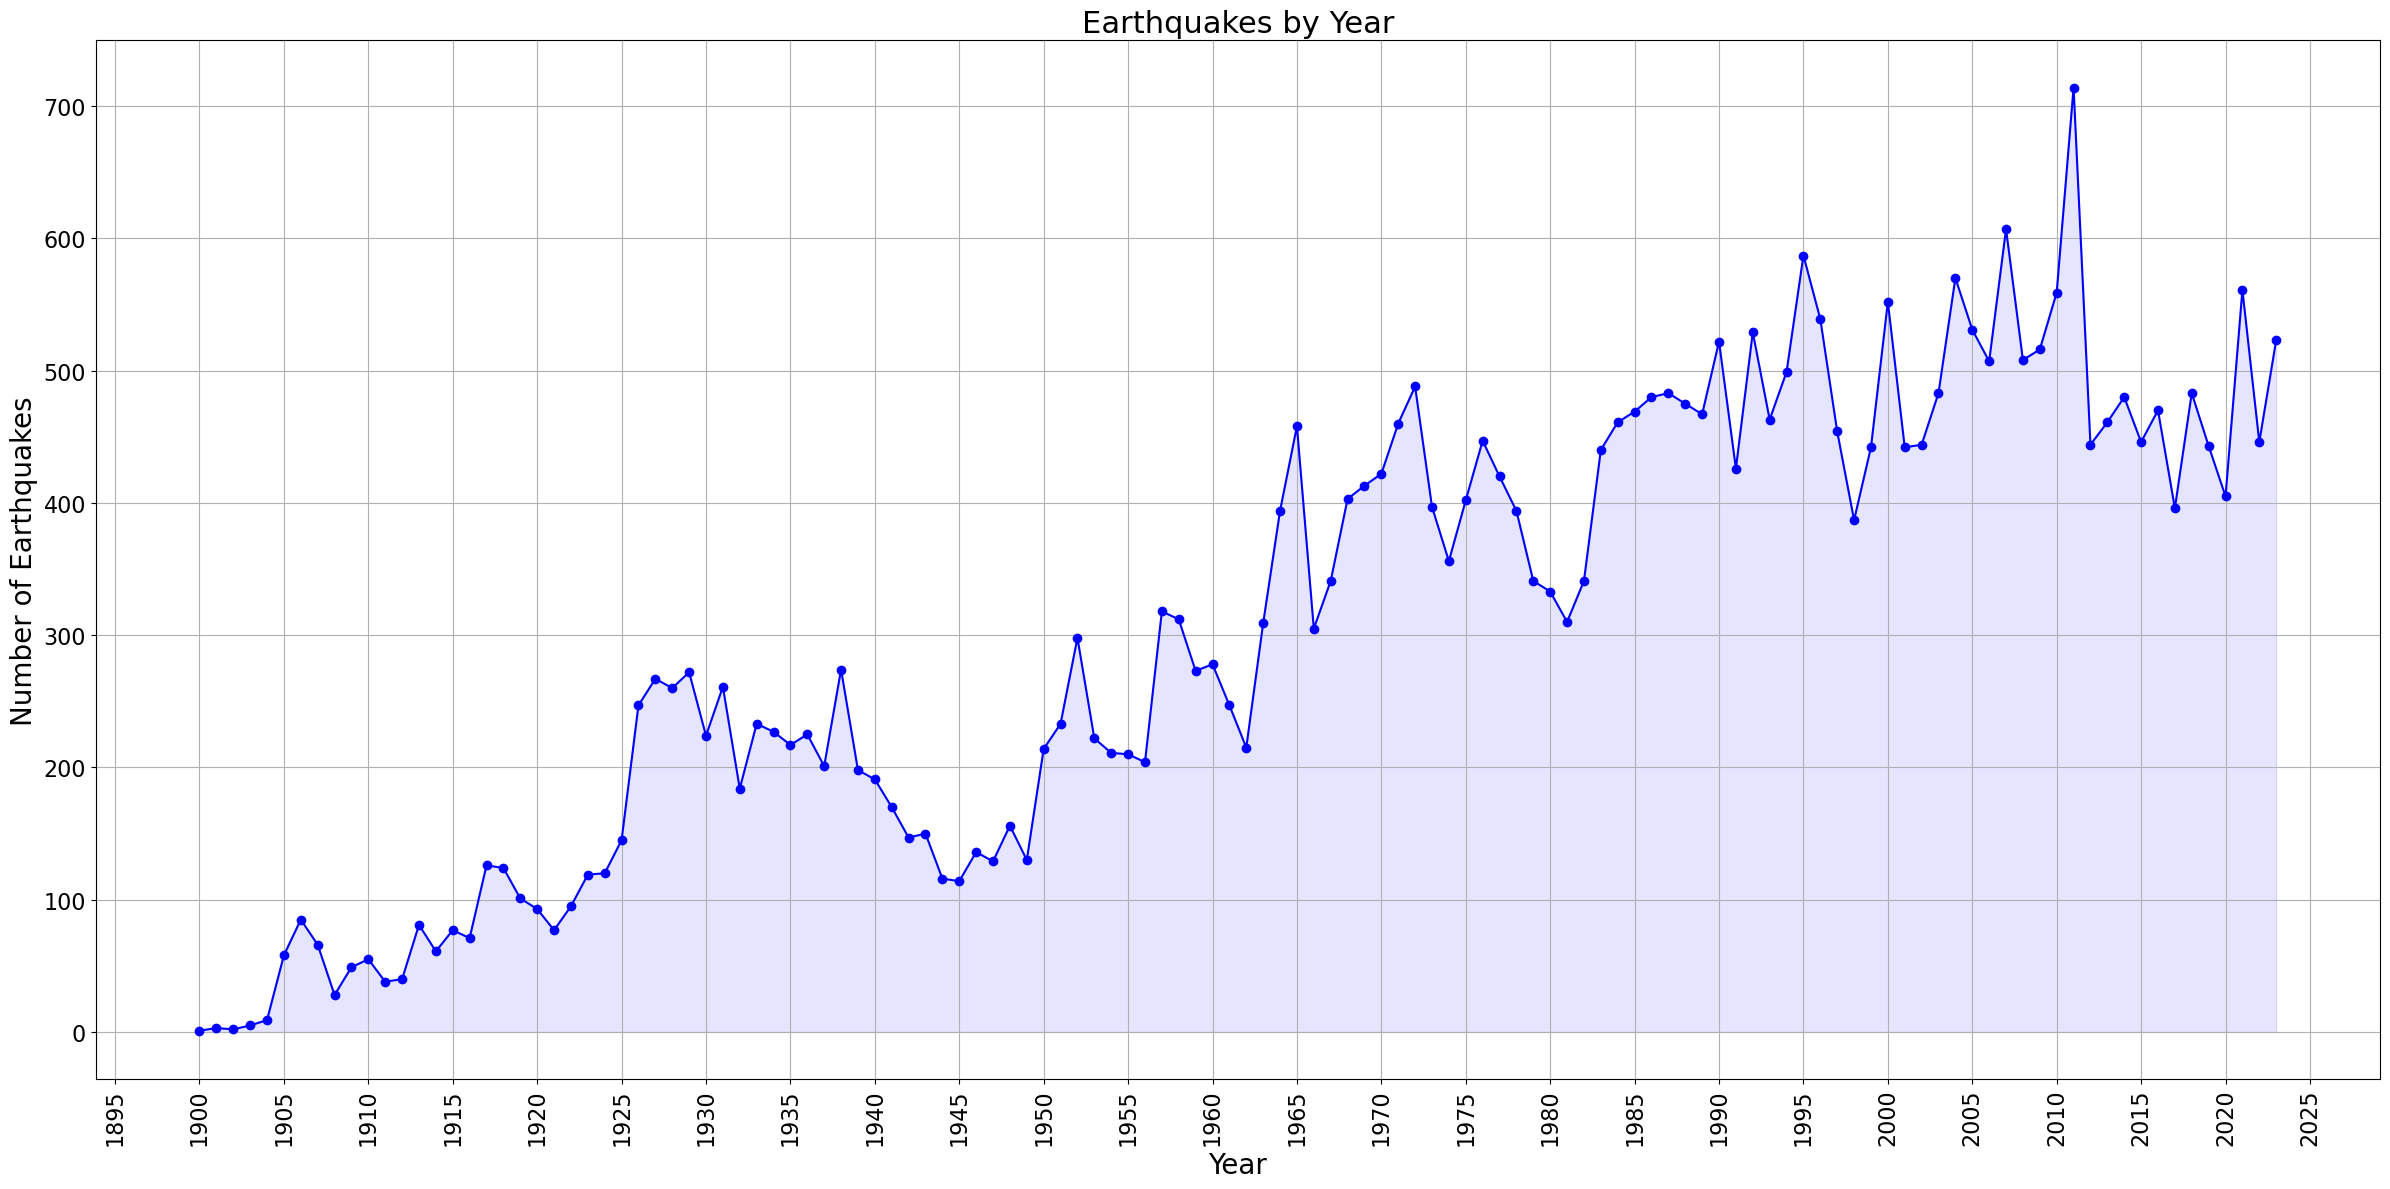

In [15]:
# Create the line plot
plt.figure(figsize=(24, 12))  # Increase figure size to give more space
plt.plot(yearly_count['year'], yearly_count['count'], marker='o', linestyle='-', color='b')
plt.fill_between(yearly_count['year'], yearly_count['count'], color='blue', alpha=0.1)

plt.title('Earthquakes by Year', fontsize=22)  # Increase font size for title
plt.xlabel('Year', fontsize=20)  # Increase font size for x-axis label
plt.ylabel('Number of Earthquakes', fontsize=20)  # Increase font size for y-axis label

# Adjust tick spacing and font size
plt.xticks(rotation=90, fontsize=16)  # Rotate x-axis labels and increase font size
plt.yticks(fontsize=16)  # Increase font size for y-axis ticks
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(tick_spacing))

plt.grid(True)
plt.tight_layout()
plt.savefig("Earthquakes_per_Year_Line.pdf", format='pdf')
plt.show()


In [113]:
# In 1961 The World Wide Standardized Seismographic Network (WWSSN) is started.
# With that information and from the above data we will only include the years from 1962 and above

# Filter the DataFrame to keep only rows where 'year' is 1962 or later
df = df[df['year'] >= 1962]

In [114]:
duplicates = df.duplicated(keep=False)

# Count the number of duplicates
num_duplicates = duplicates.sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


In [115]:
# keep='first' marks all duplicates as True except for the first occurrence.
duplicates = df.duplicated(keep='first')

# To see the duplicate rows\
duplicate_rows = df[duplicates]

print("Duplicate Rows (except first occurrence):")
print(duplicate_rows)

Duplicate Rows (except first occurrence):
Empty DataFrame
Columns: [time, latitude, longitude, depth, mag, countries, PlateName, year, month, day, hour, day_of_week, day_of_week_sin, day_of_week_cos, month_sin, month_cos, mean mag, Magnitude Difference, number of earthquakes]
Index: []


## updating the features to start counting from 1962

In [116]:
# Reset the index
df.reset_index(drop=True, inplace=True)

# Recalculate the features for the filtered data
df['country_event_id'] = df.groupby('countries').cumcount() + 1
df['mean mag'] = df.groupby('countries')['mag'].expanding().mean().reset_index(level=0, drop=True)
df['prev_mag'] = df.groupby('countries')['mag'].shift(1)
df['Magnitude Difference'] = df['mag'] - df['prev_mag']
df['Magnitude Difference'] = df['Magnitude Difference'].fillna(0)
df['number of earthquakes'] = df.groupby('countries').cumcount() + 1

# Drop the 'prev_mag' column
df.drop(['prev_mag', 'country_event_id'], axis=1, inplace=True)

# Now DataFrame starts calculating features from 1962 onwards
df.to_csv("updated_features_post_1962.csv")
print(f"Updated df columns: {df.columns}")

# removing duplicated that were created
# keep='first' marks all duplicates as True except for the first occurrence.
duplicates = df.duplicated(keep='first')

# To see if there are duplicate rows, we filter the df
duplicate_rows = df[duplicates]

print("Duplicate Rows (except first occurrence):")
print(duplicate_rows)

Updated df columns: Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'countries',
       'PlateName', 'year', 'month', 'day', 'hour', 'day_of_week',
       'day_of_week_sin', 'day_of_week_cos', 'month_sin', 'month_cos',
       'mean mag', 'Magnitude Difference', 'number of earthquakes'],
      dtype='object')
Duplicate Rows (except first occurrence):
Empty DataFrame
Columns: [time, latitude, longitude, depth, mag, countries, PlateName, year, month, day, hour, day_of_week, day_of_week_sin, day_of_week_cos, month_sin, month_cos, mean mag, Magnitude Difference, number of earthquakes]
Index: []


## create target variable

target variable is the feature "counter" which is a counter for each country and specifies the days until the next earthquake 

In [117]:
# Create a copy of the relevant columns to calculate the counter without losing the original order
df_countries = df[['time', 'countries', 'mag', 'depth', 'hour', 'latitude', 'longitude']].copy()

# Sort by countries and time to prepare for the 'counter' calculation
df_countries.sort_values(['countries', 'time', 'mag', 'depth', 'hour', 'latitude', 'longitude'], inplace=True)

# Calculate the days until the next earthquake within each country
# shift(): for each row, the 'next_earthquake' column will hold the date of the next earthquake event in that country.
df_countries['next_earthquake'] = df_countries.groupby('countries')['time'].shift(-1)
df_countries['counter'] = (pd.to_datetime(df_countries['next_earthquake']) - df_countries['time']).dt.days

# Merge the 'counter' column back into the original dataframe using 'time' and 'countries' as keys
df = df.merge(df_countries[['time', 'countries', 'counter', 'mag', 'depth', 'hour', 'latitude', 'longitude']], on=['time', 'countries', 'mag', 'depth', 'hour', 'latitude', 'longitude'], how='left')

df['time'] = df['time'].dt.tz_localize(None)
# Remove microseconds by flooring to the nearest second
df['time'] = df['time'].dt.floor('S')

print(f"df columns: {df.columns}")
df.to_csv("check_of_the_counter_feature.csv")

# Removing duplicate rows, keeping the first occurrence of each duplicate
df = df.drop_duplicates(keep='first')
train_df = df

df columns: Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'countries',
       'PlateName', 'year', 'month', 'day', 'hour', 'day_of_week',
       'day_of_week_sin', 'day_of_week_cos', 'month_sin', 'month_cos',
       'mean mag', 'Magnitude Difference', 'number of earthquakes', 'counter'],
      dtype='object')


## missing values

In [118]:
# Check the number of missing values in each column of the train df
missing_values_train = train_df.isnull().sum()
# Print the number of missing values for each column
print(f" number of missing values for each column: {missing_values_train}")

# Calculate the total number of missing values in the train df
total_missing_values_train = train_df.isnull().sum().sum()
# Print the total number of missing values in the train df
print(f"Total missing values in train_df_encoded: {total_missing_values_train}")

 number of missing values for each column: time                       0
latitude                   0
longitude                  0
depth                      1
mag                        0
countries                  0
PlateName                  0
year                       0
month                      0
day                        0
hour                       0
day_of_week                0
day_of_week_sin            0
day_of_week_cos            0
month_sin                  0
month_cos                  0
mean mag                   0
Magnitude Difference       0
number of earthquakes      0
counter                  136
dtype: int64
Total missing values in train_df_encoded: 137


In [119]:
# marks all duplicates as True except for the first occurrence.
duplicates = df.duplicated(keep='first')

# To see the duplicate rows
duplicate_rows = df[duplicates]

print("Duplicate Rows (except first occurrence):")
print(duplicate_rows)

Duplicate Rows (except first occurrence):
Empty DataFrame
Columns: [time, latitude, longitude, depth, mag, countries, PlateName, year, month, day, hour, day_of_week, day_of_week_sin, day_of_week_cos, month_sin, month_cos, mean mag, Magnitude Difference, number of earthquakes, counter]
Index: []


## deleting countries that are outliers. Specifically the countries that have very few earthquakes

In [120]:
unique_countres = train_df["countries"].nunique()
print(f"number of unique countries: {unique_countres}")
print(train_df["number of earthquakes"].describe())

number of unique countries: 136
count    28063.000000
mean       705.997114
std        722.924361
min          1.000000
25%        154.000000
50%        496.000000
75%       1007.000000
max       3610.000000
Name: number of earthquakes, dtype: float64


In [121]:
# Count earthquakes for each country
earthquake_counts = train_df['countries'].value_counts()
print(f"number of earthquakes in each country: {earthquake_counts}")
# Determine percentile as the outlier threshold
threshold = earthquake_counts.quantile(0.5) # determining outliers by the median

# Filter for countries below the threshold
outlier_countries = earthquake_counts[earthquake_counts <= threshold]
print(f"size of outliers: {outlier_countries.size}")
# Print the outlier countries and their earthquake counts
print("Outlier Countries with Low Earthquake Counts:")
for country, count in outlier_countries.iteritems():
    print(f"{country}: {count}")


# Get the list of outlier countries
outlier_countries_list = outlier_countries.index.tolist()
#deleting outlier countries
train_df = train_df[~train_df["countries"].isin(outlier_countries_list)]

number of earthquakes in each country: Indonesia                           3610
Japan                               2040
United States of America            1930
Papua New Guinea                    1822
Russia                              1541
Chile                               1453
New Zealand                         1262
Tonga                               1138
Vanuatu                             1123
United Kingdom                      1083
Fiji                                1057
Philippines                         1030
Solomon Islands                      895
France                               721
Antarctica                           671
Mexico                               581
Peru                                 481
China                                401
Samoa                                300
Argentina                            280
Australia                            279
India                                276
Taiwan                               252
Ecuador           

C:\Users\Harrys\AppData\Local\Temp\ipykernel_828\1174252201.py:12: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for country, count in outlier_countries.iteritems():


In [122]:
# Count unique countries in the 'countries' column
unique_countres = train_df["countries"].nunique()
print(f"number of unique countries: {unique_countres}")

number of unique countries: 66


## outliers of countries that have rarely earthquakes

In [123]:
# Calculate the overall IQR for 'counter'
overall_Q1 = train_df['counter'].quantile(0.25)
overall_Q3 = train_df['counter'].quantile(0.75)
overall_IQR = overall_Q3 - overall_Q1

# Define the outlier cutoffs for the overall data
overall_lower_bound = overall_Q1 - 3 * overall_IQR
overall_upper_bound = overall_Q3 + 3 * overall_IQR

# Calculate the median 'counter' for each country
median_counters = train_df.groupby('countries')['counter'].median()

# Determine which countries have a median 'counter' that is an outlier
outlier_countries = median_counters[(median_counters < overall_lower_bound) | (median_counters > overall_upper_bound)]

pd.set_option('display.max_rows', None) 
print("Countries considered as outliers based on their median 'counter':")
print(outlier_countries)
print(f"number of countries considered outliers: {outlier_countries.size}")


Countries considered as outliers based on their median 'counter':
countries
Algeria                             748.0
Antigua and Barbuda                 870.0
Barbados                            487.5
Bolivia                             213.0
Costa Rica                          152.0
Democratic Republic of the Congo    623.0
Denmark                             230.0
Dominican Republic                  391.0
East Timor                          756.0
El Salvador                         133.0
Federated States of Micronesia      166.0
Honduras                            475.0
Iceland                             448.0
Kyrgyzstan                          318.0
Maldives                            545.0
Mauritius                           229.0
Mongolia                            297.0
Romania                             670.5
South Africa                        140.0
Tajikistan                          423.0
United Republic of Tanzania         665.0
Venezuela                           393.0


In [124]:
# 'outlier_countries' is a Series with country names as the index and median 'counter' as the values
# Get the list of outlier country names
outlier_country_names = outlier_countries.index.tolist()

# Filter out the outliers
train_df = train_df[~train_df['countries'].isin(outlier_country_names)]

# Inspect the unique values in the "countries" column
remaining_countries = train_df['countries'].unique()

nu_countries = len(remaining_countries)
print(f"Number of unique countries: {nu_countries} and \nRemaining countries in the DataFrame: {remaining_countries}")

Number of unique countries: 43 and 
Remaining countries in the DataFrame: ['United States of America' 'Japan' 'France' 'Samoa' 'Greece' 'Tonga'
 'New Zealand' 'Indonesia' 'United Kingdom' 'Papua New Guinea' 'Chile'
 'Colombia' 'India' 'Myanmar' 'Solomon Islands' 'Philippines' 'Panama'
 'Brazil' 'Vanuatu' 'China' 'Iran' 'Peru' 'Russia' 'Mexico' 'Fiji'
 'Portugal' 'Canada' 'Antarctica' 'Afghanistan' 'Australia' 'Italy'
 'Pakistan' 'Argentina' 'Taiwan' 'Ecuador' 'Turkey' 'Nicaragua' 'Norway'
 'Guatemala' 'Nepal' 'Ethiopia' 'Kiribati' 'Trinidad and Tobago']


Checking the missing data in the data

In [125]:
# Check the number of missing values in each column of the train df
missing_values_train = train_df.isnull().sum()
# Print the number of missing values for each column
print(missing_values_train)

time                      0
latitude                  0
longitude                 0
depth                     1
mag                       0
countries                 0
PlateName                 0
year                      0
month                     0
day                       0
hour                      0
day_of_week               0
day_of_week_sin           0
day_of_week_cos           0
month_sin                 0
month_cos                 0
mean mag                  0
Magnitude Difference      0
number of earthquakes     0
counter                  43
dtype: int64


In [126]:
#The following is to assure that the countries that have NaN in "counter" are not countries with very small number of earthquakes.

# Filter the DataFrame to include only rows where 'counter' is missing
missing_counter_df = train_df[train_df['counter'].isnull()]

# Group by 'countries' and get the first occurrence to see the 'number of earthquakes' for those entries
missing_counter_countries = missing_counter_df.groupby('countries')['number of earthquakes'].first()

# Print the result
print(missing_counter_countries)

countries
Afghanistan                  178
Antarctica                   671
Argentina                    280
Australia                    279
Brazil                       238
Canada                       113
Chile                       1453
China                        401
Colombia                     180
Ecuador                      244
Ethiopia                      19
Fiji                        1057
France                       721
Greece                       193
Guatemala                    146
India                        276
Indonesia                   3609
Iran                         229
Italy                         54
Japan                       2040
Kiribati                      13
Mexico                       581
Myanmar                      112
Nepal                         27
New Zealand                 1262
Nicaragua                    125
Norway                       153
Pakistan                      99
Panama                       130
Papua New Guinea            1822


Boxplot of the feature "counter" for every country

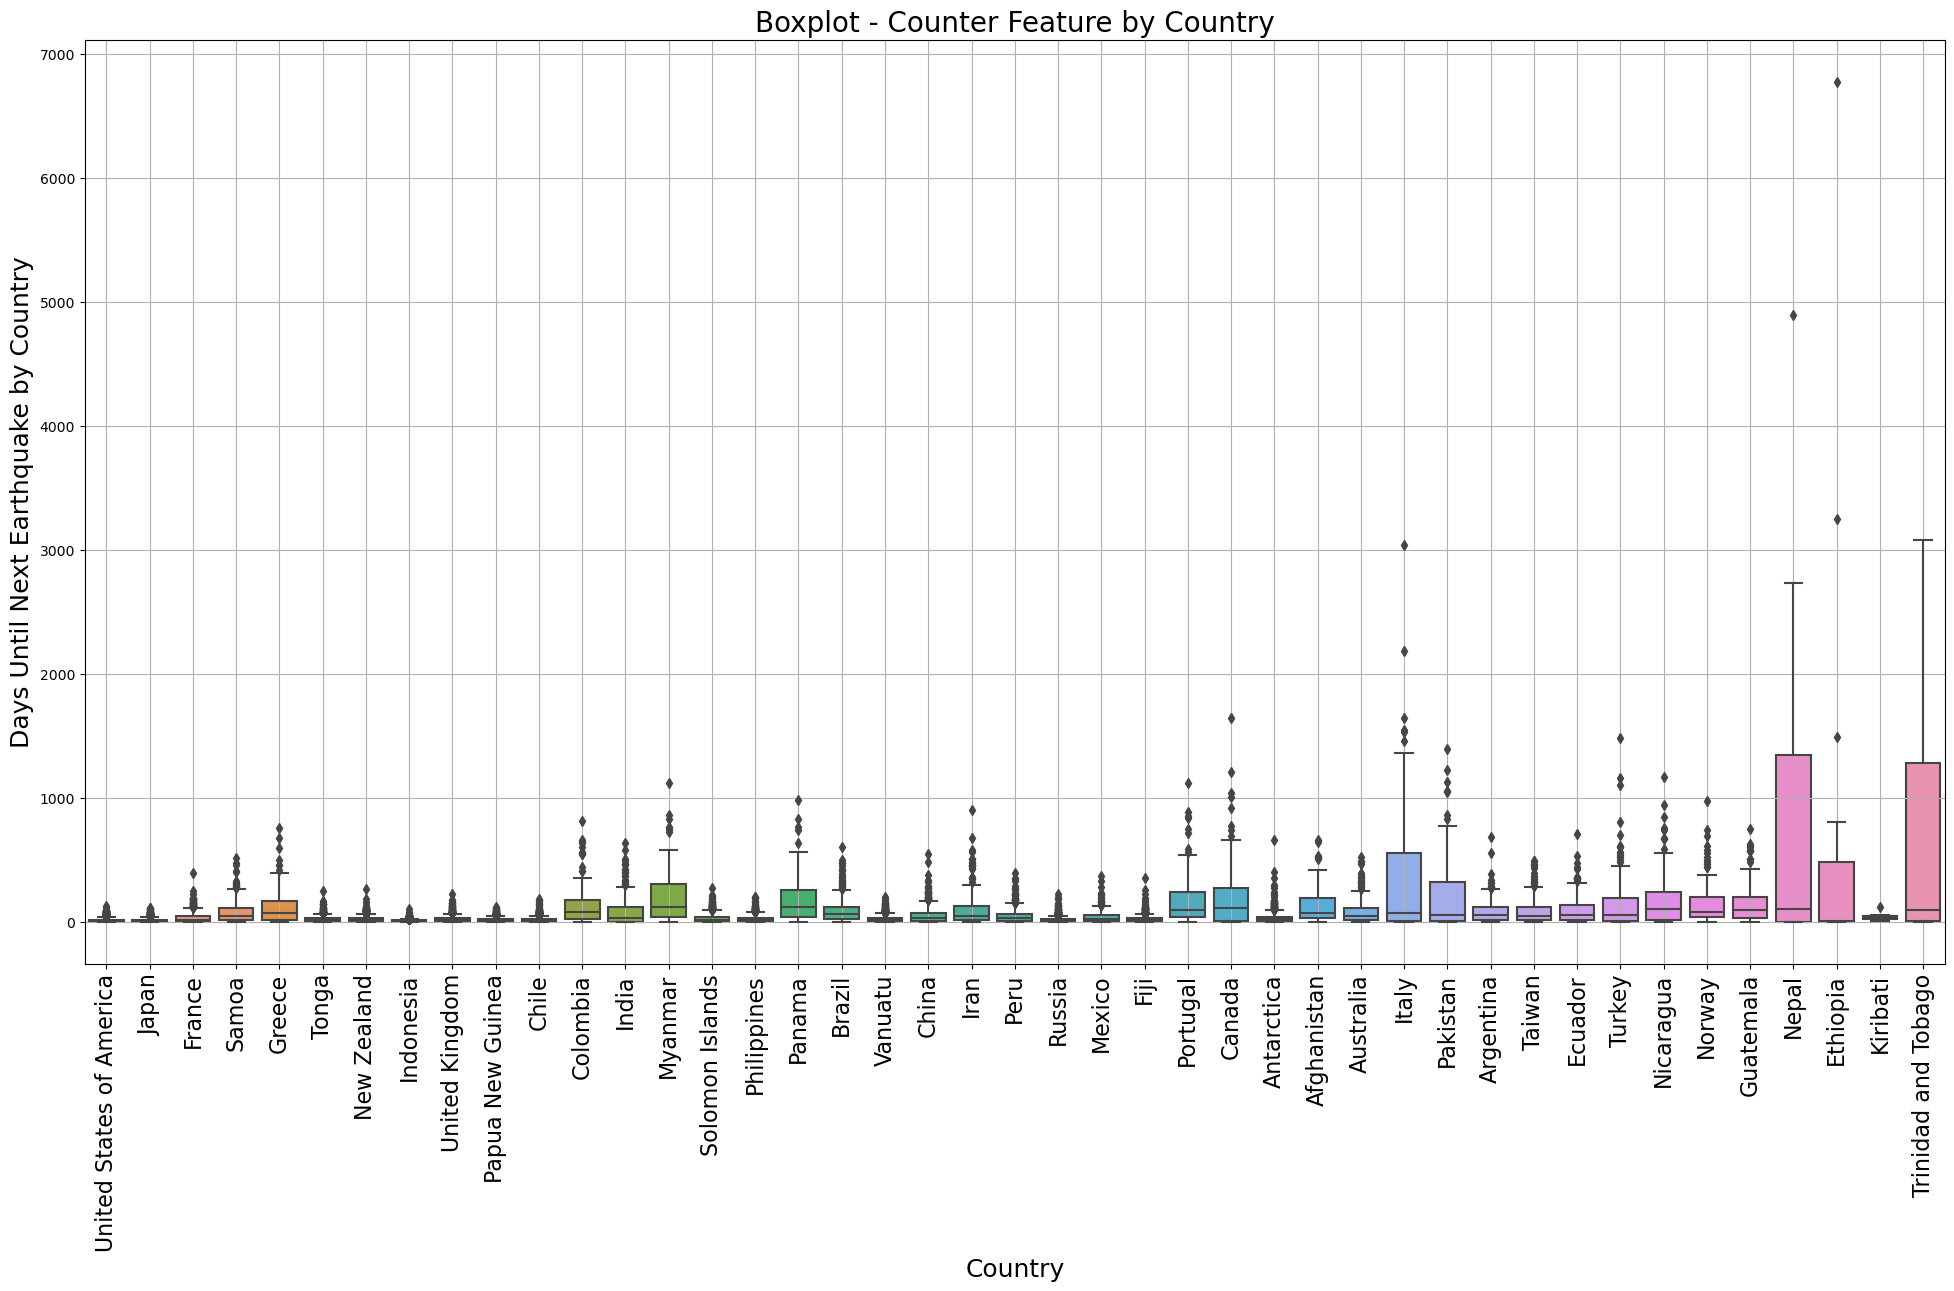

In [127]:
# Create the box plot
plt.figure(figsize=(24, 12))  
sns.boxplot(x='countries', y='counter', data=train_df)

plt.xticks(rotation=90, fontsize=16)  
plt.title('Boxplot - Counter Feature by Country', fontsize=20)  
plt.xlabel('Country', fontsize=18)  
plt.ylabel('Days Until Next Earthquake by Country', fontsize=18)  
plt.grid(True)  
plt.savefig("Boxplot - counter feature by country.pdf", bbox_inches='tight')  
plt.show()

dropping the uneccessary column of "hour"

In [128]:
print(f"train_df shape: {train_df.shape}")

train_df shape: (26763, 20)


In [129]:
train_df = train_df.drop(columns=["hour"])

## number of row and DAY gaps we have in the dataset

In [130]:
train_df['time'] = pd.to_datetime(train_df['time'])

# Calculate the difference in days between consecutive earthquake dates
train_df['date_diff'] = train_df['time'].diff().dt.days

# Find the number of gaps (where the difference in days is greater than 1)
num_gaps = (train_df['date_diff'] > 1).sum()

print(f"Number of gaps in train timeseries: {num_gaps}")
train_df.to_csv("train_df_without_filled_time_gaps.csv")

Number of gaps in train timeseries: 5016


In [131]:
def calculate_total_missing_days(df):
    # Convert the 'time' column to datetime if not already
    df['time'] = pd.to_datetime(df['time'])

    # Calculate the difference in days between consecutive earthquake dates
    df['date_diff'] = df['time'].diff().dt.days

    # Find total missing days by summing the days in gaps greater than 1 day
    total_missing_days = (df['date_diff'] - 1).where(df['date_diff'] > 1).sum()

    return total_missing_days

# Usage
train_total_missing_days = calculate_total_missing_days(train_df)
#test_total_missing_days = calculate_total_missing_days(test_df)

print(f"Total missing days in train timeseries: {train_total_missing_days}")
#print(f"Total missing days in test timeseries: {test_total_missing_days}")

Total missing days in train timeseries: 8199.0


In [132]:
# check that everything is okay
print(f"train shape: {train_df.shape}")
#print(f"test shape: {test_df.shape}")
print("############")

print(train_df.head(10))
print("###########")
#print(test_df.head(10))
print("###########")

print(train_df.dtypes)
#print(test_df.dtypes)

train shape: (26763, 20)
############
         time  latitude  longitude  depth   mag                 countries  \
0  1962-01-01    52.112    177.594   25.0  5.88  United States of America   
1  1962-01-04    33.623    135.317   50.0  6.18                     Japan   
2  1962-01-05   -15.356   -177.611   55.0  6.21                    France   
3  1962-01-05   -15.630   -172.436   25.0  5.88                     Samoa   
6  1962-01-09    42.753    145.152   49.0  6.04                     Japan   
8  1962-01-19    38.503     22.102   25.0  5.63                    Greece   
9  1962-01-26    35.191     22.769   25.0  5.96                    Greece   
10 1962-01-28   -17.104   -171.932   18.1  6.10                     Tonga   
11 1962-02-01   -31.642   -177.151   15.0  5.63               New Zealand   
12 1962-02-03    -1.311    137.474   23.0  6.31                 Indonesia   

        PlateName    year  month   day  day_of_week  day_of_week_sin  \
0   North America  1962.0    1.0   1.0    

## Filling the day gaps in our time series with NaN values and adding features about time

In [133]:
# function for filling the day gaps
def fill_date_gaps_and_add_features(df):
    # Ensure 'time' is in datetime format
    df['time'] = pd.to_datetime(df['time'])

    # Creating a complete date range from the start to the end of the dataset
    date_range = pd.date_range(start=df['time'].min(), end=df['time'].max(), freq='D')

    # Creating a new DataFrame with the complete date range
    df_complete = pd.DataFrame(date_range, columns=['time'])

    # Merging the complete date range DataFrame with the original DataFrame
    # This will introduce NaN values for days where there was no earthquake
    df_merged = df_complete.merge(df, on='time', how='left')

    # Extracting date-related features
    df_merged['year'] = df_merged['time'].dt.year
    df_merged['month'] = df_merged['time'].dt.month
    df_merged['day'] = df_merged['time'].dt.day
    df_merged['day_of_week'] = df_merged['time'].dt.dayofweek
    df_merged['day_of_week_sin'] = np.sin(df_merged['day_of_week'] * (2. * np.pi / 7))
    df_merged['day_of_week_cos'] = np.cos(df_merged['day_of_week'] * (2. * np.pi / 7))
    df_merged['month_sin'] = np.sin((df_merged['month'] - 1) * (2. * np.pi / 12))
    df_merged['month_cos'] = np.cos((df_merged['month'] - 1) * (2. * np.pi / 12))

    return df_merged

# Apply the function to train_df and test_df
train_df = fill_date_gaps_and_add_features(train_df)

In [134]:
print(train_df.head(15))

         time  latitude  longitude  depth   mag                 countries  \
0  1962-01-01    52.112    177.594   25.0  5.88  United States of America   
1  1962-01-02       NaN        NaN    NaN   NaN                       NaN   
2  1962-01-03       NaN        NaN    NaN   NaN                       NaN   
3  1962-01-04    33.623    135.317   50.0  6.18                     Japan   
4  1962-01-05   -15.356   -177.611   55.0  6.21                    France   
5  1962-01-05   -15.630   -172.436   25.0  5.88                     Samoa   
6  1962-01-06       NaN        NaN    NaN   NaN                       NaN   
7  1962-01-07       NaN        NaN    NaN   NaN                       NaN   
8  1962-01-08       NaN        NaN    NaN   NaN                       NaN   
9  1962-01-09    42.753    145.152   49.0  6.04                     Japan   
10 1962-01-10       NaN        NaN    NaN   NaN                       NaN   
11 1962-01-11       NaN        NaN    NaN   NaN                       NaN   

In [135]:
print(train_df.columns)

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'countries',
       'PlateName', 'year', 'month', 'day', 'day_of_week', 'day_of_week_sin',
       'day_of_week_cos', 'month_sin', 'month_cos', 'mean mag',
       'Magnitude Difference', 'number of earthquakes', 'counter',
       'date_diff'],
      dtype='object')


## Time shifting for multiple earthuqakes in one day

Because in some days we had multiple earthquakes across the world (or across a country) we also have some rows with the same date of earthquake occurence.

Because we have to maintain continuity and because we can't afford to lose so many earthquakes from our dataset, we will not delete those rows. On the contrary we will perform a time shift for them with a small time window, so we do not effect negatively the real data.

Consequently, we will correct the issue with earthquakes having the same date and at the same time we will fill some day gaps we have by time shifting those multiple earthquakes that have happened in the same date.

In [136]:
def find_max_earthquakes_per_day(df):
    # Convert 'year', 'month', 'day' into a single 'date' column for easier grouping
    df['date'] = pd.to_datetime(df[['year', 'month', 'day']])
    # Count occurrences per day
    max_earthquakes = df['date'].value_counts().max()
    return max_earthquakes


max_earthquakes_per_day = find_max_earthquakes_per_day(train_df)
print(f"The maximum number of earthquakes on a single day is: {max_earthquakes_per_day}")


The maximum number of earthquakes on a single day is: 128


In [137]:
# Group by 'time' and count occurrences to find days with multiple earthquakes
earthquake_counts = train_df.groupby('time').size()

# Filter days with more than one earthquake
multiple_earthquake_days = earthquake_counts[earthquake_counts > 1]

# Number of days with multiple earthquakes
num_days_multiple_earthquakes = multiple_earthquake_days.count()

# Total number of earthquakes on days with multiple earthquakes
total_earthquakes_multiple_days = multiple_earthquake_days.sum()

# Print the results
print("Number of days with multiple earthquakes:", num_days_multiple_earthquakes)
print("Total number of earthquakes on these days:", total_earthquakes_multiple_days)


Number of days with multiple earthquakes: 6851
Total number of earthquakes on these days: 19169


In [138]:
print(train_df.columns)

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'countries',
       'PlateName', 'year', 'month', 'day', 'day_of_week', 'day_of_week_sin',
       'day_of_week_cos', 'month_sin', 'month_cos', 'mean mag',
       'Magnitude Difference', 'number of earthquakes', 'counter', 'date_diff',
       'date'],
      dtype='object')


In [139]:
train_df['time'] = pd.to_datetime(train_df['time'])

# Create a full DataFrame for every day in the date range
date_range = pd.date_range(start=train_df['time'].min(), end=train_df['time'].max())
full_df = pd.DataFrame(date_range, columns=['time'])
full_df = full_df.merge(train_df, on='time', how='left', sort=True)

# Split data into records with earthquakes and records without (NaN)
with_earthquakes = full_df.dropna(subset=['latitude', 'longitude', 'depth', 'mag'])
without_earthquakes = full_df[full_df['latitude'].isna()]

# Process excess earthquakes
duplicates = with_earthquakes[with_earthquakes.duplicated('time', keep=False)]
excess_earthquakes = duplicates.groupby('time').tail(-1)  # All but the first earthquake of each duplicated day
with_earthquakes = with_earthquakes.drop(excess_earthquakes.index)  # Drop excess from the main df initially

# Print number of excess earthquakes
print(f"Number of excess earthquakes to redistribute: {len(excess_earthquakes)}")

# Redistribute excess earthquakes to the nearest days without earthquakes within 10 days
for idx, row in excess_earthquakes.iterrows():
    # Calculate the time difference for eligible empty days
    without_earthquakes['time_diff'] = (without_earthquakes['time'] - row['time']).abs()
    
    # Filter for empty days within a 10-day window
    eligible_days = without_earthquakes[without_earthquakes['time_diff'] <= pd.Timedelta(days=10)]
    
    if not eligible_days.empty:
        nearest_index = eligible_days['time_diff'].idxmin()
        
        # Move the earthquake data to the closest empty date within the window
        for col in ['latitude', 'longitude', 'depth', 'mag', 'countries', 'PlateName']:
            full_df.at[nearest_index, col] = row[col]
        
        # Remove the now filled date from the without_earthquakes dataframe to avoid refilling
        without_earthquakes = without_earthquakes.drop(nearest_index)
    else:
        continue

# Remove additional column we created
full_df.drop(columns=['time_diff'], inplace=True, errors='ignore')

# Ensure sorting by date
full_df.sort_values('time', inplace=True)

# Rename full_df to train_df 
train_df = full_df

# Result check
print(train_df.head(10))

Number of excess earthquakes to redistribute: 12317


C:\Users\Harrys\AppData\Local\Temp\ipykernel_828\4026243980.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  without_earthquakes['time_diff'] = (without_earthquakes['time'] - row['time']).abs()


        time  latitude  longitude  depth   mag                 countries  \
0 1962-01-01    52.112    177.594   25.0  5.88  United States of America   
1 1962-01-02       NaN        NaN    NaN   NaN                       NaN   
2 1962-01-03       NaN        NaN    NaN   NaN                       NaN   
3 1962-01-04    33.623    135.317   50.0  6.18                     Japan   
4 1962-01-05   -15.356   -177.611   55.0  6.21                    France   
5 1962-01-05   -15.630   -172.436   25.0  5.88                     Samoa   
6 1962-01-06   -15.630   -172.436   25.0  5.88                     Samoa   
7 1962-01-07       NaN        NaN    NaN   NaN                       NaN   
8 1962-01-08       NaN        NaN    NaN   NaN                       NaN   
9 1962-01-09    42.753    145.152   49.0  6.04                     Japan   

       PlateName  year  month  day  ...  day_of_week_sin  day_of_week_cos  \
0  North America  1962      1    1  ...         0.000000         1.000000   
1        

In [140]:
print(train_df.shape)
# Count rows with NaN in the 'latitude' column
nan_latitude_count = train_df['latitude'].isna().sum()

# Print the result
print("Number of rows with NaN in the 'latitude' column:", nan_latitude_count)

"""
After time shifting some earthquakes in a small time window of 10 days, which would also be acceptable as an error, we end up with only 6% missing data. We will impute later on those missing data with KNN
"""

(34962, 21)
Number of rows with NaN in the 'latitude' column: 1385


'\nAfter time shifting some earthquakes in a small time window of 10 days, which would also be acceptable as an error, we end up with only 6% missing data. We will impute later on those missing data with KNN\n'

In [141]:
train_df = train_df.drop_duplicates(subset='time', keep='first')
# Reset the index of the training dataset
train_df = train_df.reset_index(drop=True)
print(train_df.head(10))
# Usage
print(train_df.shape)
# Count rows with NaN in the 'latitude' column
nan_latitude_count = train_df['latitude'].isna().sum()

# Print the result
print("Number of rows with NaN in the 'latitude' column:", nan_latitude_count)

        time  latitude  longitude  depth   mag                 countries  \
0 1962-01-01    52.112    177.594   25.0  5.88  United States of America   
1 1962-01-02       NaN        NaN    NaN   NaN                       NaN   
2 1962-01-03       NaN        NaN    NaN   NaN                       NaN   
3 1962-01-04    33.623    135.317   50.0  6.18                     Japan   
4 1962-01-05   -15.356   -177.611   55.0  6.21                    France   
5 1962-01-06   -15.630   -172.436   25.0  5.88                     Samoa   
6 1962-01-07       NaN        NaN    NaN   NaN                       NaN   
7 1962-01-08       NaN        NaN    NaN   NaN                       NaN   
8 1962-01-09    42.753    145.152   49.0  6.04                     Japan   
9 1962-01-10       NaN        NaN    NaN   NaN                       NaN   

       PlateName  year  month  day  ...  day_of_week_sin  day_of_week_cos  \
0  North America  1962      1    1  ...         0.000000         1.000000   
1        

## Now we will update the column "counter", after the time shifting

In [142]:

# First, ensure that 'time' is in datetime format if it's not already
train_df['time'] = pd.to_datetime(train_df['time'])

# Create a copy of the relevant columns to calculate the counter
df_temp = train_df[['time', 'countries']].copy()

# Sort the copy by 'countries' and 'time' to ensure proper sequential processing
df_temp.sort_values(by=['countries', 'time'], inplace=True)

# Calculate the time until the next earthquake within each country
# Use shift within the group to get the time of the next earthquake
df_temp['next_earthquake'] = df_temp.groupby('countries')['time'].shift(-1)

# Calculate the 'counter' as the difference in days between earthquakes
df_temp['counter'] = (df_temp['next_earthquake'] - df_temp['time']).dt.days

# Drop the temporary 'next_earthquake' column as it's no longer needed
df_temp.drop('next_earthquake', axis=1, inplace=True)

# Merge the new 'counter' column back to the original dataframe, matching on 'time' and 'countries'
train_df = train_df.merge(df_temp[['time', 'countries', 'counter']], on=['time', 'countries'], how='left')

# Drop the 'counter_x' column (the original counter) and rename 'counter_y' (the updated counter)
train_df.drop('counter_x', axis=1, inplace=True) # Drop the old counter column
train_df.rename(columns={'counter_y': 'counter'}, inplace=True)  # Rename the new counter column

# Reset the index of the training dataset
train_df = train_df.reset_index(drop=True)

In [143]:
# Now df contains the updated 'counter' column, with the original order preserved
print(train_df.head(15))

         time  latitude  longitude  depth   mag                 countries  \
0  1962-01-01    52.112    177.594   25.0  5.88  United States of America   
1  1962-01-02       NaN        NaN    NaN   NaN                       NaN   
2  1962-01-03       NaN        NaN    NaN   NaN                       NaN   
3  1962-01-04    33.623    135.317   50.0  6.18                     Japan   
4  1962-01-05   -15.356   -177.611   55.0  6.21                    France   
5  1962-01-06   -15.630   -172.436   25.0  5.88                     Samoa   
6  1962-01-07       NaN        NaN    NaN   NaN                       NaN   
7  1962-01-08       NaN        NaN    NaN   NaN                       NaN   
8  1962-01-09    42.753    145.152   49.0  6.04                     Japan   
9  1962-01-10       NaN        NaN    NaN   NaN                       NaN   
10 1962-01-11       NaN        NaN    NaN   NaN                       NaN   
11 1962-01-12       NaN        NaN    NaN   NaN                       NaN   

In [144]:
# Check the number of missing values in each column of the train df
missing_values_train = train_df.isnull().sum()
# Print the number of missing values for each column
print(missing_values_train)

"""
We end up with 6.3% missing data for the counter feature. There are 43 more missing data than latitude because there are 43 earthquakes that were the last recorded in those countries and therefore we dont know when the next earthquake will happen.
"""

time                        0
latitude                 1385
longitude                1385
depth                    1386
mag                      1385
countries                1385
PlateName                1385
year                        0
month                       0
day                         0
day_of_week                 0
day_of_week_sin             0
day_of_week_cos             0
month_sin                   0
month_cos                   0
mean mag                 8199
Magnitude Difference     8199
number of earthquakes    8199
date_diff                8200
date                        0
counter                  1428
dtype: int64


'\nWe end up with 6.3% missing data for the counter feature. There are 43 more missing data than latitude because there are 43 earthquakes that were the last recorded in those countries and therefore we dont know when the next earthquake will happen.\n'

In [145]:
print(train_df.head(10))

        time  latitude  longitude  depth   mag                 countries  \
0 1962-01-01    52.112    177.594   25.0  5.88  United States of America   
1 1962-01-02       NaN        NaN    NaN   NaN                       NaN   
2 1962-01-03       NaN        NaN    NaN   NaN                       NaN   
3 1962-01-04    33.623    135.317   50.0  6.18                     Japan   
4 1962-01-05   -15.356   -177.611   55.0  6.21                    France   
5 1962-01-06   -15.630   -172.436   25.0  5.88                     Samoa   
6 1962-01-07       NaN        NaN    NaN   NaN                       NaN   
7 1962-01-08       NaN        NaN    NaN   NaN                       NaN   
8 1962-01-09    42.753    145.152   49.0  6.04                     Japan   
9 1962-01-10       NaN        NaN    NaN   NaN                       NaN   

       PlateName  year  month  day  ...  day_of_week_sin  day_of_week_cos  \
0  North America  1962      1    1  ...         0.000000         1.000000   
1        

## transforming countries and Tectonic plates to categorical

In [146]:
list_to_categorical = ["countries", "PlateName"]
train_df[list_to_categorical] = train_df[list_to_categorical].astype('category')

## Checking the features in my data

In [147]:
# Sort by 'year', 'month', and 'day'
train_df_sorted = train_df.sort_values(by=['year', 'month', 'day'], ascending=True)
train_df_sorted = train_df_sorted.reset_index(drop=True)

In [148]:
print(train_df_sorted.head(10))
train_df_sorted.to_csv("train_df.csv")

        time  latitude  longitude  depth   mag                 countries  \
0 1962-01-01    52.112    177.594   25.0  5.88  United States of America   
1 1962-01-02       NaN        NaN    NaN   NaN                       NaN   
2 1962-01-03       NaN        NaN    NaN   NaN                       NaN   
3 1962-01-04    33.623    135.317   50.0  6.18                     Japan   
4 1962-01-05   -15.356   -177.611   55.0  6.21                    France   
5 1962-01-06   -15.630   -172.436   25.0  5.88                     Samoa   
6 1962-01-07       NaN        NaN    NaN   NaN                       NaN   
7 1962-01-08       NaN        NaN    NaN   NaN                       NaN   
8 1962-01-09    42.753    145.152   49.0  6.04                     Japan   
9 1962-01-10       NaN        NaN    NaN   NaN                       NaN   

       PlateName  year  month  day  ...  day_of_week_sin  day_of_week_cos  \
0  North America  1962      1    1  ...         0.000000         1.000000   
1        

In [149]:
# checking the types of our data
print(train_df_sorted.dtypes)

time                     datetime64[ns]
latitude                        float64
longitude                       float64
depth                           float64
mag                             float64
countries                      category
PlateName                      category
year                              int64
month                             int64
day                               int64
day_of_week                       int64
day_of_week_sin                 float64
day_of_week_cos                 float64
month_sin                       float64
month_cos                       float64
mean mag                        float64
Magnitude Difference            float64
number of earthquakes           float64
date_diff                       float64
date                     datetime64[ns]
counter                         float64
dtype: object


In [150]:
# Removing columns that we don't need
print(train_df_sorted.columns)
train_df_sorted = train_df_sorted.drop(columns=["time", "date_diff"])
print(train_df_sorted.columns)

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'countries',
       'PlateName', 'year', 'month', 'day', 'day_of_week', 'day_of_week_sin',
       'day_of_week_cos', 'month_sin', 'month_cos', 'mean mag',
       'Magnitude Difference', 'number of earthquakes', 'date_diff', 'date',
       'counter'],
      dtype='object')
Index(['latitude', 'longitude', 'depth', 'mag', 'countries', 'PlateName',
       'year', 'month', 'day', 'day_of_week', 'day_of_week_sin',
       'day_of_week_cos', 'month_sin', 'month_cos', 'mean mag',
       'Magnitude Difference', 'number of earthquakes', 'date', 'counter'],
      dtype='object')


## By Plotting the main features of our dataset, we can clearly see that some features are heavily Right-skewed. Later on we will cope with that by cliping, log transforming and by standardizing them

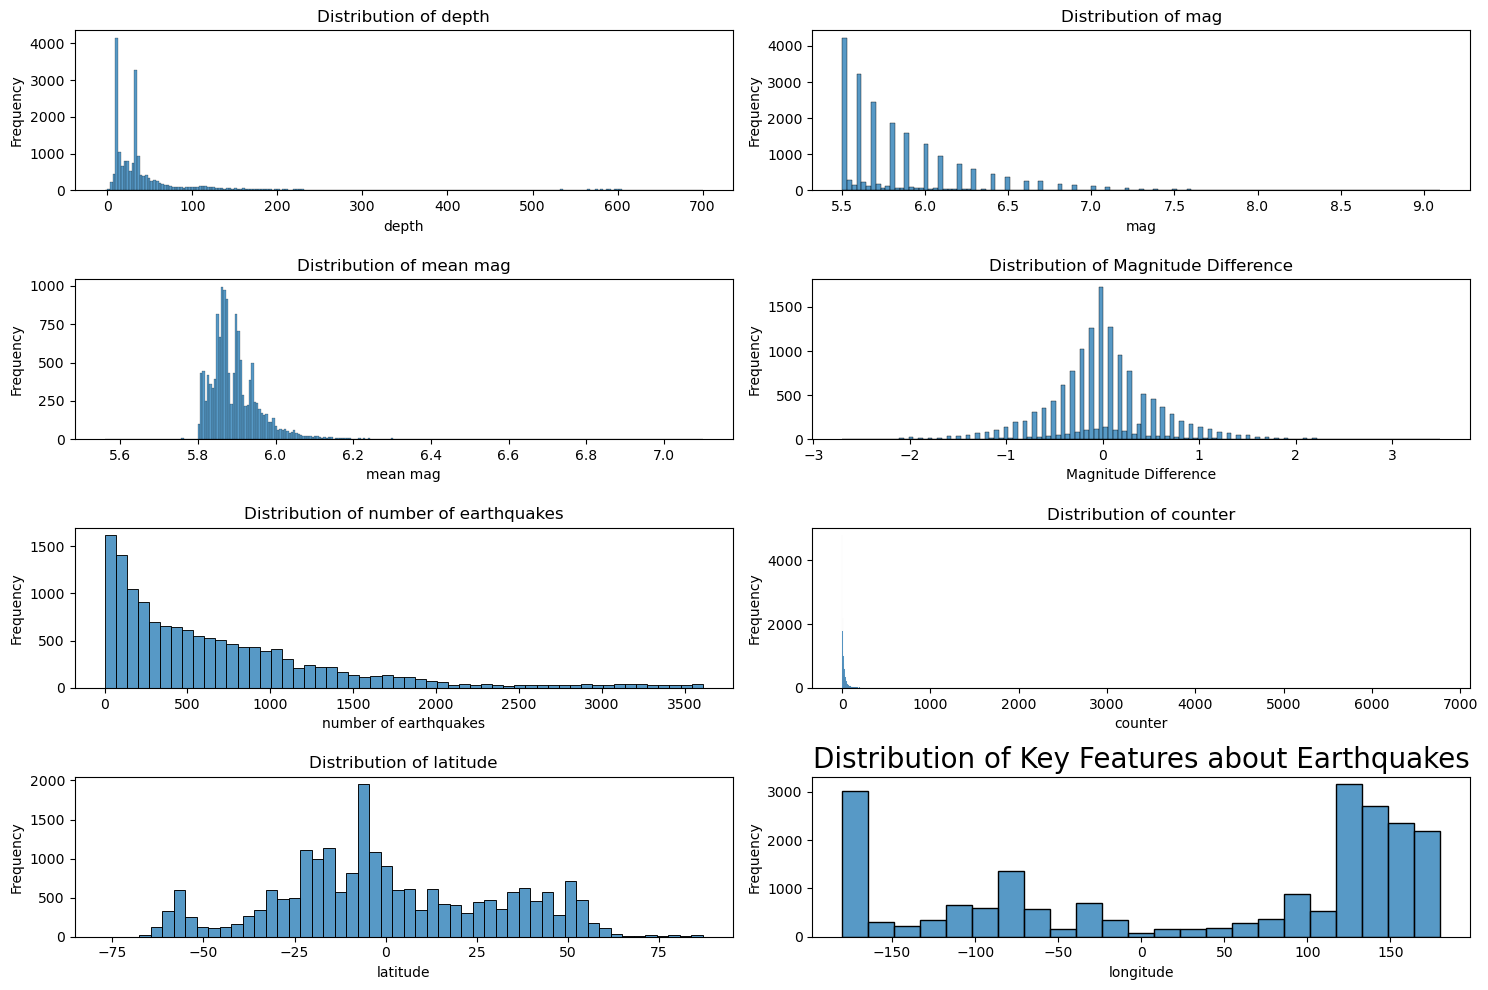

In [151]:
# Create a figure with a 2x3 grid of subplots
fig, axs = plt.subplots(4, 2, figsize=(15, 10))

# List of features to plot
features = ['depth', 'mag', 'mean mag', 'Magnitude Difference', 'number of earthquakes', 'counter', "latitude", "longitude"]

# Iterate through the grid and plot each feature
for i, feature in enumerate(features):
    row = i // 2
    col = i % 2
    sns.histplot(train_df_sorted[feature], kde=False, ax=axs[row, col])
    axs[row, col].set_title(f'Distribution of {feature}')
    axs[row, col].set_xlabel(feature)
    axs[row, col].set_ylabel('Frequency')

# Adjust layout to prevent overlap
plt.title('Distribution of Key Features about Earthquakes', fontsize=20)  
plt.tight_layout()
plt.show()


In [152]:
# List of features we want to describe
features = ['depth', 'mag', 'mean mag', 'Magnitude Difference', 'number of earthquakes', 'counter']

# Use describe() to get descriptive statistics for the selected features
description = train_df_sorted[features].describe()

# Print the description
print(description)

              depth           mag      mean mag  Magnitude Difference  \
count  21258.000000  21259.000000  14445.000000          14445.000000   
mean      74.176053      5.868092      5.897285              0.005846   
std      126.474892      0.407920      0.075734              0.554508   
min       -3.000000      5.500000      5.560000             -2.700000   
25%       15.000000      5.600000      5.853754             -0.300000   
50%       33.000000      5.700000      5.878519              0.000000   
75%       58.900000      6.000000      5.926902              0.300000   
max      700.000000      9.100000      7.100000              3.500000   

       number of earthquakes       counter  
count           14445.000000  21216.000000  
mean              707.190931     43.342572  
std               717.310194    130.020580  
min                 1.000000      1.000000  
25%               171.000000      4.000000  
50%               498.000000     12.000000  
75%               992.00000

## More Visualizations

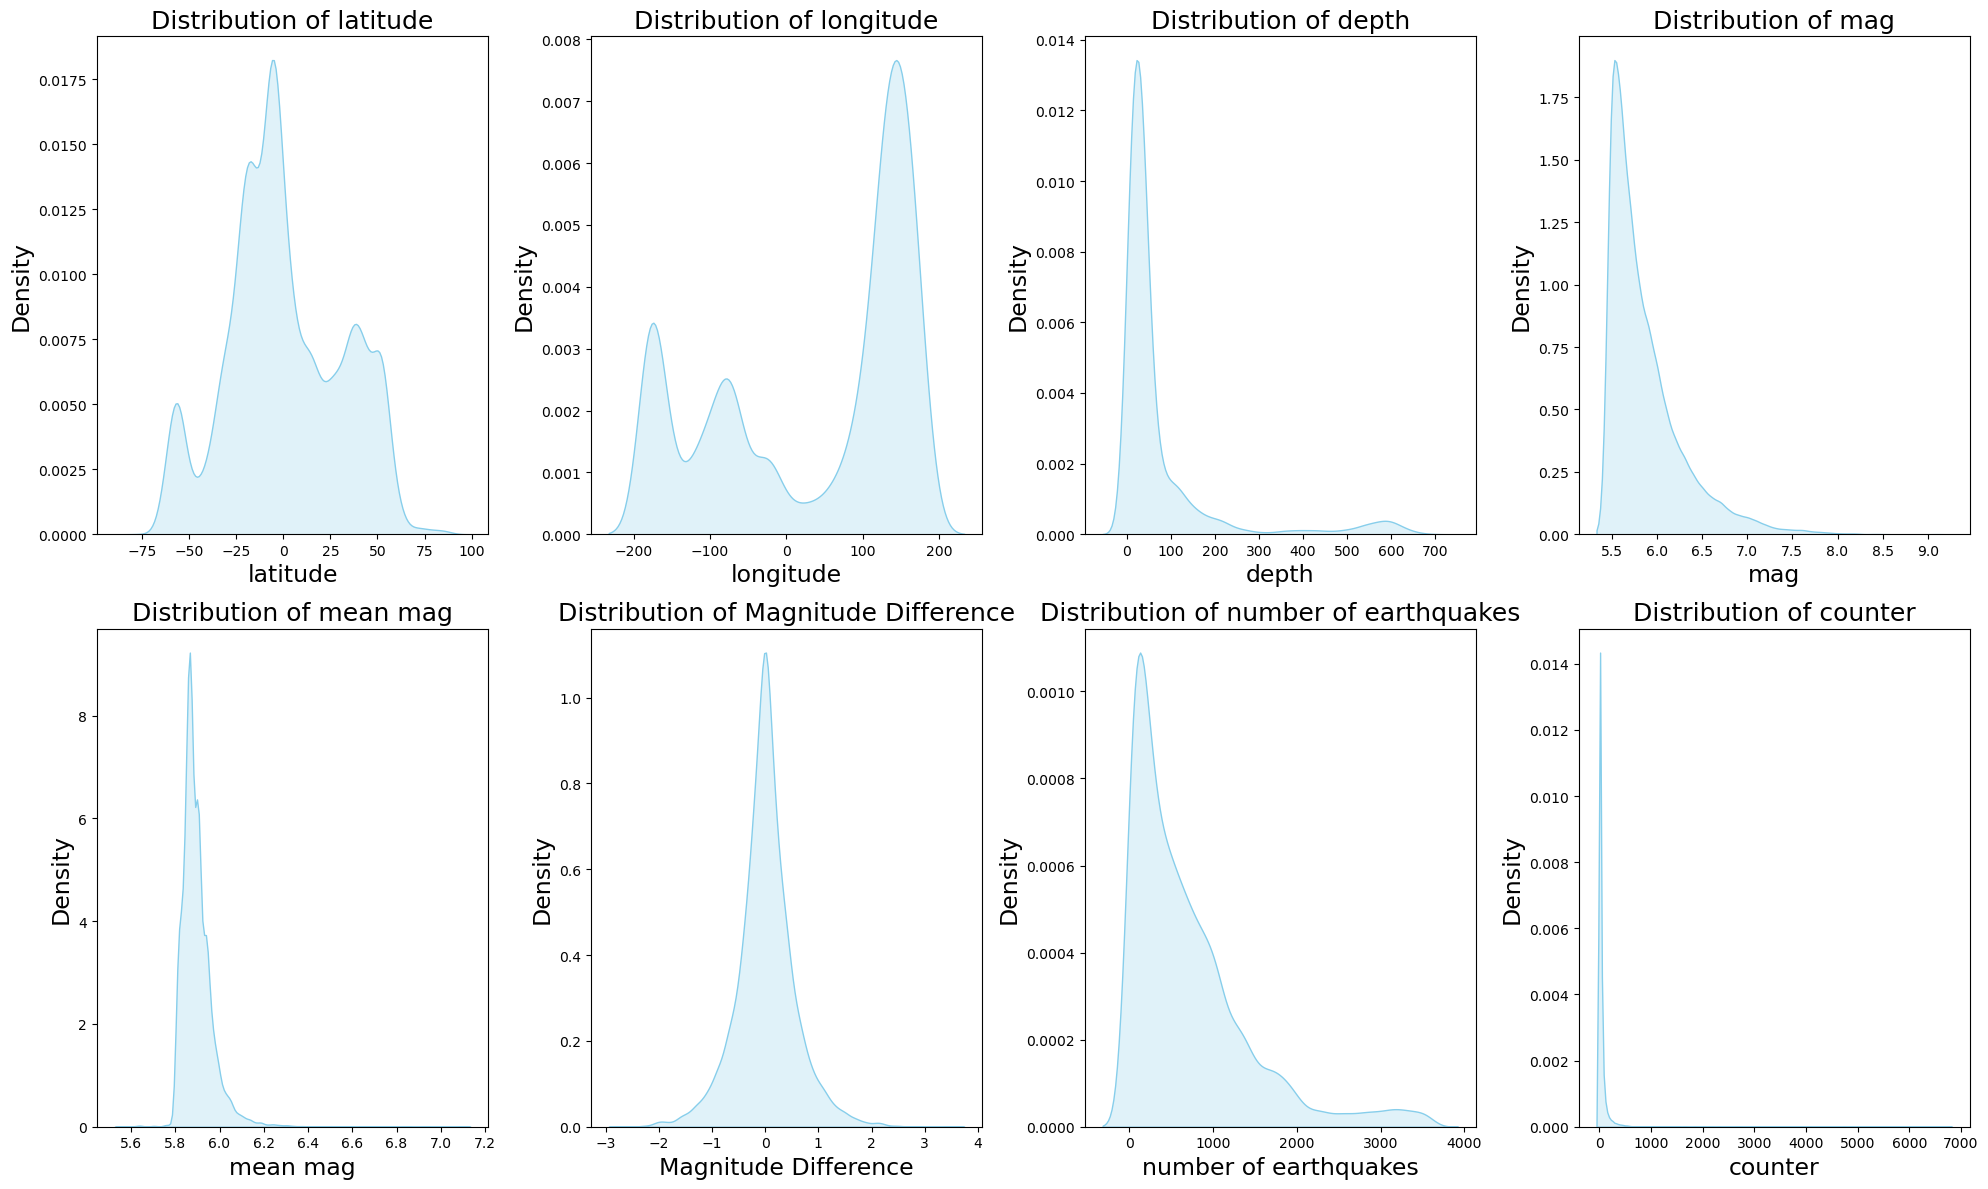

In [153]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Define features
numerical_features = ['latitude', 'longitude', 'depth', 'mag', 'mean mag', 'Magnitude Difference', 'number of earthquakes', 'counter']
categorical_features = ['countries', 'PlateName']

# Number of rows for the numerical plot layout (2 rows)
num_rows = 2
num_cols = (len(numerical_features) + 1) // num_rows  

# Set up the matplotlib figure for numerical features
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 12)) 
axes = axes.flatten()  # Flatten the array of axes for easier iteration

# Plot numerical features
for i, col in enumerate(numerical_features):
    sns.kdeplot(data=train_df_sorted[col], ax=axes[i], fill=True, color='skyblue')
    axes[i].set_title(f'Distribution of {col}', fontsize=18)
    axes[i].set_xlabel(col, fontsize=17)
    axes[i].set_ylabel('Density', fontsize=17)

for j in range(i + 1, num_rows * num_cols):
    axes[j].set_visible(False)

# Adjust the layout
plt.tight_layout()
plt.savefig("Distribution of Key Numerical Features.pdf")
plt.show()

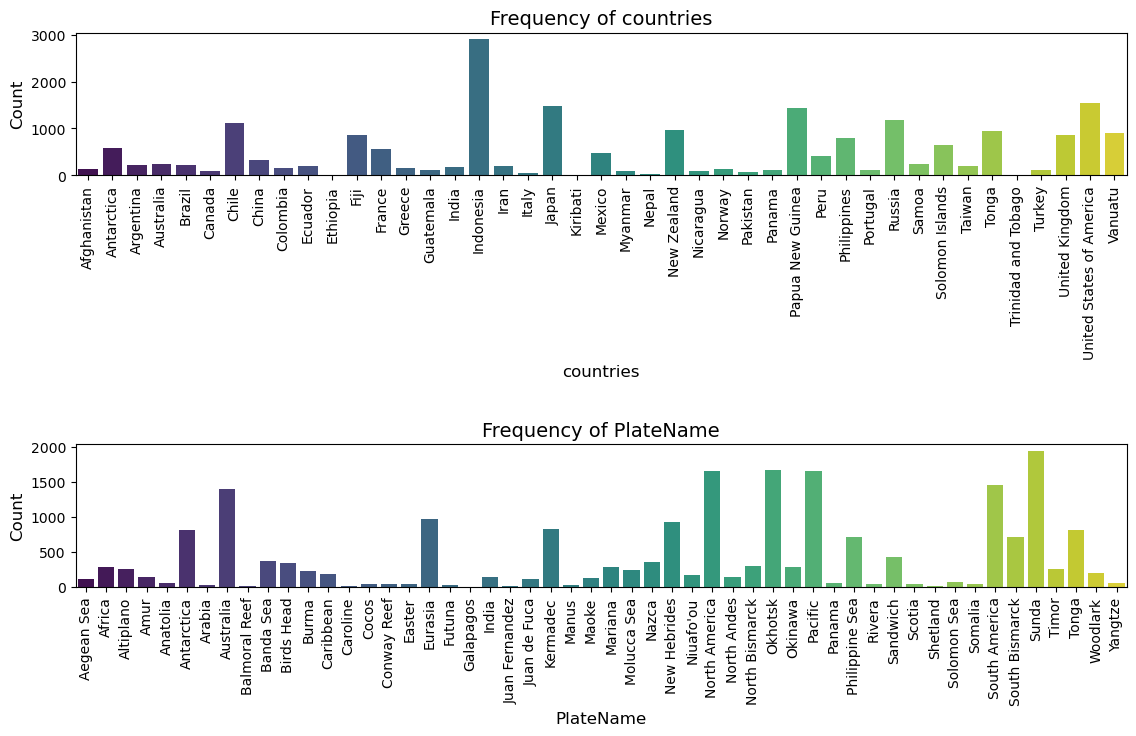

In [154]:
# Set up the matplotlib figure for categorical features
fig, axes = plt.subplots(nrows=len(categorical_features), figsize=(12, 4 * len(categorical_features)))  # Adjust size as needed
# Plot categorical features
for i, col in enumerate(categorical_features):
    sns.countplot(data=train_df_sorted, x=col, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Frequency of {col}', fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Count', fontsize=12)
    for label in axes[i].get_xticklabels():
        label.set_rotation(90)  # Rotate labels to avoid overlap

# Adjust the layout for categorical plot
plt.tight_layout(pad=3.0)
plt.savefig("Distribution of Categorical Features.pdf")
plt.show()


correlation between features

In [155]:
print(train_df_sorted.columns)
all_features = list(train_df_sorted.columns)

Index(['latitude', 'longitude', 'depth', 'mag', 'countries', 'PlateName',
       'year', 'month', 'day', 'day_of_week', 'day_of_week_sin',
       'day_of_week_cos', 'month_sin', 'month_cos', 'mean mag',
       'Magnitude Difference', 'number of earthquakes', 'date', 'counter'],
      dtype='object')


C:\Users\Harrys\AppData\Local\Temp\ipykernel_828\2053897306.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train_df_sorted[all_features].corr()


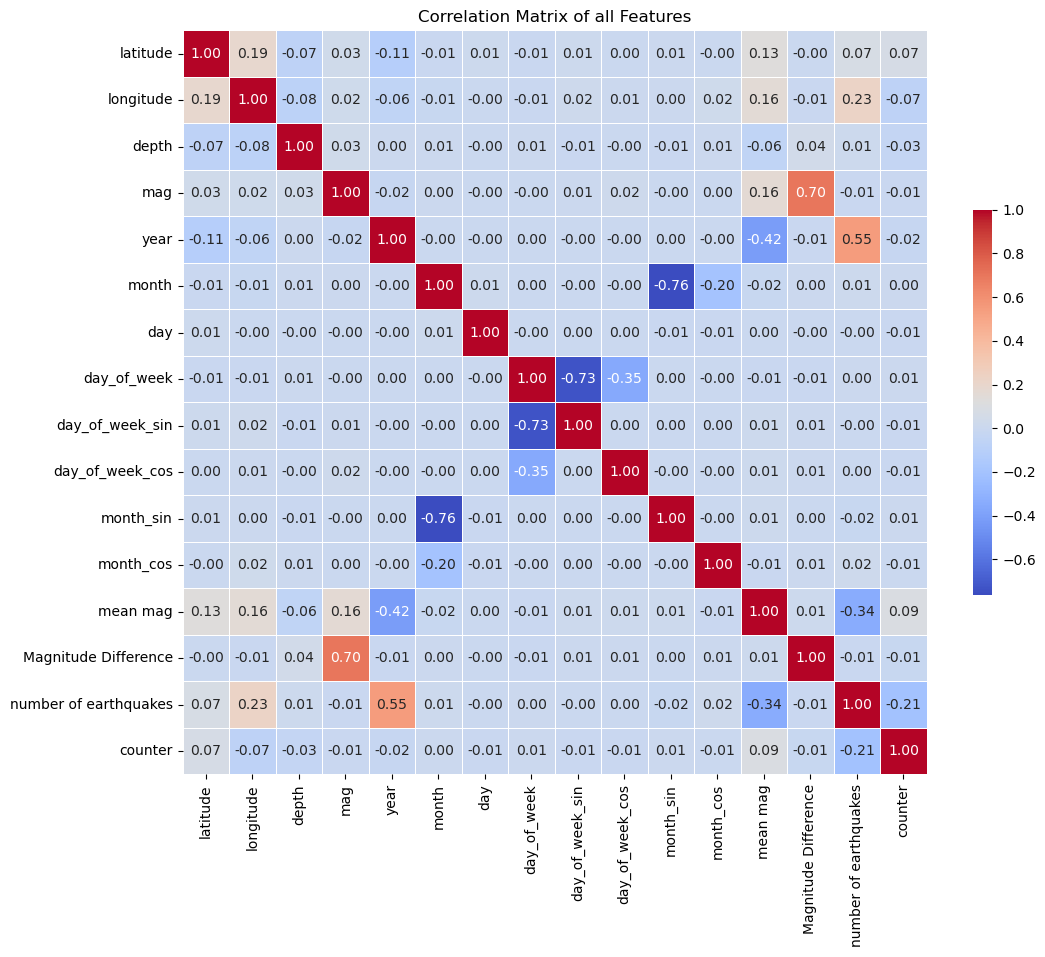

In [156]:
import numpy as np

# Calculate correlations
correlation_matrix = train_df_sorted[all_features].corr()

# Set up figure
plt.figure(figsize=(12, 10))

# Heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Matrix of all Features')
plt.savefig("Correlation Matrix of all Features.pdf")
plt.show()

scatter plots

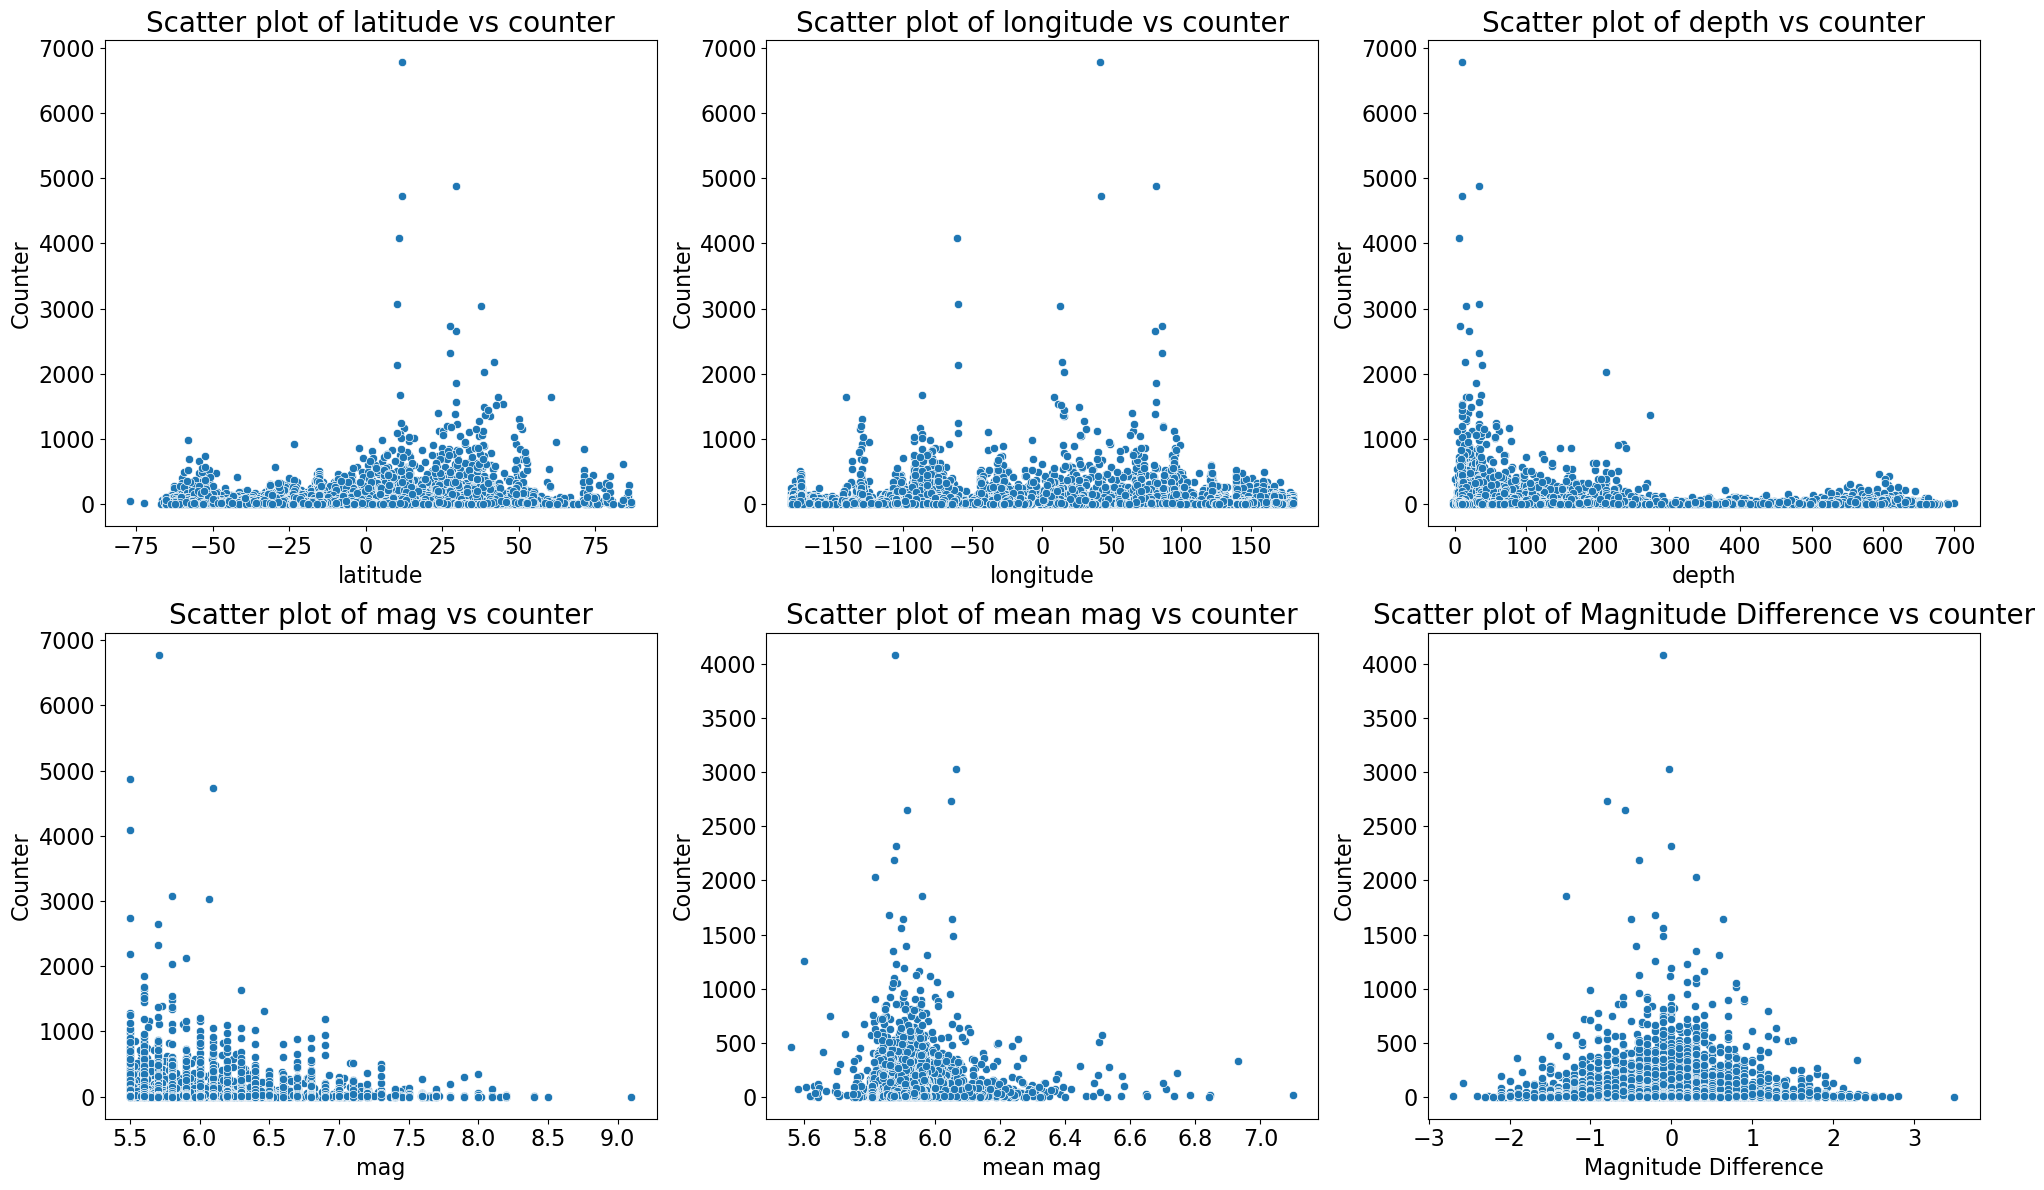

In [158]:
import matplotlib.pyplot as plt
import seaborn as sns


# Define the variables we want to plot with 'counter'
variables = ['latitude', 'longitude', 'depth', 'mag', 'mean mag', 'Magnitude Difference']

# Set up the figure size
plt.figure(figsize=(20, 12))  # Increase figure size

# Create each subplot
for i, var in enumerate(variables, start=1):
    plt.subplot(2, 3, i)  # 2 rows, 3 columns, i-th subplot
    sns.scatterplot(x=var, y='counter', data=train_df_sorted)
    plt.title(f'Scatter plot of {var} vs counter', fontsize=20) 
    plt.xlabel(var, fontsize=16)  
    plt.ylabel('Counter', fontsize=16)  
    plt.xticks(fontsize=16)  
    plt.yticks(fontsize=16)  
# Adjust layout to prevent overlap
plt.tight_layout()
# Save as PDF
plt.savefig('scatter plot-target feature.pdf')
plt.show()




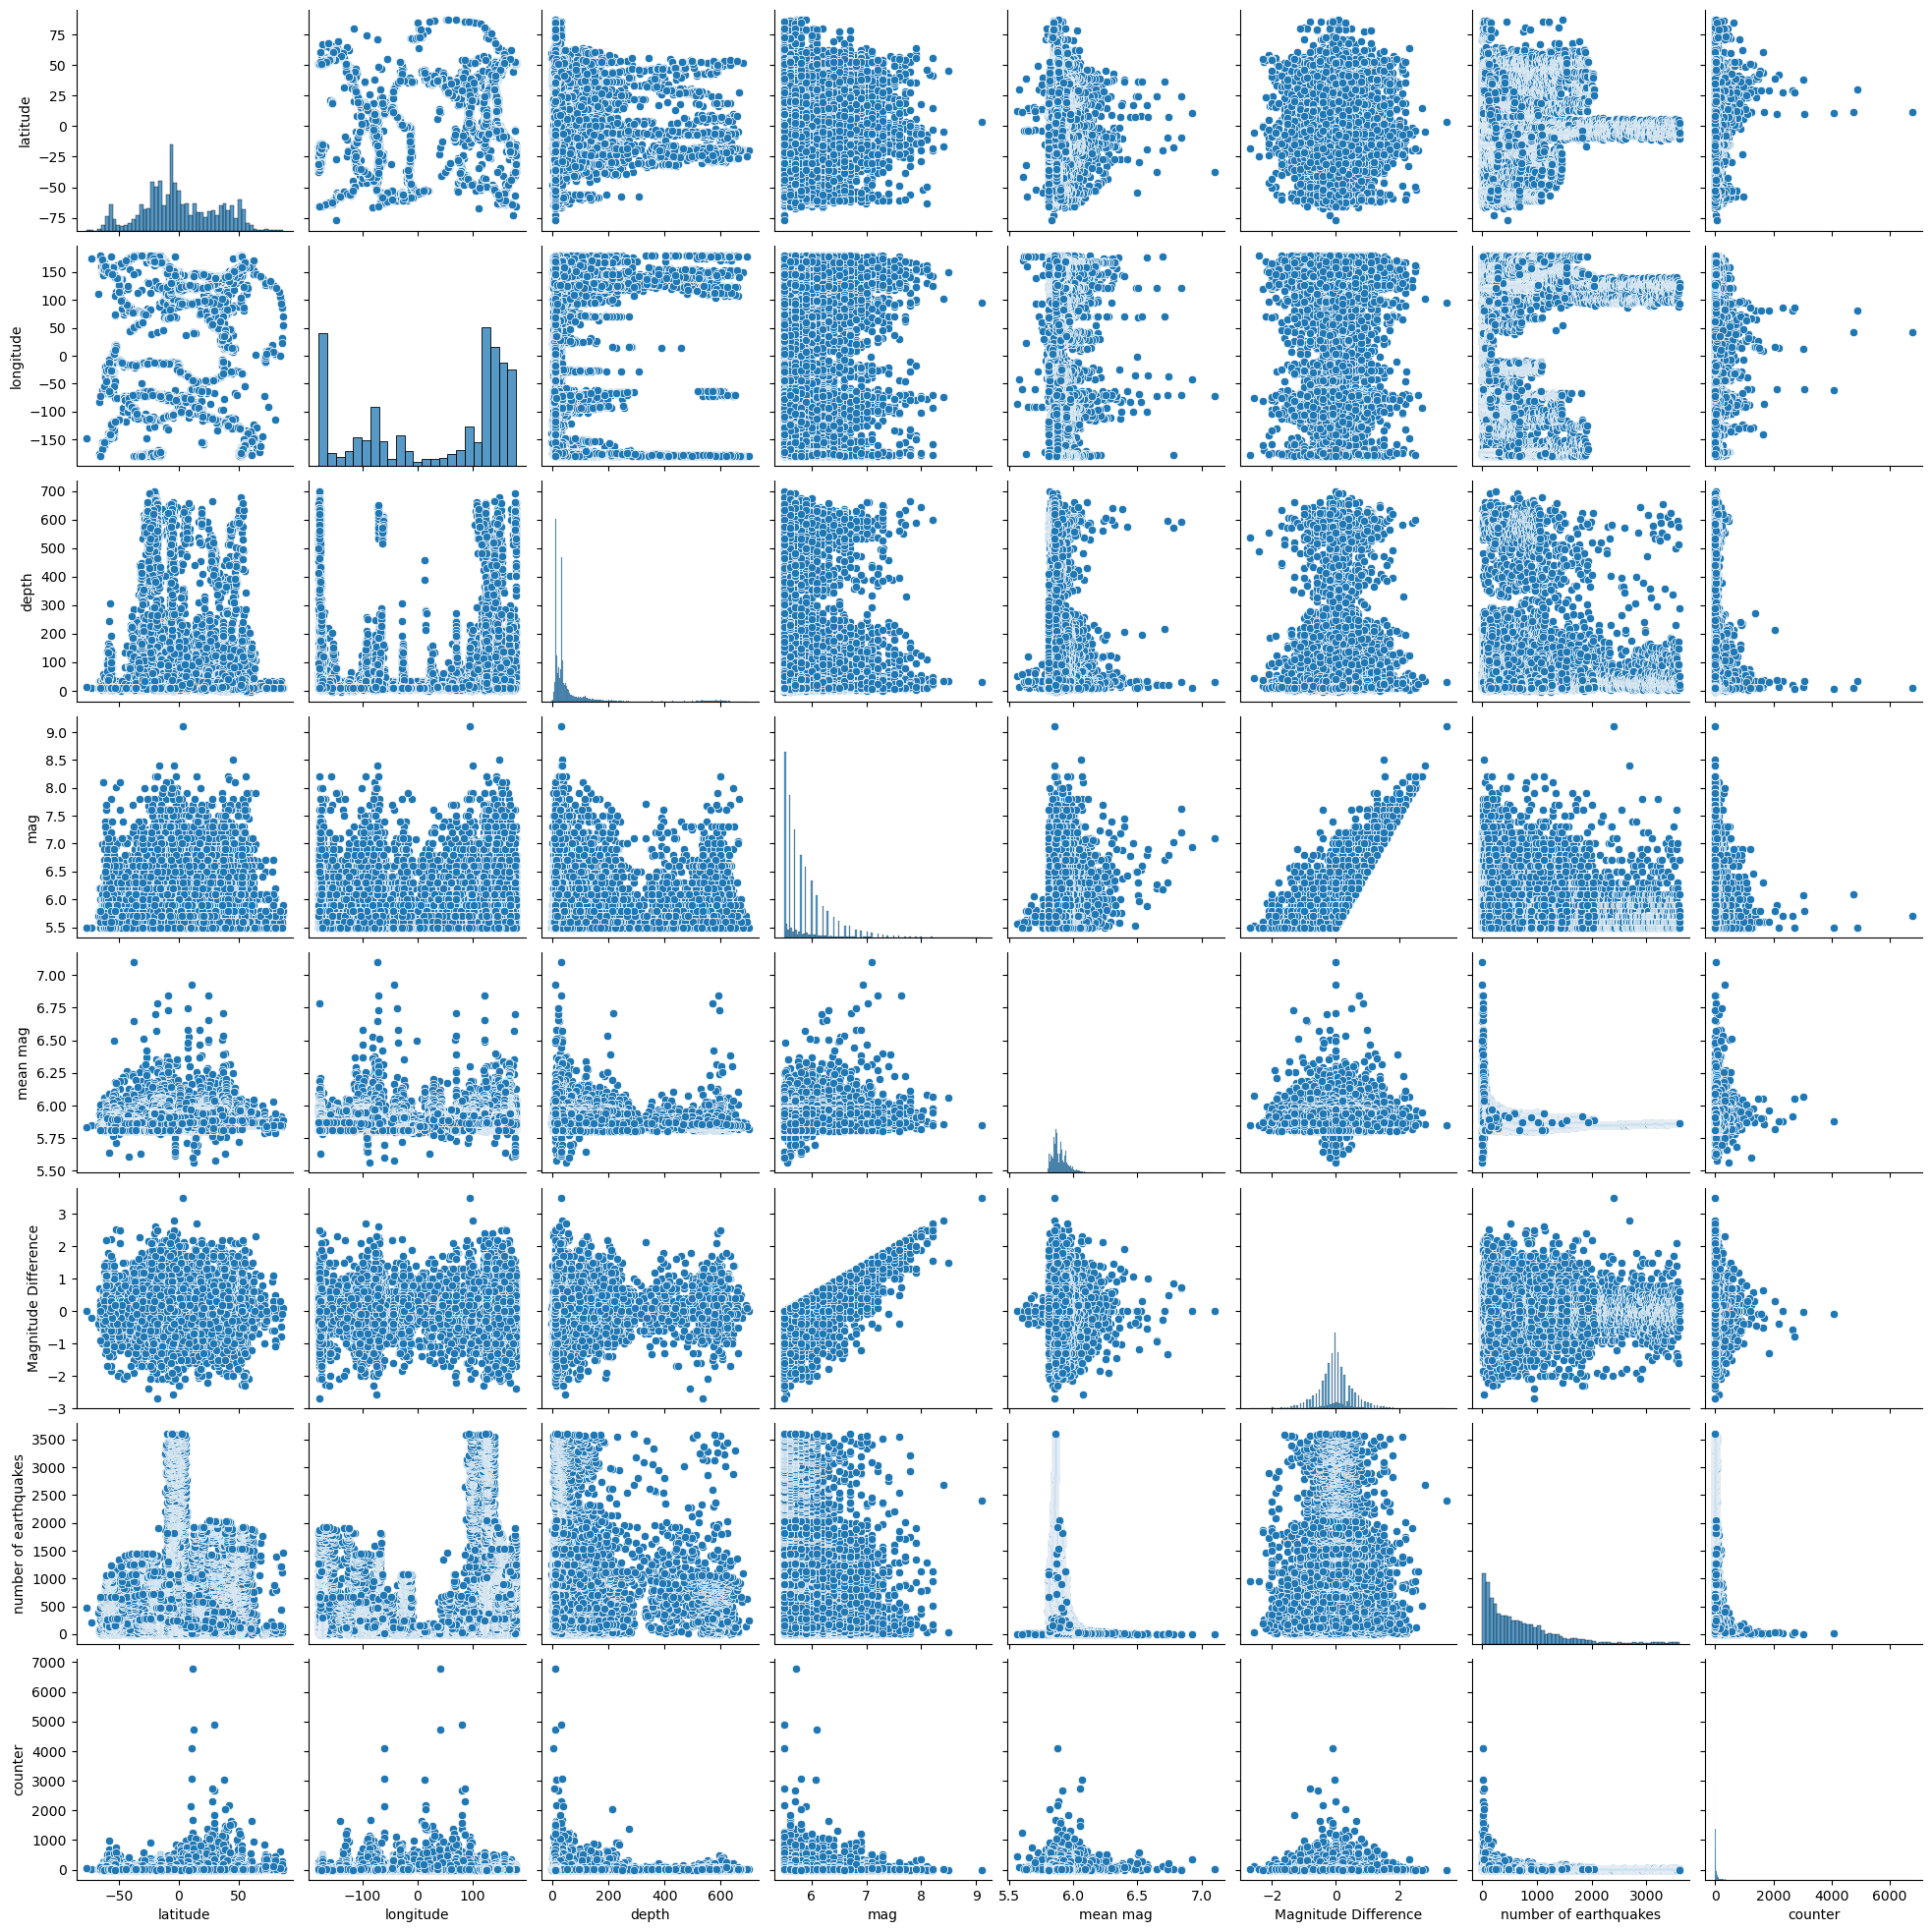

In [159]:
import seaborn as sns
import matplotlib.pyplot as plt

maain_features = ['latitude', 'longitude', 'depth', 'mag', 'mean mag', 'Magnitude Difference', 'number of earthquakes', 'counter']
sns.pairplot(train_df_sorted[maain_features])
plt.show()


Shapiro test for normal distribution

c:\Anacoda\Lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Statistics=nan, p=1.000
Sample looks Gaussian (fail to reject H0)


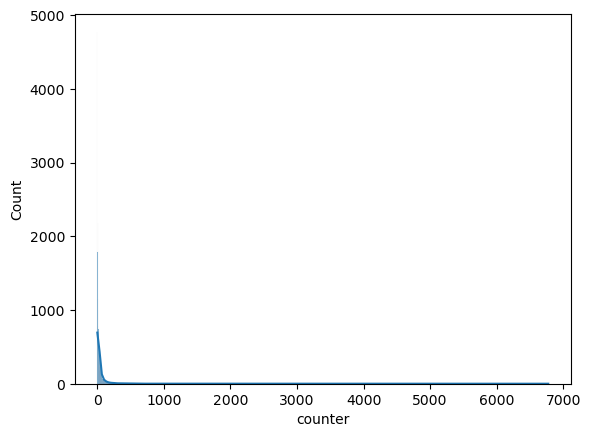

In [160]:
import seaborn as sns
from scipy.stats import shapiro

# Visualizing the distribution
sns.histplot(train_df_sorted['counter'], kde=True)

# Performing a test for normality
stat, p = shapiro(train_df_sorted['counter'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# Interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')


## Final checks before splitting the data

In [161]:
print(train_df_sorted.head(10))
print("###########")
#print(test_df_sorted.head(10))
print("###########")
print(f"train shape: {train_df_sorted.shape}")
#print(f"test shape: {test_df_sorted.shape}")
print("############")
print(train_df_sorted.dtypes)
#print(test_df_sorted.dtypes)

   latitude  longitude  depth   mag                 countries      PlateName  \
0    52.112    177.594   25.0  5.88  United States of America  North America   
1       NaN        NaN    NaN   NaN                       NaN            NaN   
2       NaN        NaN    NaN   NaN                       NaN            NaN   
3    33.623    135.317   50.0  6.18                     Japan           Amur   
4   -15.356   -177.611   55.0  6.21                    France         Futuna   
5   -15.630   -172.436   25.0  5.88                     Samoa          Tonga   
6       NaN        NaN    NaN   NaN                       NaN            NaN   
7       NaN        NaN    NaN   NaN                       NaN            NaN   
8    42.753    145.152   49.0  6.04                     Japan        Okhotsk   
9       NaN        NaN    NaN   NaN                       NaN            NaN   

   year  month  day  day_of_week  day_of_week_sin  day_of_week_cos  month_sin  \
0  1962      1    1            0      

create a copy of the entire dataset

In [162]:
df = train_df_sorted.copy()

## Split the test set from the rest 

In [163]:
# Fidning the cutoff year for spliting the test set from the rest of the data.

total_years = train_df_sorted['year'].nunique()
# To find the unique years
total_years = train_df_sorted['year'].max() - train_df_sorted['year'].min() + 1

# Calculate the index for the cutoff year which represents the most recent 20% of the data
cutoff_year_index = int(total_years * 0.8)
# Use the cutoff index to find the actual year from the 'year' column
cutoff_year = train_df_sorted['year'].sort_values().unique()[cutoff_year_index]
print(cutoff_year)

2011


In [164]:
# Split the data into training and test sets based on the year

#test set
test_df_sorted = train_df_sorted[train_df_sorted['year'] >= 2011]
# Select the remaining data as the training set
train_df_sorted = train_df_sorted[train_df_sorted['year'] < 2011]

# Display the first few rows of the train and test dataframes
print(f"train_df_sorted head: {train_df_sorted.head()}")
print(f" test_df_sorted head: {test_df_sorted.head()}")

print(f"train_df_sorted shape is: {train_df_sorted.shape}")
print(f"test_df_sorted shape is: {test_df_sorted.shape}")

test_df_sorted.to_csv("check the test set.csv")
print(f"train_df_sorted columns are: {train_df_sorted.columns}")
print(f"test_df_sorted columns are: {test_df_sorted.columns}")

train_df_sorted head:    latitude  longitude  depth   mag                 countries      PlateName  \
0    52.112    177.594   25.0  5.88  United States of America  North America   
1       NaN        NaN    NaN   NaN                       NaN            NaN   
2       NaN        NaN    NaN   NaN                       NaN            NaN   
3    33.623    135.317   50.0  6.18                     Japan           Amur   
4   -15.356   -177.611   55.0  6.21                    France         Futuna   

   year  month  day  day_of_week  day_of_week_sin  day_of_week_cos  month_sin  \
0  1962      1    1            0         0.000000         1.000000        0.0   
1  1962      1    2            1         0.781831         0.623490        0.0   
2  1962      1    3            2         0.974928        -0.222521        0.0   
3  1962      1    4            3         0.433884        -0.900969        0.0   
4  1962      1    5            4        -0.433884        -0.900969        0.0   

   month_c

## Our test set has some missing values. Specifically:
1) 159 rows (latitude, longitude, dept, mag, countries and PlateName) which are the day gaps we have in our time serries. Later on we will use knn for those
2) 1655 rows (for mean mag, magnitide difference, number of earthquakes and counter) which are rows (previously time gaps) that we filled with time shifitng and therefore we have later on to recalculate those values
3) 200 rows for counter (159 rows caused by the day gaps and 41 rows which are the last recorded earthquakes of countries)

In [165]:
# Check the number of missing values in each column of the train df
missing_values_train = test_df_sorted.isnull().sum()
# Print the number of missing values for each column
print(missing_values_train)

latitude                  159
longitude                 159
depth                     159
mag                       159
countries                 159
PlateName                 159
year                        0
month                       0
day                         0
day_of_week                 0
day_of_week_sin             0
day_of_week_cos             0
month_sin                   0
month_cos                   0
mean mag                 1655
Magnitude Difference     1655
number of earthquakes    1655
date                        0
counter                   200
dtype: int64


We have 41 more missing data on the counter feature (than day gaps that we filled) because those 41 rows are earthquakes last recorded in a specific country. We will remove those rows as the next earthquake in those countries has not been recorded and we can't know the value of the feature "counter".

In [166]:
# Condition to check where 'counter' is NaN and 'latitude' is not NaN
condition = test_df_sorted['counter'].isna() & test_df_sorted['latitude'].notna()

# Count the rows meeting the condition
count_nan_counter = condition.sum()
print("Number of rows where 'counter' is NaN and 'latitude' is not NaN:", count_nan_counter)

# Print rows meeting the condition
print(test_df_sorted[condition])

Number of rows where 'counter' is NaN and 'latitude' is not NaN: 41
       latitude  longitude    depth  mag                 countries  \
20063   11.0316   -60.9005   31.750  5.9       Trinidad and Tobago   
21920   11.9367   -87.1371   17.000  6.1                 Nicaragua   
22126   25.1448    63.5694   27.110  5.6                  Pakistan   
22227   43.9315    13.3152    8.000  5.6                     Italy   
22304   35.7086    28.4965   29.590  5.9                    Greece   
22364   28.5073   -43.5932   10.000  5.5                  Portugal   
22468   21.9267   121.5692    4.000  5.6                    Taiwan   
22483   37.5794    35.9482   13.116  5.5                    Turkey   
22490   12.8061   -90.9046    9.000  5.7                 Guatemala   
22491   10.5368    93.5418   88.891  5.9                     India   
22518    5.3394   -76.6839   24.036  5.7                  Colombia   
22524    9.9367   -78.4562   33.948  5.5                    Panama   
22539   50.8131  -130.

In [167]:
# Columns to fill with NaN
columns_to_fill_nan = ['latitude', 'longitude', 'depth', 'mag', 'countries', 'PlateName', 'mean mag', 'Magnitude Difference', 'number of earthquakes']

# Fill specified columns with NaN for rows meeting the condition
test_df_sorted.loc[condition, columns_to_fill_nan] = pd.NA

In [168]:
# Check the number of missing values in each column of the train df
missing_values_train = test_df_sorted.isnull().sum()
# Print the number of missing values for each column
print(missing_values_train)

"""
The other columns (mean mag, mag difference, number of earthquakes) that have missing data are not really missing, we will just recompute them later when we impute the missing data, as those features are calculated from our data.
"""

latitude                  200
longitude                 200
depth                     200
mag                       200
countries                 200
PlateName                 200
year                        0
month                       0
day                         0
day_of_week                 0
day_of_week_sin             0
day_of_week_cos             0
month_sin                   0
month_cos                   0
mean mag                 1684
Magnitude Difference     1684
number of earthquakes    1684
date                        0
counter                   200
dtype: int64


'\nThe other columns (mean mag, mag difference, number of earthquakes) that have missing data are not really missing, we will just recompute them later when we impute the missing data, as those features are calculated from our data.\n'

## Splitting the train_df to train and val.

## We end up witht he following:
1) Original dataset: 100%
2) Training: 75% of 80% = 60% of the original dataset
3) Validation: 25% of 80% = 20% of the original dataset
4) Testing: 20% of the original dataset

In [169]:
# Fidning the cutoff year for spliting the test set from the rest of the data.

total_years = train_df_sorted['year'].nunique()
# Calculate the index for the cutoff year which represents the most recent 75% of the data
cutoff_year_index = int(total_years * 0.75)
# Use the cutoff index to find the actual year from the 'year' column
cutoff_year = train_df_sorted['year'].sort_values().unique()[cutoff_year_index]
print(cutoff_year)

1998


In [170]:
# Split the data into training and val sets based on the year
val = train_df_sorted[train_df_sorted['year'] >= 1998]
# Select the remaining data as the training set
train = train_df_sorted[train_df_sorted['year'] < 1998]
# Reset the index of the training dataset
train = train.reset_index(drop=True)

# Reset the index of the validation dataset
val = val.reset_index(drop=True)

# Example: Display the first few rows of the train and test dataframes
print(f"train head: {train.head()}")
print(f"val head: {val.head()}")

print(f"train shape is: {train.shape}")
print(f"val shape is: {val.shape}")

val.to_csv("check the val set.csv")
print(f"train columns are: {train.columns}")
print(f"val columns are: {val.columns}")

train head:    latitude  longitude  depth   mag                 countries      PlateName  \
0    52.112    177.594   25.0  5.88  United States of America  North America   
1       NaN        NaN    NaN   NaN                       NaN            NaN   
2       NaN        NaN    NaN   NaN                       NaN            NaN   
3    33.623    135.317   50.0  6.18                     Japan           Amur   
4   -15.356   -177.611   55.0  6.21                    France         Futuna   

   year  month  day  day_of_week  day_of_week_sin  day_of_week_cos  month_sin  \
0  1962      1    1            0         0.000000         1.000000        0.0   
1  1962      1    2            1         0.781831         0.623490        0.0   
2  1962      1    3            2         0.974928        -0.222521        0.0   
3  1962      1    4            3         0.433884        -0.900969        0.0   
4  1962      1    5            4        -0.433884        -0.900969        0.0   

   month_cos  mean m


val head:    latitude  longitude  depth  mag                 countries       PlateName  \
0    -6.338    154.870   46.2  5.9          Papua New Guinea         Pacific   
1    51.310    178.802   33.0  5.6  United States of America   North America   
2    54.224   -164.177   10.0  5.8  United States of America   North America   
3   -22.301    170.911  100.6  7.5                    France    New Hebrides   
4    23.913    141.907   95.6  6.3                     Japan  Philippine Sea   

   year  month  day  day_of_week  day_of_week_sin  day_of_week_cos  month_sin  \
0  1998      1    1            3         0.433884        -0.900969        0.0   
1  1998      1    2            4        -0.433884        -0.900969        0.0   
2  1998      1    3            5        -0.974928        -0.222521        0.0   
3  1998      1    4            6        -0.781831         0.623490        0.0   
4  1998      1    5            0         0.000000         1.000000        0.0   

   month_cos  mean ma

In [171]:
# Check for missing values in all columns
missing_values = val.isnull().sum()
print("Missing values in each column of val set:")
print(missing_values)

Missing values in each column of val set:
latitude                   79
longitude                  79
depth                      79
mag                        79
countries                  79
PlateName                  79
year                        0
month                       0
day                         0
day_of_week                 0
day_of_week_sin             0
day_of_week_cos             0
month_sin                   0
month_cos                   0
mean mag                 1527
Magnitude Difference     1527
number of earthquakes    1527
date                        0
counter                    80
dtype: int64


In [172]:
# Check for missing values in all columns
missing_values = train.isnull().sum()
print("Missing train in each column of val set:")
print(missing_values)

Missing train in each column of val set:
latitude                 1147
longitude                1147
depth                    1148
mag                      1147
countries                1147
PlateName                1147
year                        0
month                       0
day                         0
day_of_week                 0
day_of_week_sin             0
day_of_week_cos             0
month_sin                   0
month_cos                   0
mean mag                 5017
Magnitude Difference     5017
number of earthquakes    5017
date                        0
counter                  1148
dtype: int64


As we did for the test set we will make the last recorded earthquake of each country a NaN row as we dont have the record of the feature "counter" for those countries.

In [173]:
# Condition to check where 'counter' is NaN and 'latitude' is not NaN
condition = train['counter'].isna() & train['latitude'].notna()

# Count the rows meeting the condition
count_nan_counter = condition.sum()
print("Number of rows where 'counter' is NaN and 'latitude' is not NaN:", count_nan_counter)

# Print rows meeting the condition
print(train[condition])

# Columns to fill with NaN
columns_to_fill_nan = ['latitude', 'longitude', 'depth', 'mag', 'countries', 'PlateName', 'mean mag', 'Magnitude Difference', 'number of earthquakes']

# Fill specified columns with NaN for rows meeting the condition
train.loc[condition, columns_to_fill_nan] = pd.NA

Number of rows where 'counter' is NaN and 'latitude' is not NaN: 1
      latitude  longitude  depth  mag countries PlateName  year  month  day  \
7736    -3.471    177.628   33.0  5.8  Kiribati   Pacific  1983      3    8   

      day_of_week  day_of_week_sin  day_of_week_cos  month_sin  month_cos  \
7736            1         0.781831          0.62349   0.866025        0.5   

      mean mag  Magnitude Difference  number of earthquakes       date  \
7736  5.646154                   0.0                   13.0 1983-03-08   

      counter  
7736      NaN  


In [174]:
# Condition to check where 'counter' is NaN and 'latitude' is not NaN
condition = val['counter'].isna() & val['latitude'].notna()

# Count the rows meeting the condition
count_nan_counter = condition.sum()
print("Number of rows where 'counter' is NaN and 'latitude' is not NaN:", count_nan_counter)

# Optional: print rows meeting the condition
print(val[condition])

# Columns to fill with NaN
columns_to_fill_nan = ['latitude', 'longitude', 'depth', 'mag', 'countries', 'PlateName', 'mean mag', 'Magnitude Difference', 'number of earthquakes']

# Fill specified columns with NaN for rows meeting the condition
val.loc[condition, columns_to_fill_nan] = pd.NA

Number of rows where 'counter' is NaN and 'latitude' is not NaN: 1
      latitude  longitude  depth  mag countries PlateName  year  month  day  \
2823    12.471     40.634   11.8  5.5  Ethiopia    Arabia  2005      9   24   

      day_of_week  day_of_week_sin  day_of_week_cos  month_sin  month_cos  \
2823            5        -0.974928        -0.222521  -0.866025       -0.5   

      mean mag  Magnitude Difference  number of earthquakes       date  \
2823  5.890526                   0.0                   19.0 2005-09-24   

      counter  
2823      NaN  


In [175]:
# Check for missing values in all columns
missing_values = train.isnull().sum()
print("Missing train in each column of val set:")
print(missing_values)

# Check for missing values in all columns
missing_values = val.isnull().sum()
print("Missing val in each column of val set:")
print(missing_values)

"""
train: 8% missing data
val: 1% missing data
"""

Missing train in each column of val set:
latitude                 1148
longitude                1148
depth                    1149
mag                      1148
countries                1148
PlateName                1148
year                        0
month                       0
day                         0
day_of_week                 0
day_of_week_sin             0
day_of_week_cos             0
month_sin                   0
month_cos                   0
mean mag                 5018
Magnitude Difference     5018
number of earthquakes    5018
date                        0
counter                  1148
dtype: int64
Missing val in each column of val set:
latitude                   80
longitude                  80
depth                      80
mag                        80
countries                  80
PlateName                  80
year                        0
month                       0
day                         0
day_of_week                 0
day_of_week_sin             0
day_of_

'\ntrain: 8% missing data\nval: 1% missing data\n'

In [176]:
# Numeric features for standardization
numeric_features = [ 'depth', "mag", "year", "month", "day", 'day_of_week', 'day_of_week_sin', 'day_of_week_cos', 
                    'month_sin','month_cos', 'mean mag', 'Magnitude Difference', 'number of earthquakes']

# List of features to check distribution
features_to_check = ['latitude', 'longitude', 'depth', "counter", "Magnitude Difference", "number of earthquakes", "mean mag"]


In [177]:
print(train.columns)

Index(['latitude', 'longitude', 'depth', 'mag', 'countries', 'PlateName',
       'year', 'month', 'day', 'day_of_week', 'day_of_week_sin',
       'day_of_week_cos', 'month_sin', 'month_cos', 'mean mag',
       'Magnitude Difference', 'number of earthquakes', 'date', 'counter'],
      dtype='object')


# Feature Transformation
We will clip, log transform and standardize properly our features

In [178]:
def cap_and_log_transform(df, feature_name):
    if feature_name == "depth":
        IQR = df['depth'].quantile(0.75) - df['depth'].quantile(0.25)
        upper_bound = df['depth'].quantile(0.75) + 1.5 * IQR
        df['depth'] = df['depth'].clip(lower=0, upper=upper_bound)
    
    elif feature_name == "counter":
        upper_bound = df['counter'].quantile(0.90)
        df['counter'] = df['counter'].clip(upper=upper_bound)

    elif feature_name == "mag":
        upper_bound = df['mag'].quantile(0.99)
        df['mag'] = df['mag'].clip(upper=upper_bound)

    transformed_series = np.log1p(df[feature_name])
    return transformed_series

In [179]:
numeric_features = [ 'depth', "mag", "year", "month", "day", 'day_of_week', 'day_of_week_sin', 'day_of_week_cos', 
                    'month_sin','month_cos', 'mean mag', 'Magnitude Difference', 'number of earthquakes']

# cap and log transform the numeric features
# features for cap and log
features_for_cap_and_log = [ 'depth', 'mag']
for feature in features_for_cap_and_log:
    train[feature] = cap_and_log_transform(train, feature)
    val[feature] = cap_and_log_transform(val, feature)


# After the imputation of missing data we will update the columns counter, mean mag, magnitude difference and number of earthquakes and then standardize them as well
# month_sin and month_cos... which already encode the cyclical nature in a bounded range (typically -1 to 1), additional scaling wont be necessary

# List of features to be standardized excluding latitude and longitude. We will first impute the missing data of latitude/longitude and then standarize them.
numeric_features_to_standardize = ['depth', "mag", "year", "month", "day", 'day_of_week']


# Initialize a dictionary to hold the scalers for each feature
scalers = {feature: StandardScaler() for feature in numeric_features_to_standardize}

# Fit and transform each feature separately for the training data
for feature in numeric_features_to_standardize:
    train[feature] = scalers[feature].fit_transform(train[[feature]])

# Transform each feature separately for the validation data using the fitted scalers
for feature in numeric_features_to_standardize:
    val[feature] = scalers[feature].transform(val[[feature]])

In [180]:
# check that everything is okay
print(train.head(10))
print("###########")
print(val.head(10))
print("###########")
print(f"train shape: {train.shape}")
print(f"test shape: {val.shape}")
print("############")
print(train.dtypes)
print(val.dtypes)


   latitude  longitude     depth       mag                 countries  \
0    52.112    177.594 -0.469894  0.061066  United States of America   
1       NaN        NaN       NaN       NaN                       NaN   
2       NaN        NaN       NaN       NaN                       NaN   
3    33.623    135.317  0.410154  0.832517                     Japan   
4   -15.356   -177.611  0.532321  0.907882                    France   
5   -15.630   -172.436 -0.469894  0.061066                     Samoa   
6       NaN        NaN       NaN       NaN                       NaN   
7       NaN        NaN       NaN       NaN                       NaN   
8    42.753    145.152  0.384287  0.476600                     Japan   
9       NaN        NaN       NaN       NaN                       NaN   

       PlateName      year     month       day  day_of_week  day_of_week_sin  \
0  North America -1.684627 -1.601451 -1.673805    -1.499743         0.000000   
1            NaN -1.684627 -1.601451 -1.560170 

##  Imputting the missing data of latitude and longitude in train and val.
To do that, we will use knn and specifically we will use the haversine function of distance. The Haversine distance is a formula used to calculate the distance between two points on a sphere (such as the Earth) given their latitude and longitude coordinates. We have to emphasize that we can't use Euclidean distance calculations for latitude and longitude as Euclidian distance assumes a flat surface

In [181]:
# Define the haversine distance function
def haversine_distance(latlon1, latlon2):
    # Unpack latitude/longitude
    lat1, lon1 = latlon1[:, 0], latlon1[:, 1]
    lat2, lon2 = latlon2[:, 0], latlon2[:, 1]
    
    # Initialize an array to hold distances
    dist = np.zeros((latlon1.shape[0], 1), dtype=float)
    
    # Compute haversine distance for each set of points
    for i in range(latlon1.shape[0]):
        dist[i] = haversine((lat1[i], lon1[i]), (lat2[i], lon2[i]), unit=Unit.KILOMETERS)
    
    return dist

# Separate out rows that have complete geospatial data
complete_cases = train.dropna(subset=['latitude', 'longitude'])

print(complete_cases.head(15))

    latitude  longitude     depth       mag                 countries  \
0     52.112    177.594 -0.469894  0.061066  United States of America   
3     33.623    135.317  0.410154  0.832517                     Japan   
4    -15.356   -177.611  0.532321  0.907882                    France   
5    -15.630   -172.436 -0.469894  0.061066                     Samoa   
8     42.753    145.152  0.384287  0.476600                     Japan   
18    38.503     22.102 -0.469894 -0.607958                    Greece   
25    35.191     22.769 -0.469894  0.270027                    Greece   
27   -17.104   -171.932 -0.872747  0.629995                     Tonga   
31   -31.642   -177.151 -1.104081 -0.607958               New Zealand   
33    -1.311    137.474 -0.574448  1.156852                 Indonesia   
34    -0.680    -20.152 -1.104081  0.321892            United Kingdom   
38    -3.117    141.265 -0.044816  0.450907          Papua New Guinea   
44   -37.845    -72.885 -0.240140  3.011717        

In [182]:
# Find the index of rows with missing geospatial data
missing_geo_index = train[train['latitude'].isna() | train['longitude'].isna()].index

# Randomly sample non-missing coordinates for latitude and longitude
random_sample = complete_cases.sample(len(missing_geo_index), random_state=42)
print(random_sample.head())
# Temporarily fill missing values
train.loc[missing_geo_index, 'latitude'] = random_sample["latitude"].values
train.loc[missing_geo_index, 'longitude'] = random_sample["longitude"].values


# Instantiate the KNN regressor with haversine distance
knn = KNeighborsRegressor(n_neighbors=3, metric='haversine')

# Fit the KNN regressor on the non-missing data
# Convert degrees to radians for haversine distance calculation
knn.fit(np.radians(complete_cases[['latitude', 'longitude']]), complete_cases[['latitude', 'longitude']])

# Now apply KNN
imputed_values = knn.predict(np.radians(train.loc[missing_geo_index, ['latitude', 'longitude']]))
train.loc[missing_geo_index, ['latitude', 'longitude']] = imputed_values

       latitude  longitude     depth       mag    countries      PlateName  \
2801    -27.786    -66.573  1.558115 -0.499236    Argentina  South America   
4093     13.372    122.787 -0.119478  2.787181  Philippines          Sunda   
11379   -23.996   -177.218  1.558115 -0.418122        Tonga          Tonga   
6572      0.964    125.990  0.156541 -0.150340    Indonesia          Sunda   
576     -29.776   -176.963 -0.748872 -0.662565  New Zealand       Kermadec   

           year     month       day  day_of_week  day_of_week_sin  \
2801  -1.010789  0.718261 -1.560170    -0.999753         0.781831   
4093  -0.625739 -1.021523  0.144358     1.000209        -0.974928   
11379  1.299511 -1.311487  1.167074     0.500219        -0.433884   
6572  -0.048164  1.588154  1.621615     1.500200        -0.781831   
576   -1.588364  0.138333  1.735250    -0.499762         0.974928   

       day_of_week_cos     month_sin  month_cos  mean mag  \
2801          0.623490 -8.660254e-01  -0.500000  5.9900

In [183]:
# check that everything is okay
print(train.head(10))
print("###########")
print(val.head(10))
print("###########")
print(f"train shape: {train.shape}")
print(f"test shape: {val.shape}")
print("############")
print(train.dtypes)
print(val.dtypes)


    latitude   longitude     depth       mag                 countries  \
0  52.112000  177.594000 -0.469894  0.061066  United States of America   
1 -27.795000  -66.655667       NaN       NaN                       NaN   
2  13.314667  122.829667       NaN       NaN                       NaN   
3  33.623000  135.317000  0.410154  0.832517                     Japan   
4 -15.356000 -177.611000  0.532321  0.907882                    France   
5 -15.630000 -172.436000 -0.469894  0.061066                     Samoa   
6 -23.952000 -177.243667       NaN       NaN                       NaN   
7   0.997000  126.048667       NaN       NaN                       NaN   
8  42.753000  145.152000  0.384287  0.476600                     Japan   
9 -29.772333 -176.971000       NaN       NaN                       NaN   

       PlateName      year     month       day  day_of_week  day_of_week_sin  \
0  North America -1.684627 -1.601451 -1.673805    -1.499743         0.000000   
1            NaN -1.68462

In [184]:
# Check for missing values in all columns
missing_values = train.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
latitude                    0
longitude                   0
depth                    1149
mag                      1148
countries                1148
PlateName                1148
year                        0
month                       0
day                         0
day_of_week                 0
day_of_week_sin             0
day_of_week_cos             0
month_sin                   0
month_cos                   0
mean mag                 5018
Magnitude Difference     5018
number of earthquakes    5018
date                        0
counter                  1148
dtype: int64


validation set

In [185]:
# do the same for the val set

# Find the index of rows with missing geospatial data in the validation dataset
missing_geo_index_val = val[val['latitude'].isna() | val['longitude'].isna()].index

random_sample_val = complete_cases.sample(len(missing_geo_index_val), random_state=42)
val.loc[missing_geo_index_val, 'latitude'] = random_sample_val["latitude"].values
val.loc[missing_geo_index_val, 'longitude'] = random_sample_val["longitude"].values

# Apply the KNN model to impute missing latitude and longitude in the validation dataset
# Convert degrees to radians for haversine distance calculation
imputed_values_val = knn.predict(np.radians(val.loc[missing_geo_index_val, ['latitude', 'longitude']]))

# Replace the missing values with the imputed values
val.loc[missing_geo_index_val, ['latitude', 'longitude']] = imputed_values_val

# Print for checking results
print(val.head(10))

   latitude  longitude     depth       mag                 countries  \
0    -6.338    154.870  0.309010  0.113533          Papua New Guinea   
1    51.310    178.802 -0.119478 -0.689930  United States of America   
2    54.224   -164.177 -1.593518 -0.150340  United States of America   
3   -22.301    170.911  1.310434  3.669060                    France   
4    23.913    141.907  1.244515  1.132109                     Japan   
5    54.224   -164.177 -1.593518 -0.150340  United States of America   
6    37.264     20.793 -0.119478 -0.965889                    Greece   
7    14.374    -91.473 -0.119478  1.860057                 Guatemala   
8   -14.525    166.771 -0.119478 -0.689930                   Vanuatu   
9    37.264     20.793 -0.119478 -0.965889                    Greece   

        PlateName      year     month       day  day_of_week  day_of_week_sin  \
0         Pacific  1.780823 -1.601451 -1.673805     0.000228         0.433884   
1   North America  1.780823 -1.601451 -1.5601

## impute the missing values of depth and mag with knn
Here we will use the default distance function

In [186]:
def perform_knn_imputation(train, val, features_to_impute):
    # Identify indices with missing values for depth and mag
    missing_features_index = train[train['depth'].isna() | train['mag'].isna()].index
    
    # Separate out rows that have complete data
    complete_cases = train.dropna(subset=['depth', 'mag'])
    
    # Randomly sample non-missing depth and mag values
    random_sample = complete_cases.sample(len(missing_features_index), random_state=42)
    
    # Temporarily fill missing values
    train.loc[missing_features_index, 'depth'] = random_sample["depth"].values
    train.loc[missing_features_index, 'mag'] = random_sample["mag"].values
    
    # Create KNNImputer 
    imputer = KNNImputer(n_neighbors=3)
    
    # Concatenate features to impute with additional features
    features = features_to_impute
    
    # Impute the training data
    train[features] = imputer.fit_transform(train[features])
    
    # Impute the validation data using the same imputer fitted on the training data
    val[features_to_impute] = imputer.transform(val[features])
    
    return train, val

to_impute = ["depth", "mag"]
train, val = perform_knn_imputation(train, val, to_impute)

In [187]:

# check that everything is okay
print(train.head(10))
print("###########")
print(val.head(10))
print("###########")
print(f"train shape: {train.shape}")
print(f"test shape: {val.shape}")
print("############")
print(train.dtypes)
print(val.dtypes)
train.to_csv("are the knn imputation the same value.csv")

    latitude   longitude     depth       mag                 countries  \
0  52.112000  177.594000 -0.469894  0.061066  United States of America   
1 -27.795000  -66.655667 -0.748872  1.206237                       NaN   
2  13.314667  122.829667 -0.198668  0.882795                       NaN   
3  33.623000  135.317000  0.410154  0.832517                     Japan   
4 -15.356000 -177.611000  0.532321  0.907882                    France   
5 -15.630000 -172.436000 -0.469894  0.061066                     Samoa   
6 -23.952000 -177.243667  0.644033  0.191949                       NaN   
7   0.997000  126.048667 -1.593518 -0.150340                       NaN   
8  42.753000  145.152000  0.384287  0.476600                     Japan   
9 -29.772333 -176.971000 -0.748872 -0.662565                       NaN   

       PlateName      year     month       day  day_of_week  day_of_week_sin  \
0  North America -1.684627 -1.601451 -1.673805    -1.499743         0.000000   
1            NaN -1.68462

## mapping the coordinates that we imputed earlier with a country and a tectonic plate

In [188]:
# Function to find the nearest country
def find_nearest_country(point, countries_gdf):
    min_dist = np.inf
    nearest_country = None
    for _, country in countries_gdf.iterrows():
        if country['geometry'].contains(point):
            return country['SOVEREIGNT']
        dist = point.distance(country['geometry'])
        if dist < min_dist:
            min_dist = dist
            nearest_country = country['SOVEREIGNT']
    return nearest_country

# Function to find the nearest tectonic plate
def find_nearest_plate(point, plates_gdf):
    min_dist = np.inf
    nearest_plate = None
    for _, plate in plates_gdf.iterrows():
        if plate['geometry'].contains(point):
            return plate['PlateName']
        dist = point.distance(plate['geometry'])
        if dist < min_dist:
            min_dist = dist
            nearest_plate = plate['PlateName']
    return nearest_plate


# Load the GeoJSON files for countries and tectonic plates
gdf_countries = gpd.read_file('C:/Users/Harrys/Desktop/Thesis/states and countries/ne_10m_admin_0_countries.geojson')
gdf_plates = gpd.read_file('C:/Users/Harrys/Desktop/Thesis/plates mapping/PB2002_plates.json')


In [189]:
# Identify the rows with NaN in "countries"
missing_counter_train  = train['countries'].isna()
missing_counter_val  = val['countries'].isna()


# Create GeoDataFrames from filtered data
geo_train = gpd.GeoDataFrame(train.loc[missing_counter_train], 
                             geometry=gpd.points_from_xy(train.loc[missing_counter_train, 'longitude'], train.loc[missing_counter_train, 'latitude']), 
                             crs="EPSG:4326")
geo_val = gpd.GeoDataFrame(val.loc[missing_counter_val], 
                           geometry=gpd.points_from_xy(val.loc[missing_counter_val, 'longitude'], val.loc[missing_counter_val, 'latitude']), 
                           crs="EPSG:4326")


# Perform the mapping using the apply function
geo_train['countries'] = geo_train.geometry.apply(lambda x: find_nearest_country(x, gdf_countries))
geo_train['PlateName'] = geo_train.geometry.apply(lambda x: find_nearest_plate(x, gdf_plates))
geo_val['countries'] = geo_val.geometry.apply(lambda x: find_nearest_country(x, gdf_countries))
geo_val['PlateName'] = geo_val.geometry.apply(lambda x: find_nearest_plate(x, gdf_plates))

# Update the original dataframes
train.update(geo_train[['countries', 'PlateName']])
val.update(geo_val[['countries', 'PlateName']])

In [190]:
# Check for missing values in all columns
missing_values = train.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
latitude                    0
longitude                   0
depth                       0
mag                         0
countries                   0
PlateName                   0
year                        0
month                       0
day                         0
day_of_week                 0
day_of_week_sin             0
day_of_week_cos             0
month_sin                   0
month_cos                   0
mean mag                 5018
Magnitude Difference     5018
number of earthquakes    5018
date                        0
counter                  1148
dtype: int64


In [191]:

# Check for missing values in all columns
missing_values = val.isnull().sum()
print("Missing values in each column of val set:")
print(missing_values)

Missing values in each column of val set:
latitude                    0
longitude                   0
depth                       0
mag                         0
countries                   0
PlateName                   0
year                        0
month                       0
day                         0
day_of_week                 0
day_of_week_sin             0
day_of_week_cos             0
month_sin                   0
month_cos                   0
mean mag                 1528
Magnitude Difference     1528
number of earthquakes    1528
date                        0
counter                    80
dtype: int64


## scaling the features latitude and longitude

In [192]:
# Instantiate separate scalers for each feature
latitude_scale = StandardScaler()
longitude_scale = StandardScaler()

# Fit and transform the 'latitude' feature on the training data
train['latitude'] = latitude_scale.fit_transform(train[['latitude']])

# Transform the 'latitude' feature on the validation data
val['latitude'] = latitude_scale.transform(val[['latitude']])

# Fit and transform the 'longitude' feature on the training data
train['longitude'] = longitude_scale.fit_transform(train[['longitude']])

# Transform the 'longitude' feature on the validation data
val['longitude'] = longitude_scale.transform(val[['longitude']])

# View the first few rows to verify the scaling
print(train[['latitude', 'longitude']].head())
print(val[['latitude', 'longitude']].head())

   latitude  longitude
0  1.648084   1.065922
1 -0.989956  -0.842723
2  0.367234   0.637976
3  1.037691   0.735556
4 -0.579297  -1.709764
   latitude  longitude
0 -0.281577   0.888349
1  1.621607   1.075362
2  1.717810  -1.604786
3 -0.808578   1.013699
4  0.717126   0.787052


In [193]:
# check that everything is okay
print(train.head(10))
print("###########")
print(val.head(10))
print("###########")
print(f"train shape: {train.shape}")
print(f"test shape: {val.shape}")
print("############")
print(train.dtypes)
print(val.dtypes)
train.to_csv("train_completly_imputed_values_knn.csv")
val.to_csv("val_completly_imputed_values_knn.csv")


   latitude  longitude     depth       mag                 countries  \
0  1.648084   1.065922 -0.469894  0.061066  United States of America   
1 -0.989956  -0.842723 -0.748872  1.206237                 Argentina   
2  0.367234   0.637976 -0.198668  0.882795               Philippines   
3  1.037691   0.735556  0.410154  0.832517                     Japan   
4 -0.579297  -1.709764  0.532321  0.907882                    France   
5 -0.588342  -1.669325 -0.469894  0.061066                     Samoa   
6 -0.863084  -1.706893  0.644033  0.191949                     Tonga   
7 -0.039421   0.663130 -1.593518 -0.150340                 Indonesia   
8  1.339107   0.812410  0.384287  0.476600                     Japan   
9 -1.055236  -1.704763 -0.748872 -0.662565               New Zealand   

       PlateName      year     month       day  day_of_week  day_of_week_sin  \
0  North America -1.684627 -1.601451 -1.673805    -1.499743         0.000000   
1  South America -1.684627 -1.601451 -1.560170 

## Update also the columns "mean mag", "Magnitude Difference", "number of earthquakes", "counter as they are derived from the data. Then scale them as well


In [194]:
# Extract mean and scale for 'mag'
mag_mean = scalers['mag'].mean_[0]  # the mean of 'mag'
mag_scale = scalers['mag'].scale_[0]  # the scale of 'mag'

# Function to calculate new features after reversing transformations
def calculate_new_features(df, mean, scale):
    # Manually reverse transformations for 'mag' 
    df['mag_original'] = np.expm1(df['mag'] * scale + mean)
    
    # Calculate new features based on 'mag_original'
    df['mean mag'] = df.groupby('countries')['mag_original'].expanding().mean().reset_index(level=0, drop=True)
    df['prev_mag'] = df.groupby('countries')['mag_original'].shift(1)
    df['Magnitude Difference'] = df['mag_original'] - df['prev_mag']
    df['Magnitude Difference'].fillna(0, inplace=True)
    df['number of earthquakes'] = df.groupby('countries').cumcount() + 1
    
    # Calculate the number of days until the next earthquake
    df['next_date'] = df.groupby('countries')['date'].shift(-1)
    df['counter'] = (df['next_date'] - df['date']).dt.days
    df['counter'].fillna(0, inplace=True)  # Fill NaN if no next date is available

    # Drop temporary columns
    df.drop(['prev_mag', 'mag_original', 'next_date'], axis=1, inplace=True)
    
    return df

# Apply the function using the manually specified mean and scale
train = calculate_new_features(train, mag_mean, mag_scale)
val = calculate_new_features(val, mag_mean, mag_scale)

#check if the new features are corect
train.to_csv("check of new_features function.csv")

# Define the features to be scaled separately
features_to_scale_separately = ['mean mag', 'Magnitude Difference', 'number of earthquakes']

# Initialize a dictionary to hold the scalers for each feature
individual_scalers = {feature: StandardScaler() for feature in features_to_scale_separately}

# Fit and transform each feature separately for the training data
for feature in features_to_scale_separately:
    train[feature] = individual_scalers[feature].fit_transform(train[[feature]])

# Transform each feature separately for the validation data using the fitted scalers
for feature in features_to_scale_separately:
    val[feature] = individual_scalers[feature].transform(val[[feature]])


In [195]:
# check that everything is okay
print(train.head(10))
print("###########")
print(val.head(10))
print("###########")
print(f"train shape: {train.shape}")
print(f"test shape: {val.shape}")
print("############")
print(train.dtypes)
print(val.dtypes)


   latitude  longitude     depth       mag                 countries  \
0  1.648084   1.065922 -0.469894  0.061066  United States of America   
1 -0.989956  -0.842723 -0.748872  1.206237                 Argentina   
2  0.367234   0.637976 -0.198668  0.882795               Philippines   
3  1.037691   0.735556  0.410154  0.832517                     Japan   
4 -0.579297  -1.709764  0.532321  0.907882                    France   
5 -0.588342  -1.669325 -0.469894  0.061066                     Samoa   
6 -0.863084  -1.706893  0.644033  0.191949                     Tonga   
7 -0.039421   0.663130 -1.593518 -0.150340                 Indonesia   
8  1.339107   0.812410  0.384287  0.476600                     Japan   
9 -1.055236  -1.704763 -0.748872 -0.662565               New Zealand   

       PlateName      year     month       day  day_of_week  day_of_week_sin  \
0  North America -1.684627 -1.601451 -1.673805    -1.499743         0.000000   
1  South America -1.684627 -1.601451 -1.560170 

Feature transform the target feature as well

In [196]:
# scale the "counter"
train["counter"] = cap_and_log_transform(train, "counter")
val["counter"] = cap_and_log_transform(val, "counter")

# Initialize a scaler for the target variable
target_scaler = StandardScaler()

# Fit the scaler on the training data's 'counter' column
train['counter'] = target_scaler.fit_transform(train[['counter']])
# Transform the 'counter' column in the validation dataset using the fitted scaler
val['counter'] = target_scaler.transform(val[['counter']])

In [197]:
# check that everything is okay
print(train.head(10))
print("###########")
print(val.head(10))
print("###########")
print(f"train shape: {train.shape}")
print(f"test shape: {val.shape}")
print("############")
print(train.dtypes)
print(val.dtypes)
train.to_csv("train_ready_for_model.csv")
val.to_csv("val_ready_for_model.csv")

   latitude  longitude     depth       mag                 countries  \
0  1.648084   1.065922 -0.469894  0.061066  United States of America   
1 -0.989956  -0.842723 -0.748872  1.206237                 Argentina   
2  0.367234   0.637976 -0.198668  0.882795               Philippines   
3  1.037691   0.735556  0.410154  0.832517                     Japan   
4 -0.579297  -1.709764  0.532321  0.907882                    France   
5 -0.588342  -1.669325 -0.469894  0.061066                     Samoa   
6 -0.863084  -1.706893  0.644033  0.191949                     Tonga   
7 -0.039421   0.663130 -1.593518 -0.150340                 Indonesia   
8  1.339107   0.812410  0.384287  0.476600                     Japan   
9 -1.055236  -1.704763 -0.748872 -0.662565               New Zealand   

       PlateName      year     month       day  day_of_week  day_of_week_sin  \
0  North America -1.684627 -1.601451 -1.673805    -1.499743         0.000000   
1  South America -1.684627 -1.601451 -1.560170 

In [198]:
""" train = pd.read_csv("train_ready_for_model.csv")
val = pd.read_csv("val_ready_for_model.csv") """

' train = pd.read_csv("train_ready_for_model.csv")\nval = pd.read_csv("val_ready_for_model.csv") '

## Distributions and One-hot encoding the categorical data

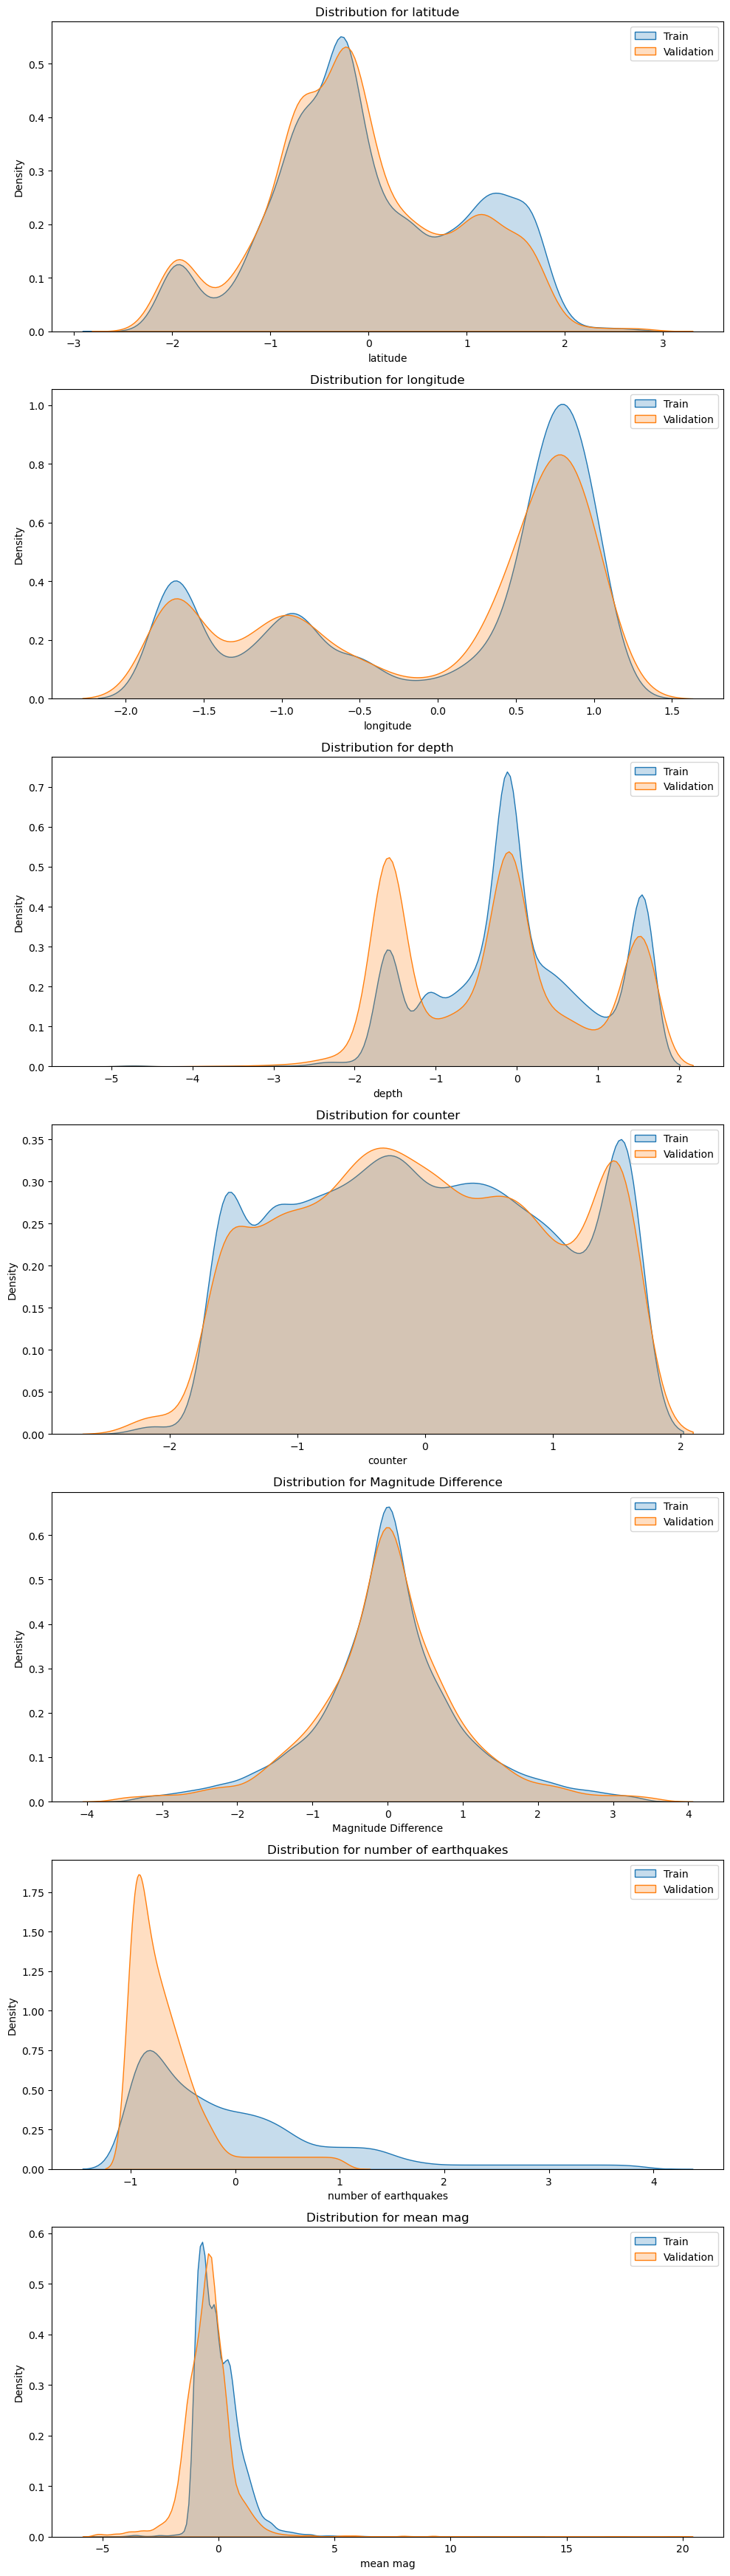

In [199]:
# Check the distribution of the features
fig, axs = plt.subplots(len(features_to_check), figsize=(10, 5 * len(features_to_check)))
for i, feature in enumerate(features_to_check):
    # Plot the density plot for each feature
    sns.kdeplot(train[feature], ax=axs[i], label='Train', fill=True)
    sns.kdeplot(val[feature], ax=axs[i], label='Validation', fill=True)
    axs[i].set_title(f'Distribution for {feature}')
    axs[i].legend()

plt.tight_layout()
plt.show()


c:\Anacoda\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Anacoda\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Anacoda\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Anacoda\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Anacoda\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Anacoda\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Anacoda\Lib\site-packages\statsmodels\tsa\s

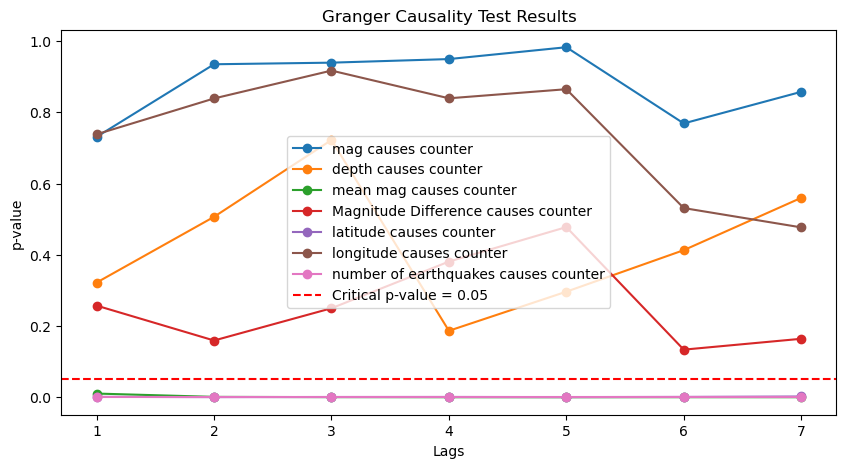

In [200]:
from statsmodels.tsa.stattools import grangercausalitytests

max_lags = 7 
test = 'ssr_chi2test' 

# Considering features to test against the target 'counter'
features_to_test = ['mag', 'depth', 'mean mag', 'Magnitude Difference', 'latitude', 'longitude', 'number of earthquakes']
granger_test_results = {}

for feature in features_to_test:
    test_result = grangercausalitytests(train[[feature, 'counter']], max_lags, verbose=False)
    granger_test_results[feature] = [test_result[lag + 1][0][test][1] for lag in range(max_lags)]

# Visualize the results
plt.figure(figsize=(10, 5))
for feature, p_values in granger_test_results.items():
    plt.plot(range(1, max_lags + 1), p_values, marker='o', label=f'{feature} causes counter')

plt.title('Granger Causality Test Results')
plt.xlabel('Lags')
plt.ylabel('p-value')
plt.axhline(y=0.05, linestyle='--', color='red', label='Critical p-value = 0.05')
plt.legend()
plt.show()


Visualizing Time Series with Smoothing and Reporting Statistical Properties

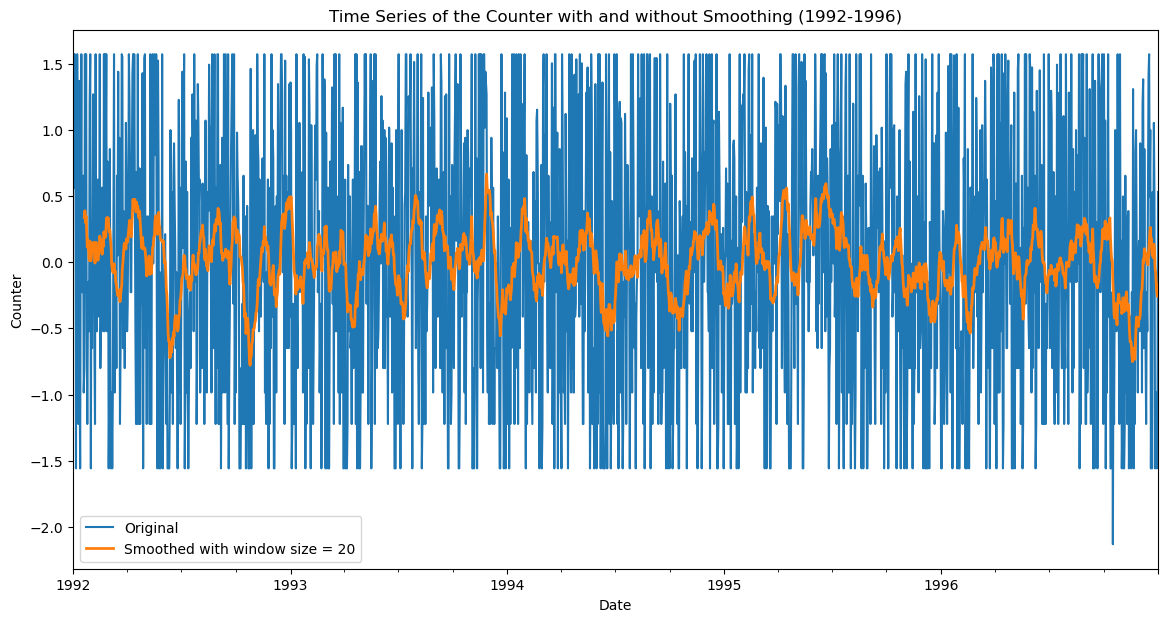

In [201]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensuring that 'date' is a datetime type 
train['date'] = pd.to_datetime(train['date'])

# Set 'date' as the index. We will revert this later
train.set_index('date', inplace=True)

# Filter the data to include only the years between 1992-1996
filtered_train = train['1992':'1996']

rolling_window_size = 20
# Plotting with 'date' as the x-axis
filtered_train['counter'].plot(figsize=(14, 7), label='Original')
filtered_train['counter'].rolling(window=rolling_window_size).mean().plot(label=f'Smoothed with window size = {rolling_window_size}', linewidth=2)

plt.title('Time Series of the Counter with and without Smoothing (1992-1996)')
plt.xlabel('Date')
plt.ylabel('Counter')
plt.legend()
plt.savefig("Time Series Visualization of Target Feature - 5 Years.pdf")

plt.show()

# Reset the index of the original DataFrame if necessary
train = train.reset_index()


C:\Users\Harrys\AppData\Local\Temp\ipykernel_828\4199578929.py:11: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  filtered_train = train['1996']


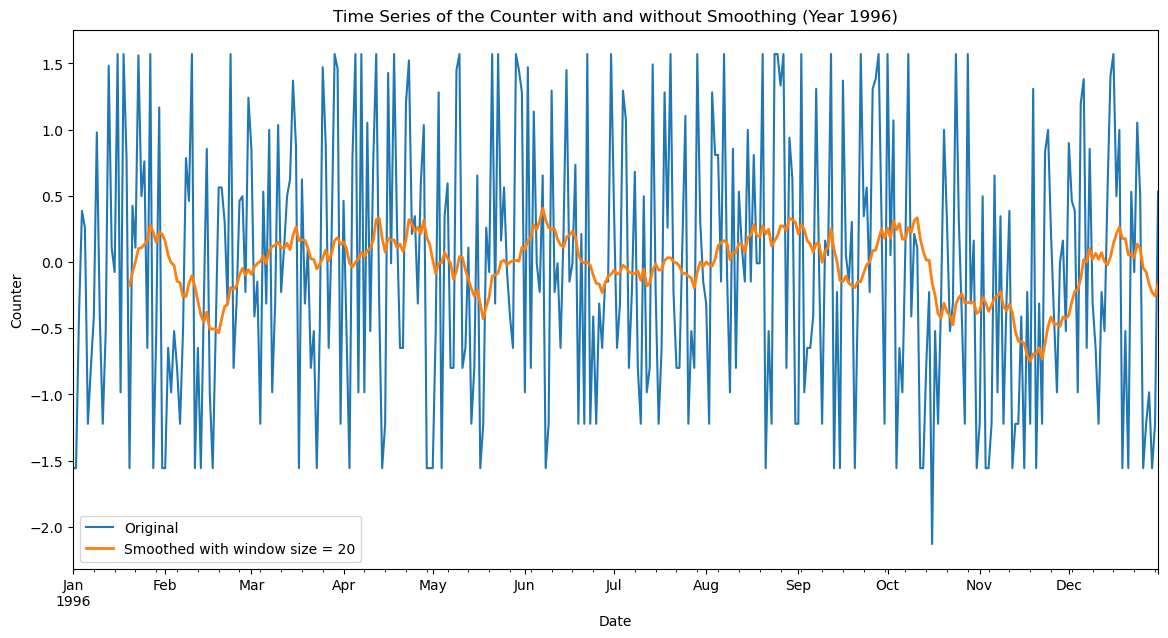

In [202]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensuring that 'date' is a datetime type 
train['date'] = pd.to_datetime(train['date'])

# Set 'date' as the index. We will revert this later
train.set_index('date', inplace=True)

# Filter the data to include only the year 1996
filtered_train = train['1996']

rolling_window_size = 20
# Plotting with 'date' as the x-axis
filtered_train['counter'].plot(figsize=(14, 7), label='Original')
filtered_train['counter'].rolling(window=rolling_window_size).mean().plot(label=f'Smoothed with window size = {rolling_window_size}', linewidth=2)

plt.title('Time Series of the Counter with and without Smoothing (Year 1996)')
plt.xlabel('Date')
plt.ylabel('Counter')
plt.legend()
plt.savefig("Time Series Visualization of Target Feature - Year 1996.pdf")

plt.show()

# Reset the index of the original DataFrame if necessary
train = train.reset_index()

Testing Seasonality

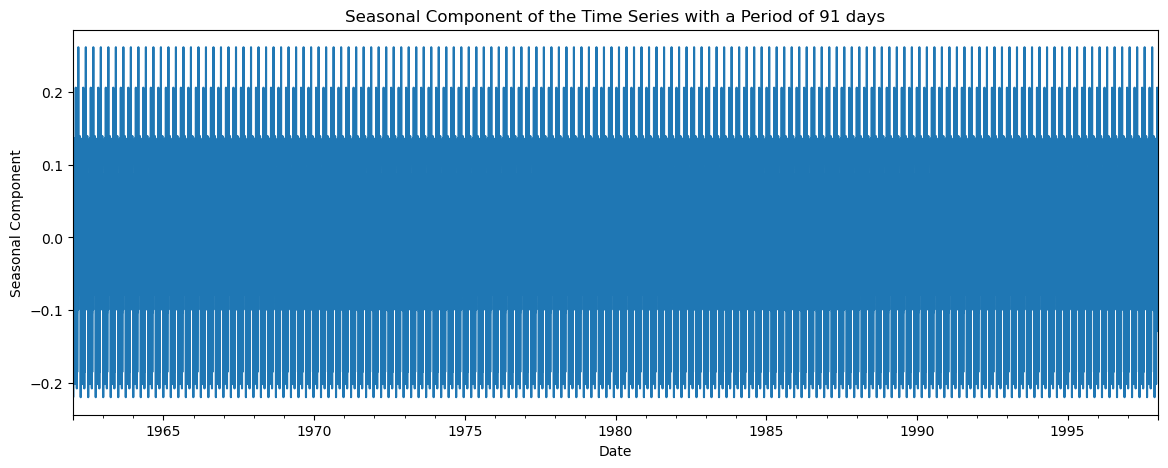

'\nfor period=365\nInsights:\nThe seasonality pattern suggests that the number of earthquakes recorded has a predictable fluctuation at regular intervals throughout the year.\nThis consistent pattern could be related to natural phenomena that follow a seasonal cycle, which could be leveraged in forecasting models.\n'

In [203]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Converting 'date' to datetime
train['date'] = pd.to_datetime(train['date'])

# Set 'date' as the index. We will revert this later
train.set_index('date', inplace=True)

# Performing seasonal decomposition
result = seasonal_decompose(train['counter'], model='additive', period=91) 

# Plotting the seasonal component with dates on the x-axis
result.seasonal.plot(figsize=(14, 5))
plt.title('Seasonal Component of the Time Series with a Period of 91 days')
plt.xlabel('Date') 
plt.ylabel('Seasonal Component')
plt.savefig("Seasonal Component of the Time Series with a Period of 91 days.pdf")
plt.show()

train = train.reset_index().rename(columns={"index":"date"})	


"""
for period=365
Insights:
The seasonality pattern suggests that the number of earthquakes recorded has a predictable fluctuation at regular intervals throughout the year.
This consistent pattern could be related to natural phenomena that follow a seasonal cycle, which could be leveraged in forecasting models.
"""

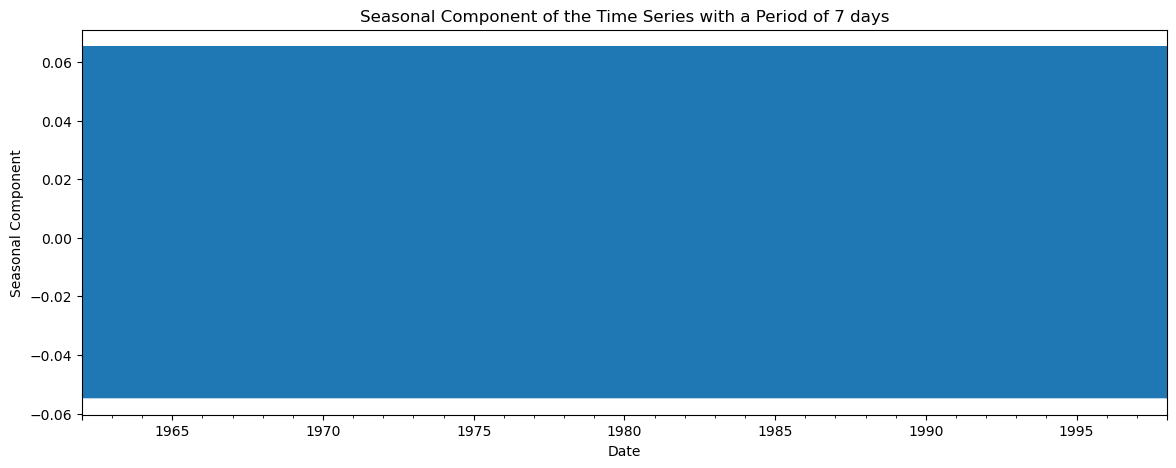

In [204]:
# 'date' to datetime 
train['date'] = pd.to_datetime(train['date'])

# Set 'date' as index
train.set_index('date', inplace=True)

# Perform seasonal decomposition
result = seasonal_decompose(train['counter'], model='additive', period=7) 

# Plot the seasonal component with dates on the x-axis
result.seasonal.plot(figsize=(14, 5))
plt.title('Seasonal Component of the Time Series with a Period of 7 days')
plt.xlabel('Date')
plt.ylabel('Seasonal Component')
plt.savefig("Seasonal Component of the Time Series with a Period of 7 days.pdf")
plt.show()

train = train.reset_index().rename(columns={"index":"date"})	

autocorrelation

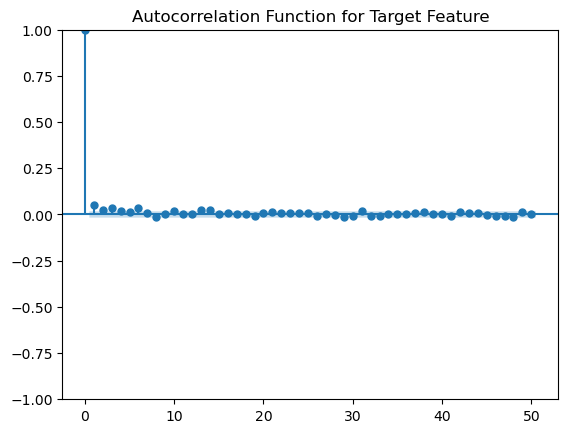

In [205]:
from statsmodels.graphics.tsaplots import plot_acf

# Plotting the Autocorrelation Function for 'counter'
plot_acf(train['counter'], lags=50)  
plt.title('Autocorrelation Function for Target Feature')
plt.savefig("Autocorrelation Function for Target Feature.pdf")
plt.show()


c:\Anacoda\Lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Statistics=0.948, p=0.000
Sample does not look Gaussian (reject H0)


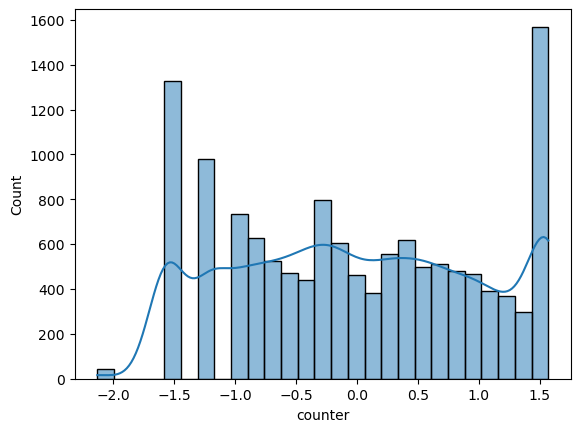

In [206]:
import seaborn as sns
from scipy.stats import shapiro

# Visualizing the distribution
sns.histplot(train['counter'], kde=True)

# Performing a test for normality
stat, p = shapiro(train['counter'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# Interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')


In [207]:
from scipy.stats import shapiro

# Test for normality
stat, p = shapiro(train['counter'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# Interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')


Statistics=0.948, p=0.000
Sample does not look Gaussian (reject H0)


In [208]:
train = train.drop(columns=["date"])
val = val.drop(columns=["date"])

# Final check that everything is okay
print(train.head(10))
print("###########")
print(val.head(10))
print("###########")
print(f"train shape: {train.shape}")
print(f"test shape: {val.shape}")
print("############")
print(train.dtypes)
print(val.dtypes)


   latitude  longitude     depth       mag                 countries  \
0  1.648084   1.065922 -0.469894  0.061066  United States of America   
1 -0.989956  -0.842723 -0.748872  1.206237                 Argentina   
2  0.367234   0.637976 -0.198668  0.882795               Philippines   
3  1.037691   0.735556  0.410154  0.832517                     Japan   
4 -0.579297  -1.709764  0.532321  0.907882                    France   
5 -0.588342  -1.669325 -0.469894  0.061066                     Samoa   
6 -0.863084  -1.706893  0.644033  0.191949                     Tonga   
7 -0.039421   0.663130 -1.593518 -0.150340                 Indonesia   
8  1.339107   0.812410  0.384287  0.476600                     Japan   
9 -1.055236  -1.704763 -0.748872 -0.662565               New Zealand   

       PlateName      year     month       day  day_of_week  day_of_week_sin  \
0  North America -1.684627 -1.601451 -1.673805    -1.499743         0.000000   
1  South America -1.684627 -1.601451 -1.560170 

In [209]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

def fit_encoder(*dataframes):
    # Combining the 'countries' and 'PlateName' columns from all dataframes for fitting
    combined_cats = pd.concat([df[['countries', 'PlateName']] for df in dataframes], ignore_index=True)
    encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
    encoder.fit(combined_cats)
    return encoder

def encode_data(encoder, df):
    cats = df[['countries', 'PlateName']]
    encoded_cats = encoder.transform(cats)
    encoded_df = pd.DataFrame(encoded_cats, columns=encoder.get_feature_names_out(), index=df.index)
    df.drop(['countries', 'PlateName'], axis=1, inplace=True)
    return pd.concat([df, encoded_df], axis=1)

# # Fit encoder on all categories seen across datasets
encoder = fit_encoder(train, val, test_df_sorted)  

train = encode_data(encoder, train)
val= encode_data(encoder, val)

c:\Anacoda\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [210]:
train.to_csv("train_knn_ready_for_model.csv")
val.to_csv("val_knn_ready_for_model.csv")

In [211]:
""" def fit_encoder(*dataframes):
    # Combining the 'countries' and 'PlateName' columns from all dataframes for calculating frequencies
    combined_cats = pd.concat([df[['countries', 'PlateName']] for df in dataframes], ignore_index=True)
    freq_encoder = {}
    for column in combined_cats.columns:
        # Compute frequency of each category
        freq_encoder[column] = combined_cats[column].value_counts(normalize=True)
    return freq_encoder

def encode_data(freq_encoder, df):
    # Apply frequency encoding
    for column in ['countries', 'PlateName']:
        df[column + '_freq'] = df[column].map(freq_encoder[column])
        df[column + '_freq'].fillna(0, inplace=True)  # Handle any unseen categories
    df.drop(['countries', 'PlateName'], axis=1, inplace=True)
    return df

# Fit encoder on all categories seen across datasets
encoder = fit_encoder(train, val, test_df_sorted)

# Encode data using frequency encoder
train = encode_data(encoder, train)
val = encode_data(encoder, val) """

" def fit_encoder(*dataframes):\n    # Combining the 'countries' and 'PlateName' columns from all dataframes for calculating frequencies\n    combined_cats = pd.concat([df[['countries', 'PlateName']] for df in dataframes], ignore_index=True)\n    freq_encoder = {}\n    for column in combined_cats.columns:\n        # Compute frequency of each category\n        freq_encoder[column] = combined_cats[column].value_counts(normalize=True)\n    return freq_encoder\n\ndef encode_data(freq_encoder, df):\n    # Apply frequency encoding\n    for column in ['countries', 'PlateName']:\n        df[column + '_freq'] = df[column].map(freq_encoder[column])\n        df[column + '_freq'].fillna(0, inplace=True)  # Handle any unseen categories\n    df.drop(['countries', 'PlateName'], axis=1, inplace=True)\n    return df\n\n# Fit encoder on all categories seen across datasets\nencoder = fit_encoder(train, val, test_df_sorted)\n\n# Encode data using frequency encoder\ntrain = encode_data(encoder, train)\nval

## Functions for plotting the results of the model

In [212]:
## LOSS-ACC GRAPHS for training and evaluation
def loss_acc_graphs(history):

    #Training/Validation Accuracy
    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['mae'])
    plt.plot(history.history['val_mae'])
    plt.title('mae')
    plt.ylabel('mae')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.show()


## Preparing the data for the LSTM model

In [213]:
# Define the function to create sequences
def create_sequences(X, y, time_steps):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps)])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)
# Time steps for LSTM
time_steps = 7

In [214]:
""" # Ensure all required features are selected
feature_columns = train.columns.tolist()  # This will include all features after preprocessing

# Create sequences for LSTM
X_train, y_train = create_sequences(train[feature_columns].values, train['counter'].values.flatten(), time_steps)
X_val, y_val = create_sequences(val[feature_columns].values, val['counter'].values.flatten(), time_steps) """

" # Ensure all required features are selected\nfeature_columns = train.columns.tolist()  # This will include all features after preprocessing\n\n# Create sequences for LSTM\nX_train, y_train = create_sequences(train[feature_columns].values, train['counter'].values.flatten(), time_steps)\nX_val, y_val = create_sequences(val[feature_columns].values, val['counter'].values.flatten(), time_steps) "

In [215]:
# Ensure 'counter' is excluded from feature columns
feature_columns = [col for col in train.columns if col != 'counter']

# Print to verify feature columns
print("Feature columns:", feature_columns)
print("Number of features in feature_columns:", len(feature_columns))

# Recreate sequences for LSTM with correct features
X_train, y_train = create_sequences(train[feature_columns].values, train['counter'].values.flatten(), time_steps)
X_val, y_val = create_sequences(val[feature_columns].values, val['counter'].values.flatten(), time_steps)

Feature columns: ['latitude', 'longitude', 'depth', 'mag', 'year', 'month', 'day', 'day_of_week', 'day_of_week_sin', 'day_of_week_cos', 'month_sin', 'month_cos', 'mean mag', 'Magnitude Difference', 'number of earthquakes', 'countries_Afghanistan', 'countries_Antarctica', 'countries_Argentina', 'countries_Australia', 'countries_Brazil', 'countries_Canada', 'countries_Chile', 'countries_China', 'countries_Colombia', 'countries_Ecuador', 'countries_Ethiopia', 'countries_Fiji', 'countries_France', 'countries_Greece', 'countries_Guatemala', 'countries_India', 'countries_Indonesia', 'countries_Iran', 'countries_Italy', 'countries_Japan', 'countries_Kiribati', 'countries_Mexico', 'countries_Myanmar', 'countries_Nepal', 'countries_New Zealand', 'countries_Nicaragua', 'countries_Norway', 'countries_Pakistan', 'countries_Panama', 'countries_Papua New Guinea', 'countries_Peru', 'countries_Philippines', 'countries_Portugal', 'countries_Russia', 'countries_Samoa', 'countries_Solomon Islands', 'coun

In [216]:
print("Training data shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Validation data shape:", X_val.shape)
print("Validation labels shape:", y_val.shape)

Training data shape: (13142, 7, 112)
Training labels shape: (13142,)
Validation data shape: (4741, 7, 112)
Validation labels shape: (4741,)


## Model

In [217]:
""" def baseline_model(input_shape, l2_reg=0.001, learning_rate=0.00001, delta=20):
    regularizer = regularizers.l2(l2_reg)
    optimizer = Adam(learning_rate=learning_rate)

    # Custom Huber loss with the delta
    loss = Huber(delta=delta)

    model = Sequential([
        LSTM(32, input_shape=input_shape, return_sequences=False, kernel_regularizer=regularizer),
        Dense(1, activation="linear")
    ])
    model.compile(optimizer=optimizer, loss=loss, metrics=["mae"])
    return model  """

' def baseline_model(input_shape, l2_reg=0.001, learning_rate=0.00001, delta=20):\n    regularizer = regularizers.l2(l2_reg)\n    optimizer = Adam(learning_rate=learning_rate)\n\n    # Custom Huber loss with the delta\n    loss = Huber(delta=delta)\n\n    model = Sequential([\n        LSTM(32, input_shape=input_shape, return_sequences=False, kernel_regularizer=regularizer),\n        Dense(1, activation="linear")\n    ])\n    model.compile(optimizer=optimizer, loss=loss, metrics=["mae"])\n    return model  '

In [218]:
""" #LSTM model
model = baseline_model((time_steps, X_train.shape[2]))
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50) """

' #LSTM model\nmodel = baseline_model((time_steps, X_train.shape[2]))\nhistory = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50) '

## heper paramter tuning

In [219]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import Huber
from tensorflow.keras import regularizers
from keras_tuner import RandomSearch, HyperParameters
from tensorflow.keras.callbacks import EarlyStopping
from keras_tuner import HyperModel
import datetime
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam
from keras.losses import Huber
from keras.regularizers import l2
from keras.callbacks import EarlyStopping, TensorBoard
from keras_self_attention import SeqSelfAttention
from tensorboard.plugins.hparams import api as hp
import datetime
from keras_tuner import HyperModel, RandomSearch
from tensorflow import keras
from tensorflow.keras import layers
from keras_tuner import HyperModel, HyperParameters, RandomSearch
from tensorflow.keras.callbacks import Callback
import os
import shutil


In [220]:
# Define hyperparameters
HP_UNITS = hp.HParam('units', hp.Discrete([16, 32, 64]))
HP_L2_REG = hp.HParam('l2_reg', hp.Discrete([0.01, 0.001, 0.0001]))
HP_LEARNING_RATE = hp.HParam('learning_rate', hp.Discrete([0.0001, 0.001, 0.01]))
HP_DELTA = hp.HParam('delta', hp.Discrete([5, 10, 20, 30]))
HP_BATCH_SIZE = hp.HParam('batch_size', hp.Discrete([16, 32, 64]))

METRIC_MAE = 'mae'
# Clean up any previous logs
log_dir = 'logs/hparam_tuning_baseline_correct'
if os.path.exists(log_dir):
    shutil.rmtree(log_dir)
os.makedirs(log_dir, exist_ok=True)

with tf.summary.create_file_writer('logs/hparam_tuning_baseline_correct').as_default():
    hp.hparams_config(
        hparams=[HP_UNITS, HP_L2_REG, HP_LEARNING_RATE, HP_DELTA, HP_BATCH_SIZE],
        metrics=[hp.Metric(METRIC_MAE, display_name='Mean Absolute Error')],
    )

class TensorBoardHParams(Callback):
    def __init__(self, log_dir, hparams):
        super(TensorBoardHParams, self).__init__()
        self.log_dir = log_dir
        self.hparams = hparams
        self.writer = tf.summary.create_file_writer(self.log_dir)

    def on_train_end(self, logs=None):
        logs = logs or {}
        with self.writer.as_default():
            hp.hparams(self.hparams)  # log the hyperparameters
            for metric, value in logs.items():
                tf.summary.scalar(metric, value, step=1)
        self.writer.flush()


class MyHyperModel(HyperModel):
    def __init__(self, input_shape):
        self.input_shape = input_shape

    def build(self, hp):

        # Build the model
        model = Sequential([
            LSTM(units=hp.Choice('units', values=[16, 32, 64]),
                 input_shape=self.input_shape,
                 return_sequences=False,
                 kernel_regularizer=l2(hp.Choice('l2_reg', values=[0.0001, 0.001, 0.01]))),
            Dense(1, activation="linear")
        ])
        # Ensure delta is explicitly float
        delta_value = float(hp.Choice('delta', values=[5, 10, 20, 30]))
        model.compile(
            optimizer=Adam(learning_rate=hp.Choice('learning_rate', values=[0.0001, 0.001, 0.01])),
            loss=Huber(delta=delta_value),
            metrics=["mae"]
        )
        return model

    def fit(self, hp, model, x, y, validation_data, **kwargs):

        batch_size = hp.Choice('batch_size', values=[16, 32, 64])
        log_dir = "./logs/hparam_tuning_baseline_correct/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
        callbacks = [
            EarlyStopping(monitor='val_mae', patience=5, restore_best_weights=True),
            TensorBoard(log_dir=log_dir),
            TensorBoardHParams(log_dir, {
                'units': hp.get('units'),
                'l2_reg': hp.get('l2_reg'),
                'learning_rate': hp.get('learning_rate'),
                'delta': hp.get('delta'),
                'batch_size': batch_size 
            })
        ]
        history = model.fit(
            x, y,
            validation_data=validation_data,
            batch_size=batch_size,
            epochs=40,
            callbacks=callbacks
        )
        return history


# Initialize the hypermodel with the input shape of data
hypermodel = MyHyperModel(input_shape=(time_steps, X_train.shape[2]))

# Configure and execute the random search
tuner = RandomSearch(
    hypermodel,
    objective='val_mae',
    max_trials=30,
    executions_per_trial=1,
    directory='hyperparam_tuning_baseline_LSTM_correct',
    project_name='LSTM_tuning_baseline_LSTM_correct'
)

"""
    directory='hyperparam_tuning_baseline_LSTM',
    project_name='LSTM_tuning_baseline_LSTM'
)
"""

tuner.search(X_train, y_train, validation_data=(X_val, y_val))

# Extract the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Rebuild the model with the best hyperparameters
best_model = hypermodel.build(best_hps)
best_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=40, callbacks=[EarlyStopping(monitor='val_mae', patience=6, restore_best_weights=True)])

# Predict and evaluate the model
predictions_scaled = best_model.predict(X_val)
predictions_inverse_scaled = target_scaler.inverse_transform(predictions_scaled)
predictions_original = np.expm1(predictions_inverse_scaled).flatten()
y_val_inverse_scaled = target_scaler.inverse_transform(y_val.reshape(-1, 1))
y_val_original_values = np.expm1(y_val_inverse_scaled).flatten()
mae_original = mean_absolute_error(y_val_original_values, predictions_original)
print(f"Original Mean Absolute Error: {mae_original}")


Reloading Tuner from hyperparam_tuning_baseline_LSTM_correct\LSTM_tuning_baseline_LSTM_correct\tuner0.json


c:\Anacoda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/40
411/411 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 1.1989 - mae: 0.8633 - val_loss: 0.9522 - val_mae: 0.8600
Epoch 2/40
411/411 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8823 - mae: 0.8582 - val_loss: 0.7480 - val_mae: 0.8568
Epoch 3/40
411/411 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.7069 - mae: 0.8560 - val_loss: 0.6360 - val_mae: 0.8549
Epoch 4/40
411/411 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6117 - mae: 0.8547 - val_loss: 0.5769 - val_mae: 0.8538
Epoch 5/40
411/411 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5618 - mae: 0.8538 - val_loss: 0.5467 - val_mae: 0.8532
Epoch 6/40
411/411 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.5365 - mae: 0.8532 - val_loss: 0.5315 - val_mae: 0.8529
Epoch 7/40
411/411 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.5236 - mae: 0.8528 - val_loss: 0.5235 - val_mae: 0.8527
Epoch 8/40
411/411 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.5166 - mae: 0.8524 - val_loss: 0.5188 - val_mae: 0.8527
Epoch 9/40
411/411 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - lo

In [221]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow import keras


tensorboard_callback = keras.callbacks.TensorBoard(log_dir="./logs")

In [222]:
%reload_ext tensorboard

In [223]:
# After tuning, visualize the tuning process using:
%tensorboard --logdir logs/hparam_tuning_baseline

# http://localhost:6008

Reusing TensorBoard on port 6008 (pid 13168), started 4 days, 2:17:01 ago. (Use '!kill 13168' to kill it.)

In [224]:
# Extract the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Print the best hyperparameters
print("Best hyperparameters:")
print(f"Units: {best_hps.get('units')}")
print(f"L2 Regularization: {best_hps.get('l2_reg')}")
print(f"Learning Rate: {best_hps.get('learning_rate')}")
print(f"Huber Delta: {best_hps.get('delta')}")
print(f"Batch Size: {best_hps.get('batch_size')}")

Best hyperparameters:
Units: 16
L2 Regularization: 0.01
Learning Rate: 0.0001
Huber Delta: 20
Batch Size: 32


In [225]:
import os
import json
import pandas as pd

# Path to the directory where TensorBoard logs are stored
log_dir = 'hyperparam_tuning_baseline_LSTM_correct'

# Function to extract data from the JSON files
def extract_data_from_json(log_dir):
    data = []
    for root, dirs, files in os.walk(log_dir):
        for file in files:
            if file == 'trial.json':
                trial_file = os.path.join(root, file)
                with open(trial_file, 'r') as f:
                    trial_data = json.load(f)
                    hyperparameters = trial_data['hyperparameters']['values']
                    metrics = trial_data['metrics']['metrics']
                    # Extract the last value of the validation mean absolute error
                    val_mae = metrics['val_mae']['observations'][-1]['value'][0]
                    hyperparameters['val_mae'] = val_mae
                    data.append(hyperparameters)
    df = pd.DataFrame(data)
    return df

# Extract data
df = extract_data_from_json(log_dir)
print(df.head())


   units  l2_reg  delta  learning_rate  batch_size   val_mae
0     64  0.0100     10         0.0010          16  0.852517
1     32  0.0010     20         0.0010          64  0.853421
2     32  0.0100      5         0.0010          16  0.852369
3     16  0.0100     20         0.0001          32  0.851026
4     32  0.0001     30         0.0001          64  0.852893


In [226]:
#calcualte it with MATPLOTLIB

In [227]:
# Path to the directory where TensorBoard logs are stored
log_dir = 'hyperparam_tuning_baseline_LSTM_correct'

# Function to extract data from the JSON files
def extract_data_from_json(log_dir):
    data = []
    for root, dirs, files in os.walk(log_dir):
        for file in files:
            if file == 'trial.json':
                trial_file = os.path.join(root, file)
                with open(trial_file, 'r') as f:
                    trial_data = json.load(f)
                    hyperparameters = trial_data['hyperparameters']['values']
                    metrics = trial_data['metrics']['metrics']
                    # Extract the last value of the validation mean absolute error
                    val_mae = metrics['val_mae']['observations'][-1]['value'][0]
                    hyperparameters['val_mae'] = val_mae
                    data.append(hyperparameters)
    df = pd.DataFrame(data)
    return df

# Extract data
df = extract_data_from_json(log_dir)
print(df.head())


   units  l2_reg  delta  learning_rate  batch_size   val_mae
0     64  0.0100     10         0.0010          16  0.852517
1     32  0.0010     20         0.0010          64  0.853421
2     32  0.0100      5         0.0010          16  0.852369
3     16  0.0100     20         0.0001          32  0.851026
4     32  0.0001     30         0.0001          64  0.852893


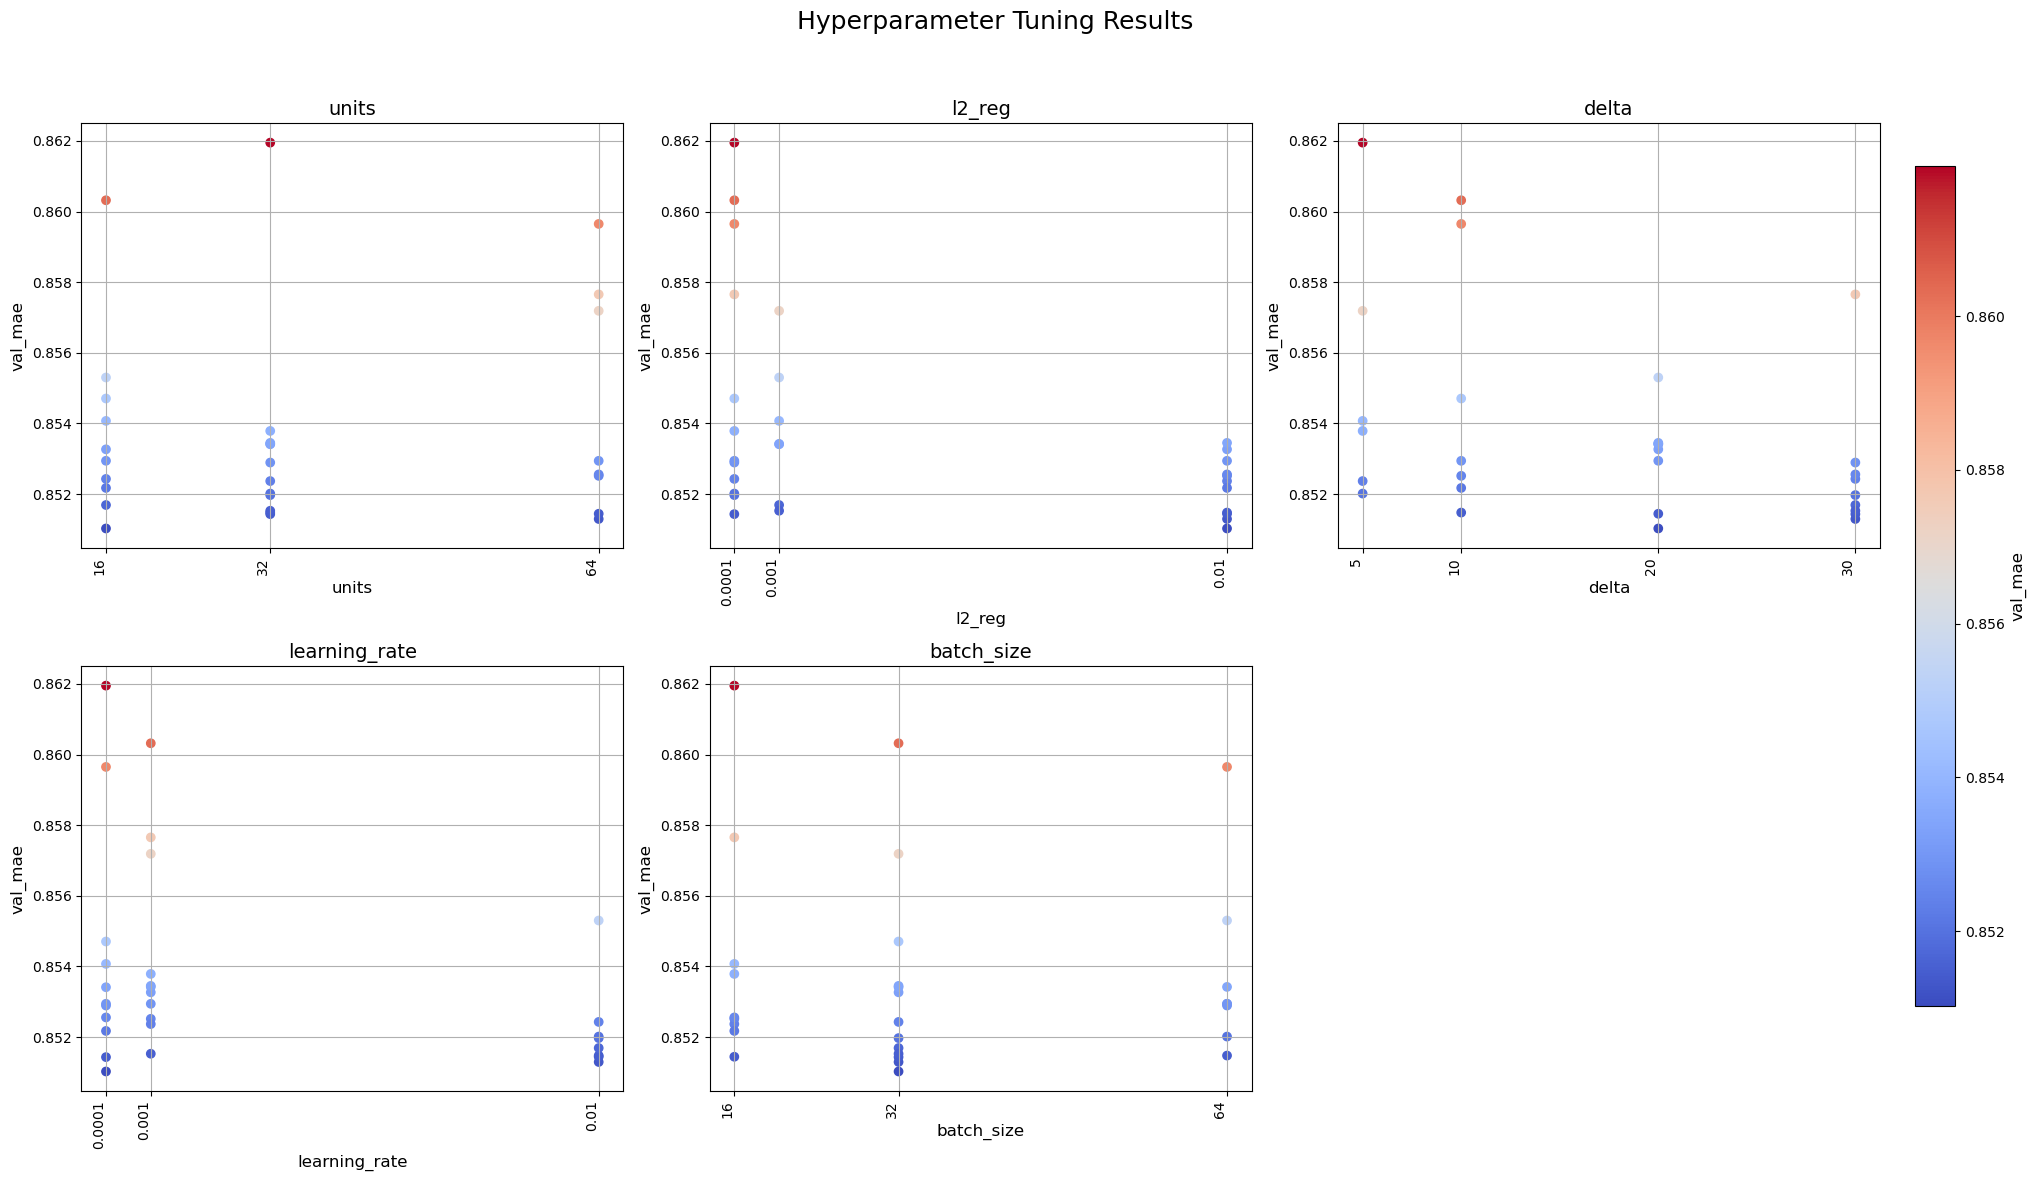

In [228]:
# Prepare the DataFrame for plotting
df_hyperparams = df.dropna(axis=1, how='all')

# List of hyperparameters
hyperparams = [col for col in df_hyperparams.columns if col != 'val_mae']

# Hyperparameter values for setting tickvals and ticktext
hyperparam_values = {
    'units': [16, 32, 64],
    'l2_reg': [0.01, 0.001, 0.0001],
    'learning_rate': [0.0001, 0.001, 0.01],
    'delta': [5, 10, 20, 30],
    'batch_size': [16, 32, 64]
}


# Calculate the number of rows and columns needed
num_plots = len(hyperparams)
cols = 3
rows = (num_plots // cols) + (num_plots % cols > 0)

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(20, 12))
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Define the colormap
cmap = plt.get_cmap("coolwarm")
norm = plt.Normalize(vmin=df_hyperparams['val_mae'].min(), vmax=df_hyperparams['val_mae'].max())

for i, param in enumerate(hyperparams):
    ax = axes[i]
    sc = ax.scatter(df_hyperparams[param], df_hyperparams['val_mae'], c=df_hyperparams['val_mae'], cmap=cmap, norm=norm, marker='o')
    ax.set_title(param, fontsize=14)
    ax.set_xlabel(param, fontsize=12)
    ax.set_ylabel('val_mae', fontsize=12)
    ax.grid(True)
    # Set x-axis ticks
    if param in hyperparam_values:
        ax.set_xticks(hyperparam_values[param])
        ax.set_xticklabels([str(val) for val in hyperparam_values[param]], fontsize=10, rotation=90, ha='right')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
fig.suptitle('Hyperparameter Tuning Results', fontsize=18)
plt.tight_layout(rect=[0, 0, 0.95, 0.95])  # Adjust layout to make room for the title

# Add a color bar
cbar_ax = fig.add_axes([0.96, 0.15, 0.02, 0.7])
cbar = fig.colorbar(sc, cax=cbar_ax)
cbar.set_label('val_mae', fontsize=12)
cbar.ax.tick_params(labelsize=10)

# Save the figure as PDF
plt.savefig("Scatter_Plot_Matrix_Hyperparameter_Tuning.pdf")
plt.show()




In [229]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Prepare the DataFrame for plotting
# Ensure to only include the columns relevant to hyperparameters and metrics
df_hyperparams = df.dropna(axis=1, how='all')

# List of hyperparameters
hyperparams = [col for col in df_hyperparams.columns if col != 'val_mae']

# Calculate the number of rows and columns needed
num_plots = len(hyperparams) + 1
cols = 3
rows = (num_plots // cols) + (num_plots % cols > 0)

# Create subplots
fig = make_subplots(rows=rows, cols=cols, subplot_titles=hyperparams + ['val_mae'])

# Add scatter plots to subplots
for i, param in enumerate(hyperparams + ['val_mae']):
    row = i // cols + 1
    col = i % cols + 1
    fig.add_trace(
        go.Scatter(
            x=df_hyperparams[param],
            y=df_hyperparams['val_mae'],
            mode='markers',
            marker=dict(
                color=df_hyperparams['val_mae'],
                colorscale='Tealrose',
                showscale=(i == len(hyperparams))  # Only show color scale on the last plot
            )
        ),
        row=row,
        col=col
    )
    fig.update_xaxes(title_text=param, row=row, col=col)
    fig.update_yaxes(title_text="val_mae", row=row, col=col)

# Update layout
fig.update_layout(
    title="Scatter Plot Matrix",
    title_x=0.5,
    autosize=False,
    width=1500,
    height=800,
    font=dict(size=14),
    showlegend=False
)

plt.savefig("Scatter Plot Matrix - Hyper parameter tuning.pdf")
fig.show()

<Figure size 640x480 with 0 Axes>

In [230]:
# Rebuild the model with the best hyperparameters
best_model = hypermodel.build(best_hps)
history = best_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=40, callbacks=[EarlyStopping(monitor='val_mae', patience=5, restore_best_weights=True)])

c:\Anacoda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/40
411/411 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 1.2535 - mae: 0.8843 - val_loss: 0.9952 - val_mae: 0.8709
Epoch 2/40
411/411 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.9075 - mae: 0.8613 - val_loss: 0.7675 - val_mae: 0.8570
Epoch 3/40
411/411 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.7217 - mae: 0.8558 - val_loss: 0.6468 - val_mae: 0.8532
Epoch 4/40
411/411 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.6208 - mae: 0.8538 - val_loss: 0.5832 - val_mae: 0.8518
Epoch 5/40
411/411 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.5675 - mae: 0.8528 - val_loss: 0.5506 - val_mae: 0.8513
Epoch 6/40
411/411 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.5402 - mae: 0.8523 - val_loss: 0.5339 - val_mae: 0.8511
Epoch 7/40
411/411 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.5262 - mae: 0.8520 - val_loss: 0.5250 - val_mae: 0.8510
Epoch 8/40
411/411 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.5185 - mae: 0.8518 - val_loss: 0.5198 - val_mae: 0.8510
Epoch 9/40
411/411 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - lo

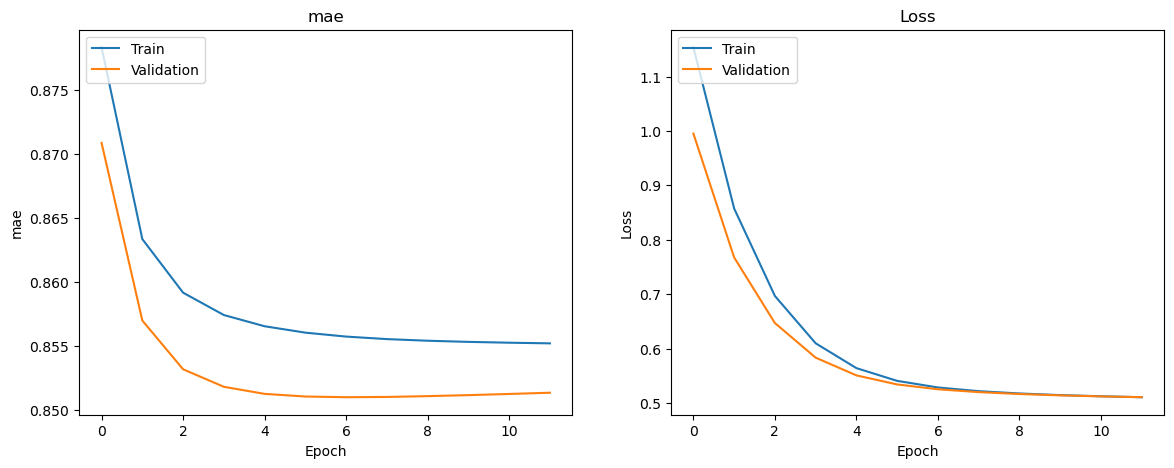

In [231]:
# Plotting the results
loss_acc_graphs(history)

Predictions on the original scale of days

In [232]:
# Make predictions on the validation set
predictions_scaled = best_model.predict(X_val)

# Inverse scale the predictions
predictions_inverse_scaled = target_scaler.inverse_transform(predictions_scaled)

# Inverse the log transform
predictions_original = np.expm1(predictions_inverse_scaled).flatten()

# For the validation set, we need to inverse scale and then inverse log transform as well
y_val_inverse_scaled = target_scaler.inverse_transform(y_val.reshape(-1, 1))
y_val_original_values = np.expm1(y_val_inverse_scaled).flatten()

# Evaluate the error using MAE on the original scale
mae_original = mean_absolute_error(y_val_original_values, predictions_original)
print(f"Original Mean Absolute Error: {mae_original}")

# Compare the first few predictions to the actual values
for pred, actual in zip(predictions_original[:15], y_val_original_values[:15]):
    print(f"Predicted: {pred}, Actual: {actual}")

149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Original Mean Absolute Error: 19.54557110895666
Predicted: 13.771944046020508, Actual: 54.000000000000014
Predicted: 14.213982582092285, Actual: 36.99999999999999
Predicted: 14.22097110748291, Actual: 84.30000000000015
Predicted: 15.475879669189453, Actual: 82.00000000000003
Predicted: 16.28085708618164, Actual: 3.0
Predicted: 15.436124801635742, Actual: 14.999999999999998
Predicted: 16.545150756835938, Actual: 5.0
Predicted: 15.684459686279297, Actual: 3.0
Predicted: 16.32318878173828, Actual: 12.999999999999996
Predicted: 14.935213088989258, Actual: 23.000000000000004
Predicted: 14.705607414245605, Actual: 2.000000000000001
Predicted: 15.342975616455078, Actual: 54.000000000000014
Predicted: 14.516031265258789, Actual: 5.999999999999998
Predicted: 13.658584594726562, Actual: 11.0
Predicted: 14.231712341308594, Actual: 14.0


## Error Analysis

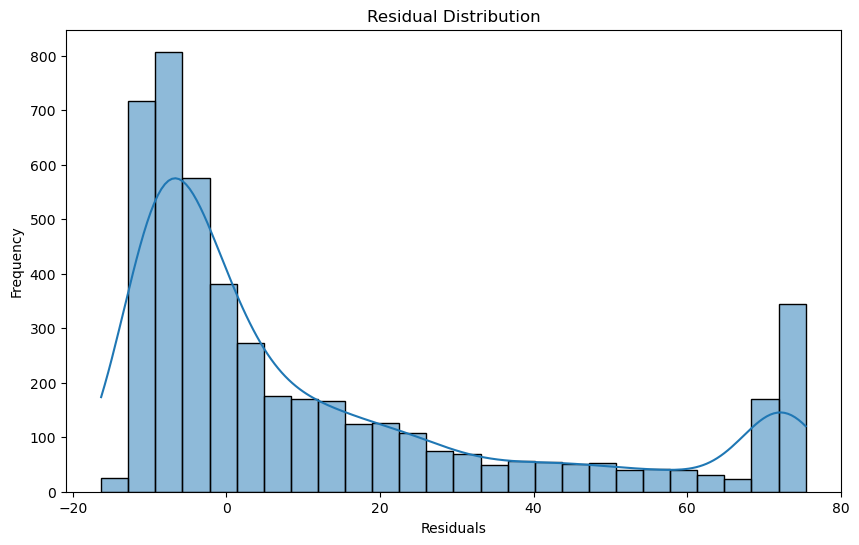

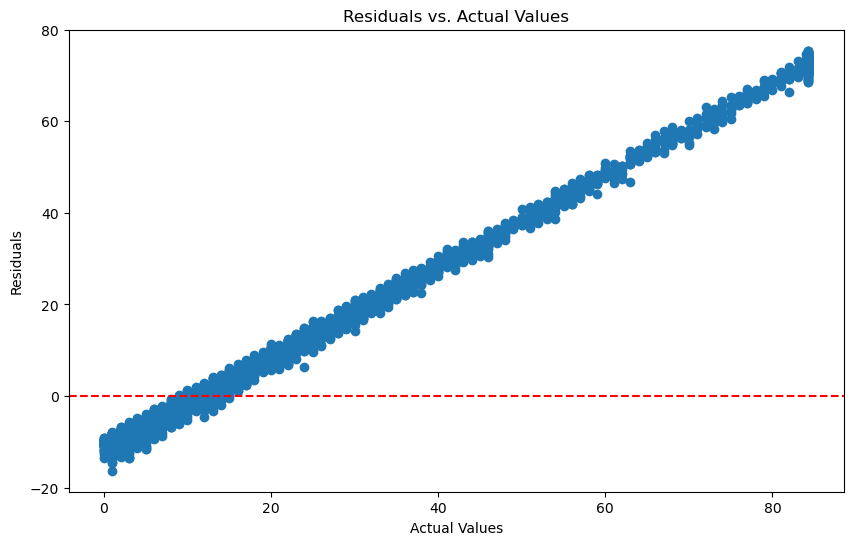

In [233]:
# Calculate residuals
residuals = y_val_original_values - predictions_original

# Plotting the residuals distribution
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Residual Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.savefig("residuals distribution - validation.pdf")
plt.show()

# Scatter plot of the residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_val_original_values, residuals)
plt.title('Residuals vs. Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at zero for reference
plt.savefig("scatter plot residuals - validation.pdf")
plt.show()




## Including the whole train dataframe and testing on the test set

In [234]:
# Check the number of missing values in each column of the DataFrame
missing_values_train = train_df_sorted.isnull().sum()
print(f"train missing values: {missing_values_train}")
print(f"train shape: {train_df_sorted.shape}")

missing_values_test = test_df_sorted.isnull().sum()
print(f"test missing values: {missing_values_test}")
print(f"test shape: {test_df_sorted.shape}") 

#train shape: (17897, 19)
#test shape: (4747, 19)

train missing values: latitude                 1226
longitude                1226
depth                    1227
mag                      1226
countries                1226
PlateName                1226
year                        0
month                       0
day                         0
day_of_week                 0
day_of_week_sin             0
day_of_week_cos             0
month_sin                   0
month_cos                   0
mean mag                 6544
Magnitude Difference     6544
number of earthquakes    6544
date                        0
counter                  1228
dtype: int64
train shape: (17897, 19)
test missing values: latitude                  200
longitude                 200
depth                     200
mag                       200
countries                 200
PlateName                 200
year                        0
month                       0
day                         0
day_of_week                 0
day_of_week_sin             0
day_of_week_cos    

remove the rows/earthquakes which are the latest recordings of a country

In [235]:
# Condition to check where 'counter' is NaN and 'latitude' is not NaN
condition = train_df_sorted['counter'].isna() & train_df_sorted['latitude'].notna()

# Count the rows meeting the condition
count_nan_counter = condition.sum()
print("Number of rows where 'counter' is NaN and 'latitude' is not NaN:", count_nan_counter)

# Optional: print rows meeting the condition
print(train_df_sorted[condition])

# Columns to fill with NaN
columns_to_fill_nan = ['latitude', 'longitude', 'depth', 'mag', 'countries', 'PlateName', 'mean mag', 'Magnitude Difference', 'number of earthquakes']

# Fill specified columns with NaN for rows meeting the condition
train_df_sorted.loc[condition, columns_to_fill_nan] = pd.NA

Number of rows where 'counter' is NaN and 'latitude' is not NaN: 2
       latitude  longitude  depth  mag countries PlateName  year  month  day  \
7736     -3.471    177.628   33.0  5.8  Kiribati   Pacific  1983      3    8   
15972    12.471     40.634   11.8  5.5  Ethiopia    Arabia  2005      9   24   

       day_of_week  day_of_week_sin  day_of_week_cos  month_sin  month_cos  \
7736             1         0.781831         0.623490   0.866025        0.5   
15972            5        -0.974928        -0.222521  -0.866025       -0.5   

       mean mag  Magnitude Difference  number of earthquakes       date  \
7736   5.646154                   0.0                   13.0 1983-03-08   
15972  5.890526                   0.0                   19.0 2005-09-24   

       counter  
7736       NaN  
15972      NaN  


In [236]:
# Check for missing values in all columns
missing_values = train_df_sorted.isnull().sum()
print("Missing train in each column of val set:")
print(missing_values)

# Check for missing values in all columns
missing_values = test_df_sorted.isnull().sum()
print("Missing val in each column of val set:")
print(missing_values)

"""
train_df_sorted: 6.8% missing data
test: 4% missing data
"""

Missing train in each column of val set:
latitude                 1228
longitude                1228
depth                    1229
mag                      1228
countries                1228
PlateName                1228
year                        0
month                       0
day                         0
day_of_week                 0
day_of_week_sin             0
day_of_week_cos             0
month_sin                   0
month_cos                   0
mean mag                 6546
Magnitude Difference     6546
number of earthquakes    6546
date                        0
counter                  1228
dtype: int64
Missing val in each column of val set:
latitude                  200
longitude                 200
depth                     200
mag                       200
countries                 200
PlateName                 200
year                        0
month                       0
day                         0
day_of_week                 0
day_of_week_sin             0
day_of_

'\ntrain_df_sorted: 6.8% missing data\ntest: 4% missing data\n'

feature transformation

In [237]:
numeric_features = [ 'depth', "mag", "year", "month", "day", 'day_of_week', 'day_of_week_sin', 'day_of_week_cos', 
                    'month_sin','month_cos', 'mean mag', 'Magnitude Difference', 'number of earthquakes']

# features for cap and log
features_for_cap_and_log = [ 'depth', 'mag']
for feature in features_for_cap_and_log:
    train_df_sorted[feature] = cap_and_log_transform(train_df_sorted, feature)
    test_df_sorted[feature] = cap_and_log_transform(test_df_sorted, feature)



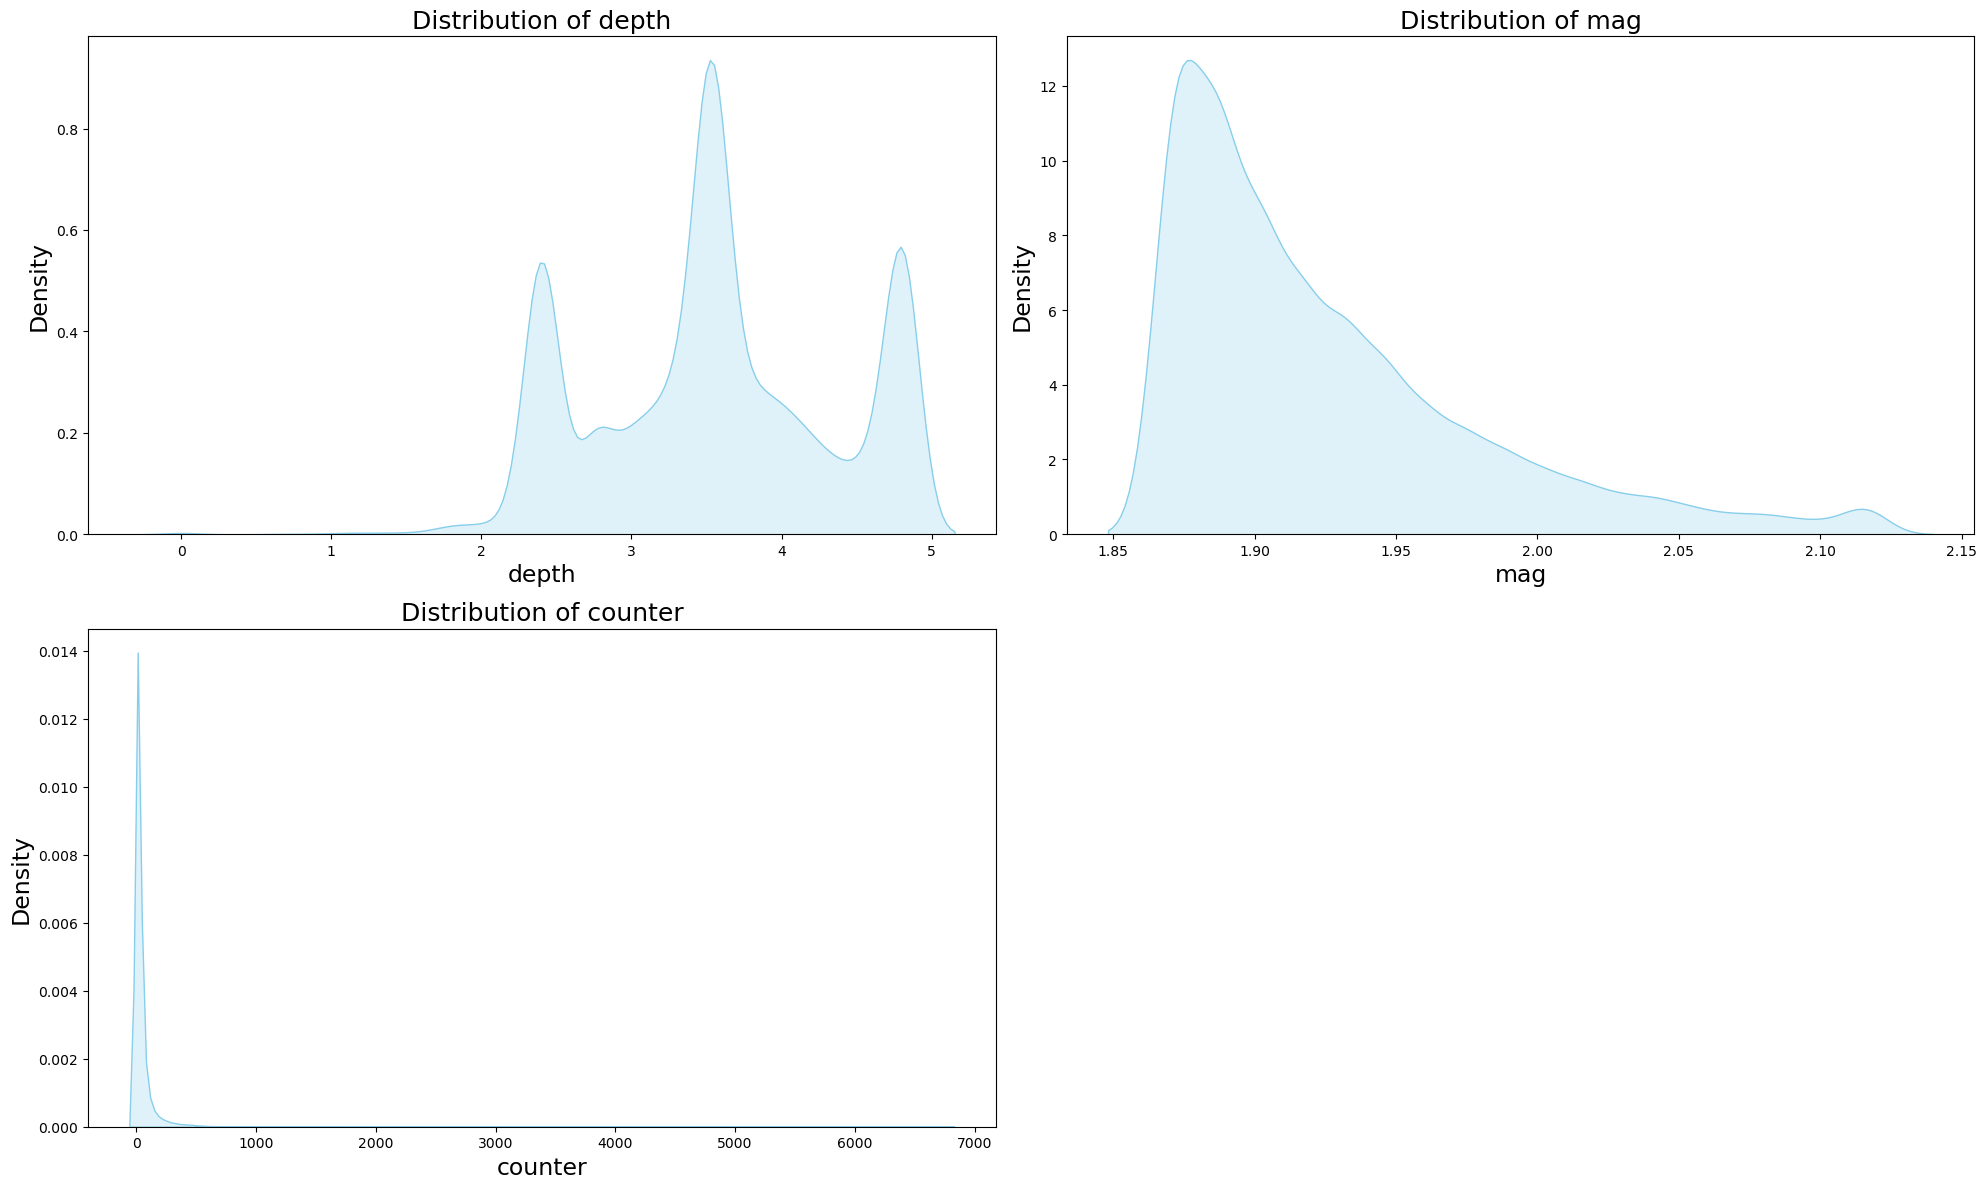

In [238]:
# Define features
numerical_features = ['depth', 'mag', 'counter']
categorical_features = ['countries', 'PlateName']

# Number of rows for the numerical plot layout (2 rows)
num_rows = 2
num_cols = (len(numerical_features) + 1) // num_rows  # This ensures even distribution across two rows

# Set up the matplotlib figure for numerical features
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 12))  # Adjust the size as needed
axes = axes.flatten()  # Flatten the array of axes for easier iteration

# Plot numerical features
for i, col in enumerate(numerical_features):
    sns.kdeplot(data=train_df_sorted[col], ax=axes[i], fill=True, color='skyblue')
    axes[i].set_title(f'Distribution of {col}', fontsize=18)
    axes[i].set_xlabel(col, fontsize=17)
    axes[i].set_ylabel('Density', fontsize=17)

# Hide any unused axes if the number of features is less than the total subplots
for j in range(i + 1, num_rows * num_cols):
    axes[j].set_visible(False)

# Adjust the layout
# Add a title to the whole figure
fig.suptitle('Distributions Before Feature Transformation', fontsize=20)

# Adjust the layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust rect to make room for the suptitle
plt.savefig("Distributions Before Feature Transformation.pdf")
plt.show()

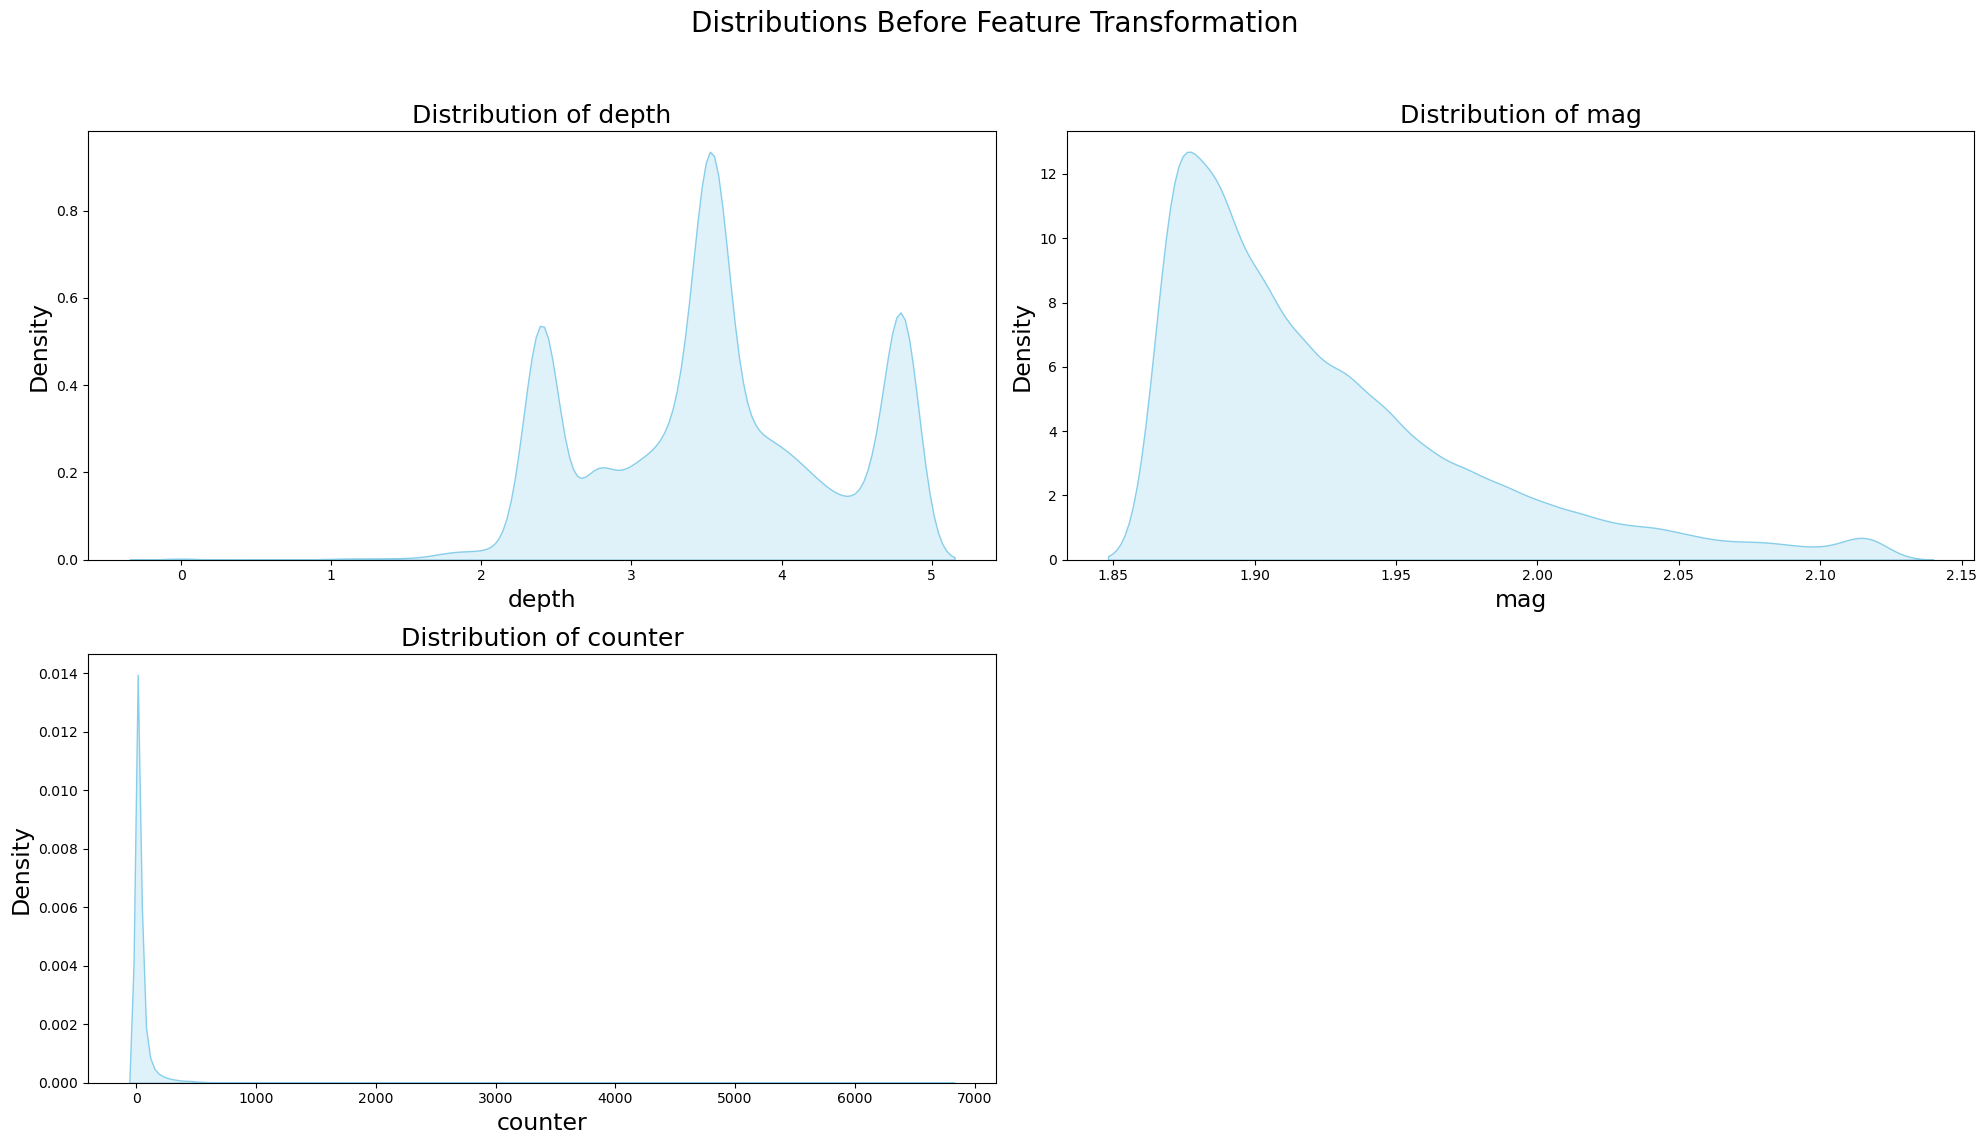

In [239]:
# Set up the matplotlib figure for numerical features
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 12))  # Adjust the size as needed
axes = axes.flatten()  # Flatten the array of axes for easier iteration

# Plot numerical features
for i, col in enumerate(numerical_features):
    sns.kdeplot(data=train_df_sorted[col], ax=axes[i], fill=True, color='skyblue')
    axes[i].set_title(f'Distribution of {col}', fontsize=18)
    axes[i].set_xlabel(col, fontsize=17)
    axes[i].set_ylabel('Density', fontsize=17)

# Hide any unused axes if the number of features is less than the total subplots
for j in range(i + 1, num_rows * num_cols):
    axes[j].set_visible(False)

# Adjust the layout
# Add a title to the whole figure
fig.suptitle('Distributions Before Feature Transformation', fontsize=20)

# Adjust the layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust rect to make room for the suptitle
plt.savefig("Distributions Before Feature Transformation.pdf")
plt.show()

In [240]:

#standardize the features
scaler = StandardScaler()

# After the imputation of missing data we will update the columns counter, mean mag, magnitude difference and number of earthquakes and then standardize them as well
# month_sin and month_cos... which already encode the cyclical nature in a bounded range (typically -1 to 1), additional scaling might not be necessary

# List of features to be standardized excluding latitude and longitude
numeric_features_to_standardize = ['depth', "mag", "year", "month", "day", 'day_of_week', ]


# Initialize a dictionary to hold the scalers for each feature
scalers = {feature: StandardScaler() for feature in numeric_features_to_standardize}

# Fit and transform each feature separately for the training data
for feature in numeric_features_to_standardize:
    train_df_sorted[feature] = scalers[feature].fit_transform(train_df_sorted[[feature]])

# Transform each feature separately for the validation data using the fitted scalers
for feature in numeric_features_to_standardize:
    test_df_sorted[feature] = scalers[feature].transform(test_df_sorted[[feature]])

imputation of latitude and longitude

In [241]:
# Separate out rows that have complete geospatial data
complete_cases = train_df_sorted.dropna(subset=['latitude', 'longitude'])

In [242]:
# Find the index of rows with missing geospatial data
missing_geo_index = train_df_sorted[train_df_sorted['latitude'].isna() | train_df_sorted['longitude'].isna()].index

# Randomly sample non-missing coordinates for latitude and longitude
random_sample = complete_cases.sample(len(missing_geo_index), random_state=42)
print(random_sample.head())
# Temporarily fill missing values
train_df_sorted.loc[missing_geo_index, 'latitude'] = random_sample["latitude"].values
train_df_sorted.loc[missing_geo_index, 'longitude'] = random_sample["longitude"].values

# Instantiate the KNN regressor with haversine distance
knn = KNeighborsRegressor(n_neighbors=3, metric='haversine')

# Fit the KNN regressor on the non-missing data
# Convert degrees to radians for haversine distance calculation
knn.fit(np.radians(complete_cases[['latitude', 'longitude']]), complete_cases[['latitude', 'longitude']])

# Now apply KNN
imputed_values = knn.predict(np.radians(train_df_sorted.loc[missing_geo_index, ['latitude', 'longitude']]))
train_df_sorted.loc[missing_geo_index, ['latitude', 'longitude']] = imputed_values


       latitude  longitude     depth       mag       countries PlateName  \
7507     36.194    141.702  0.087079  3.025518           Japan   Okhotsk   
14970    50.007    156.164  0.826065 -0.966275          Russia   Okhotsk   
14984   -15.860   -174.380  1.551400 -0.966275           Tonga     Tonga   
10905   -59.449    -26.183 -0.037827 -0.966275  United Kingdom  Sandwich   
4765    -20.523   -173.760 -0.037827 -0.689332           Tonga     Tonga   

           year     month       day  day_of_week  day_of_week_sin  \
7507  -0.282847  0.138316  0.712561     0.000140         0.433884   
14970  1.131389  1.588143  1.280742     0.500157        -0.433884   
14984  1.202100 -1.601477 -0.651073     0.500157        -0.433884   
10905  0.353559  1.298178 -0.651073     1.500192        -0.781831   
4765  -0.777830 -1.601477  0.258016     1.000175        -0.974928   

       day_of_week_cos     month_sin  month_cos  mean mag  \
7507         -0.900969  1.224647e-16  -1.000000       NaN   
14970 

In [243]:
# check that everything is okay
print(train_df_sorted.head(10))
print("###########")
print(test_df_sorted.head(10))
print("###########")
print(f"train shape: {train_df_sorted.shape}")
print(f"test shape: {test_df_sorted.shape}")
print("############")
print(train_df_sorted.dtypes)
print(test_df_sorted.dtypes)


    latitude   longitude     depth       mag                 countries  \
0  52.112000  177.594000 -0.370763  0.064342  United States of America   
1  36.152667  141.713667       NaN       NaN                       NaN   
2  49.996667  156.179333       NaN       NaN                       NaN   
3  33.623000  135.317000  0.465385  0.838546                     Japan   
4 -15.356000 -177.611000  0.581458  0.914179                    France   
5 -15.630000 -172.436000 -0.370763  0.064342                     Samoa   
6 -15.770333 -174.285000       NaN       NaN                       NaN   
7 -59.498000  -26.203000       NaN       NaN                       NaN   
8  42.753000  145.152000  0.440809  0.481359                     Japan   
9 -20.520333 -173.815333       NaN       NaN                       NaN   

       PlateName      year     month       day  day_of_week  day_of_week_sin  \
0  North America -1.697083 -1.601477 -1.673799    -1.499913         0.000000   
1            NaN -1.69708

In [244]:
# Find the index of rows with missing geospatial data in the validation dataset
missing_geo_index_val = test_df_sorted[test_df_sorted['latitude'].isna() | test_df_sorted['longitude'].isna()].index

random_sample_val = complete_cases.sample(len(missing_geo_index_val), random_state=42)
test_df_sorted.loc[missing_geo_index_val, 'latitude'] = random_sample_val["latitude"].values
test_df_sorted.loc[missing_geo_index_val, 'longitude'] = random_sample_val["longitude"].values

# Apply the KNN model to impute missing latitude and longitude in the test dataset
# Convert degrees to radians for haversine distance calculation
imputed_values_val = knn.predict(np.radians(test_df_sorted.loc[missing_geo_index_val, ['latitude', 'longitude']]))

# Replace the missing values with the imputed values
test_df_sorted.loc[missing_geo_index_val, ['latitude', 'longitude']] = imputed_values_val

# Print for checking results
print(test_df_sorted.head(10))

       latitude  longitude     depth       mag   countries      PlateName  \
17897   -26.851    -63.217  1.429736 -0.201247   Argentina  South America   
17898   -38.355    -73.326 -0.419438  3.248090       Chile  South America   
17899   -59.791    149.897 -1.438336 -0.689332  Antarctica     Antarctica   
17900   -19.307    168.002 -1.438336 -0.966275     Vanuatu   New Hebrides   
17901   -22.260    171.631  1.429736  0.635301      France   New Hebrides   
17902   -19.311    167.960 -1.438336 -0.966275     Vanuatu   New Hebrides   
17903     4.243     90.414 -0.827136 -0.966275       India          India   
17904    -0.026    124.913  0.618573 -0.689332   Indonesia          Sunda   
17905   -19.297    168.009 -1.438336 -0.966275     Vanuatu   New Hebrides   
17906   -35.594    -73.064 -0.399738  0.116997       Chile  South America   

           year     month       day  day_of_week  day_of_week_sin  \
17897  1.767795 -1.601477 -1.673799     1.000175        -0.974928   
17898  1.76779

imputation of depth and mag

In [245]:
to_impute = ["depth", "mag"]
train_df_sorted, test_df_sorted = perform_knn_imputation(train_df_sorted, test_df_sorted, to_impute)

In [246]:
# check that everything is okay
print(train_df_sorted.head(10))
print("###########")
print(test_df_sorted.head(10))
print("###########")
print(f"train shape: {train_df_sorted.shape}")
print(f"test shape: {test_df_sorted.shape}")
print("############")
print(train_df_sorted.dtypes)
print(test_df_sorted.dtypes)


    latitude   longitude     depth       mag                 countries  \
0  52.112000  177.594000 -0.370763  0.064342  United States of America   
1  36.152667  141.713667 -0.113067  0.889003                       NaN   
2  49.996667  156.179333  1.551400  0.116997                       NaN   
3  33.623000  135.317000  0.465385  0.838546                     Japan   
4 -15.356000 -177.611000  0.581458  0.914179                    France   
5 -15.630000 -172.436000 -0.370763  0.064342                     Samoa   
6 -15.770333 -174.285000 -1.438336  0.378000                       NaN   
7 -59.498000  -26.203000  1.551400  0.378000                       NaN   
8  42.753000  145.152000  0.440809  0.481359                     Japan   
9 -20.520333 -173.815333 -0.037827  2.340931                       NaN   

       PlateName      year     month       day  day_of_week  day_of_week_sin  \
0  North America -1.697083 -1.601477 -1.673799    -1.499913         0.000000   
1            NaN -1.69708

mapping of imputed data to a country and a tectonic plate

In [247]:
# Identify the rows with NaN in "counter" 
missing_counter_train  = train_df_sorted['counter'].isna()
missing_counter_val  = test_df_sorted['counter'].isna()


# Create GeoDataFrames from filtered data
geo_train = gpd.GeoDataFrame(train_df_sorted.loc[missing_counter_train], 
                             geometry=gpd.points_from_xy(train_df_sorted.loc[missing_counter_train, 'longitude'], train_df_sorted.loc[missing_counter_train, 'latitude']), 
                             crs="EPSG:4326")
geo_val = gpd.GeoDataFrame(test_df_sorted.loc[missing_counter_val], geometry=gpd.points_from_xy(test_df_sorted.loc[missing_counter_val, 'longitude'], test_df_sorted.loc[missing_counter_val, 'latitude']), crs="EPSG:4326")


# Perform the mapping using the apply function
geo_train['countries'] = geo_train.geometry.apply(lambda x: find_nearest_country(x, gdf_countries))
geo_train['PlateName'] = geo_train.geometry.apply(lambda x: find_nearest_plate(x, gdf_plates))
geo_val['countries'] = geo_val.geometry.apply(lambda x: find_nearest_country(x, gdf_countries))
geo_val['PlateName'] = geo_val.geometry.apply(lambda x: find_nearest_plate(x, gdf_plates))

# Update the original dataframes
train_df_sorted.update(geo_train[['countries', 'PlateName']])
test_df_sorted.update(geo_val[['countries', 'PlateName']])

In [248]:
# Check for missing values in all columns
missing_values = train_df_sorted.isnull().sum()
print("Missing train in each column of val set:")
print(missing_values)

# Check for missing values in all columns
missing_values = test_df_sorted.isnull().sum()
print("Missing test_df_sorted in each column of val set:")
print(missing_values)

Missing train in each column of val set:
latitude                    0
longitude                   0
depth                       0
mag                         0
countries                   0
PlateName                   0
year                        0
month                       0
day                         0
day_of_week                 0
day_of_week_sin             0
day_of_week_cos             0
month_sin                   0
month_cos                   0
mean mag                 6546
Magnitude Difference     6546
number of earthquakes    6546
date                        0
counter                  1228
dtype: int64
Missing test_df_sorted in each column of val set:
latitude                    0
longitude                   0
depth                       0
mag                         0
countries                   0
PlateName                   0
year                        0
month                       0
day                         0
day_of_week                 0
day_of_week_sin           

In [249]:
# check that everything is okay
print(train_df_sorted.head(10))
print("###########")
print(test_df_sorted.head(10))
print("###########")
print(f"train shape: {train_df_sorted.shape}")
print(f"test shape: {test_df_sorted.shape}")
print("############")
print(train_df_sorted.dtypes)
print(test_df_sorted.dtypes)

    latitude   longitude     depth       mag                 countries  \
0  52.112000  177.594000 -0.370763  0.064342  United States of America   
1  36.152667  141.713667 -0.113067  0.889003                     Japan   
2  49.996667  156.179333  1.551400  0.116997                    Russia   
3  33.623000  135.317000  0.465385  0.838546                     Japan   
4 -15.356000 -177.611000  0.581458  0.914179                    France   
5 -15.630000 -172.436000 -0.370763  0.064342                     Samoa   
6 -15.770333 -174.285000 -1.438336  0.378000                     Tonga   
7 -59.498000  -26.203000  1.551400  0.378000            United Kingdom   
8  42.753000  145.152000  0.440809  0.481359                     Japan   
9 -20.520333 -173.815333 -0.037827  2.340931                     Tonga   

       PlateName      year     month       day  day_of_week  day_of_week_sin  \
0  North America -1.697083 -1.601477 -1.673799    -1.499913         0.000000   
1        Okhotsk -1.69708

standardizing latitude and longitude

scale latitude and longitude

In [250]:
lat_long_scale = StandardScaler()

# Fit the scaler on the training data's 'counter' column
train_df_sorted[['latitude', 'longitude']] = lat_long_scale.fit_transform(train_df_sorted[['latitude', 'longitude']])

# Transform the 'counter' column in the validation dataset using the fitted scaler
test_df_sorted[['latitude', 'longitude']] = lat_long_scale.transform(test_df_sorted[['latitude', 'longitude']])

# Optional: View the first few rows to verify the scaling
print(train_df_sorted[['latitude', 'longitude']].head())
print(test_df_sorted[['latitude', 'longitude']].head())

   latitude  longitude
0  1.691311   1.080979
1  1.160851   0.800953
2  1.621001   0.913849
3  1.076770   0.751031
4 -0.551204  -1.691193
       latitude  longitude
17897 -0.933277  -0.798414
17898 -1.315649  -0.877309
17899 -2.028143   0.864819
17900 -0.682528   1.006118
17901 -0.780681   1.034441


## update columns that are derived from the data itself and standardize them.

In [251]:
# Extract mean and scale for 'mag'
mag_mean = scalers['mag'].mean_[0]  # the mean of 'mag'
mag_scale = scalers['mag'].scale_[0]  # the scale of 'mag'

# Function to calculate new features after reversing transformations
def calculate_new_features(df, mean, scale):
    # Manually reverse transformations for 'mag' accurately
    df['mag_original'] = np.expm1(df['mag'] * scale + mean)
    
    # Calculate new features based on 'mag_original'
    df['mean mag'] = df.groupby('countries')['mag_original'].expanding().mean().reset_index(level=0, drop=True)
    df['prev_mag'] = df.groupby('countries')['mag_original'].shift(1)
    df['Magnitude Difference'] = df['mag_original'] - df['prev_mag']
    df['Magnitude Difference'].fillna(0, inplace=True)
    df['number of earthquakes'] = df.groupby('countries').cumcount() + 1
    
    # Calculate the number of days until the next earthquake
    df['next_date'] = df.groupby('countries')['date'].shift(-1)
    df['counter'] = (df['next_date'] - df['date']).dt.days
    df['counter'].fillna(0, inplace=True)  # Fill NaN if no next date is available

    # Drop temporary columns
    df.drop(['prev_mag', 'mag_original', 'next_date'], axis=1, inplace=True)
    
    return df

# Apply the function using the manually specified mean and scale
train_df_sorted = calculate_new_features(train_df_sorted, mag_mean, mag_scale)
test_df_sorted = calculate_new_features(test_df_sorted, mag_mean, mag_scale)

#check if the new features are corect
train_df_sorted.to_csv("check train_df_sorted of new_features function.csv")

# Define the features to be scaled separately
features_to_scale_separately = ['mean mag', 'Magnitude Difference', 'number of earthquakes']

# Initialize a dictionary to hold the scalers for each feature
individual_scalers = {feature: StandardScaler() for feature in features_to_scale_separately}

# Fit and transform each feature separately for the training data
for feature in features_to_scale_separately:
    train_df_sorted[feature] = individual_scalers[feature].fit_transform(train_df_sorted[[feature]])

# Transform each feature separately for the validation data using the fitted scalers
for feature in features_to_scale_separately:
    test_df_sorted[feature] = individual_scalers[feature].transform(test_df_sorted[[feature]])

In [252]:
# dropping the column date as we no longer need it
train_df_sorted = train_df_sorted.drop(columns=["date"])
test_df_sorted = test_df_sorted.drop(columns=["date"])

In [253]:
# scale the "counter"
train_df_sorted["counter"] = cap_and_log_transform(train_df_sorted, "counter")
test_df_sorted["counter"] = cap_and_log_transform(test_df_sorted, "counter")

# Initialize a scaler for the target variable
target_scaler = StandardScaler()

# Fit the scaler on the training data's 'counter' column
train_df_sorted['counter'] = target_scaler.fit_transform(train_df_sorted[['counter']])
# Transform the 'counter' column in the validation dataset using the fitted scaler
test_df_sorted['counter'] = target_scaler.transform(test_df_sorted[['counter']])

In [254]:
print(train_df_sorted.columns)
print(test_df_sorted.columns)

Index(['latitude', 'longitude', 'depth', 'mag', 'countries', 'PlateName',
       'year', 'month', 'day', 'day_of_week', 'day_of_week_sin',
       'day_of_week_cos', 'month_sin', 'month_cos', 'mean mag',
       'Magnitude Difference', 'number of earthquakes', 'counter'],
      dtype='object')
Index(['latitude', 'longitude', 'depth', 'mag', 'countries', 'PlateName',
       'year', 'month', 'day', 'day_of_week', 'day_of_week_sin',
       'day_of_week_cos', 'month_sin', 'month_cos', 'mean mag',
       'Magnitude Difference', 'number of earthquakes', 'counter'],
      dtype='object')


In [255]:
# Check for missing values in all columns
missing_values = train_df_sorted.isnull().sum()
print("Missing train in each column of val set:")
print(missing_values)

# Check for missing values in all columns
missing_values = test_df_sorted.isnull().sum()
print("Missing test_df_sorted in each column of val set:")
print(missing_values)

Missing train in each column of val set:
latitude                 0
longitude                0
depth                    0
mag                      0
countries                0
PlateName                0
year                     0
month                    0
day                      0
day_of_week              0
day_of_week_sin          0
day_of_week_cos          0
month_sin                0
month_cos                0
mean mag                 0
Magnitude Difference     0
number of earthquakes    0
counter                  0
dtype: int64
Missing test_df_sorted in each column of val set:
latitude                 0
longitude                0
depth                    0
mag                      0
countries                0
PlateName                0
year                     0
month                    0
day                      0
day_of_week              0
day_of_week_sin          0
day_of_week_cos          0
month_sin                0
month_cos                0
mean mag                 0
Magni

In [256]:
print(train_df_sorted.columns)
print(test_df_sorted.columns)


Index(['latitude', 'longitude', 'depth', 'mag', 'countries', 'PlateName',
       'year', 'month', 'day', 'day_of_week', 'day_of_week_sin',
       'day_of_week_cos', 'month_sin', 'month_cos', 'mean mag',
       'Magnitude Difference', 'number of earthquakes', 'counter'],
      dtype='object')
Index(['latitude', 'longitude', 'depth', 'mag', 'countries', 'PlateName',
       'year', 'month', 'day', 'day_of_week', 'day_of_week_sin',
       'day_of_week_cos', 'month_sin', 'month_cos', 'mean mag',
       'Magnitude Difference', 'number of earthquakes', 'counter'],
      dtype='object')


In [257]:
print(train_df_sorted.shape)
print(test_df_sorted.shape)

(17897, 18)
(4747, 18)


Visualization fo the results

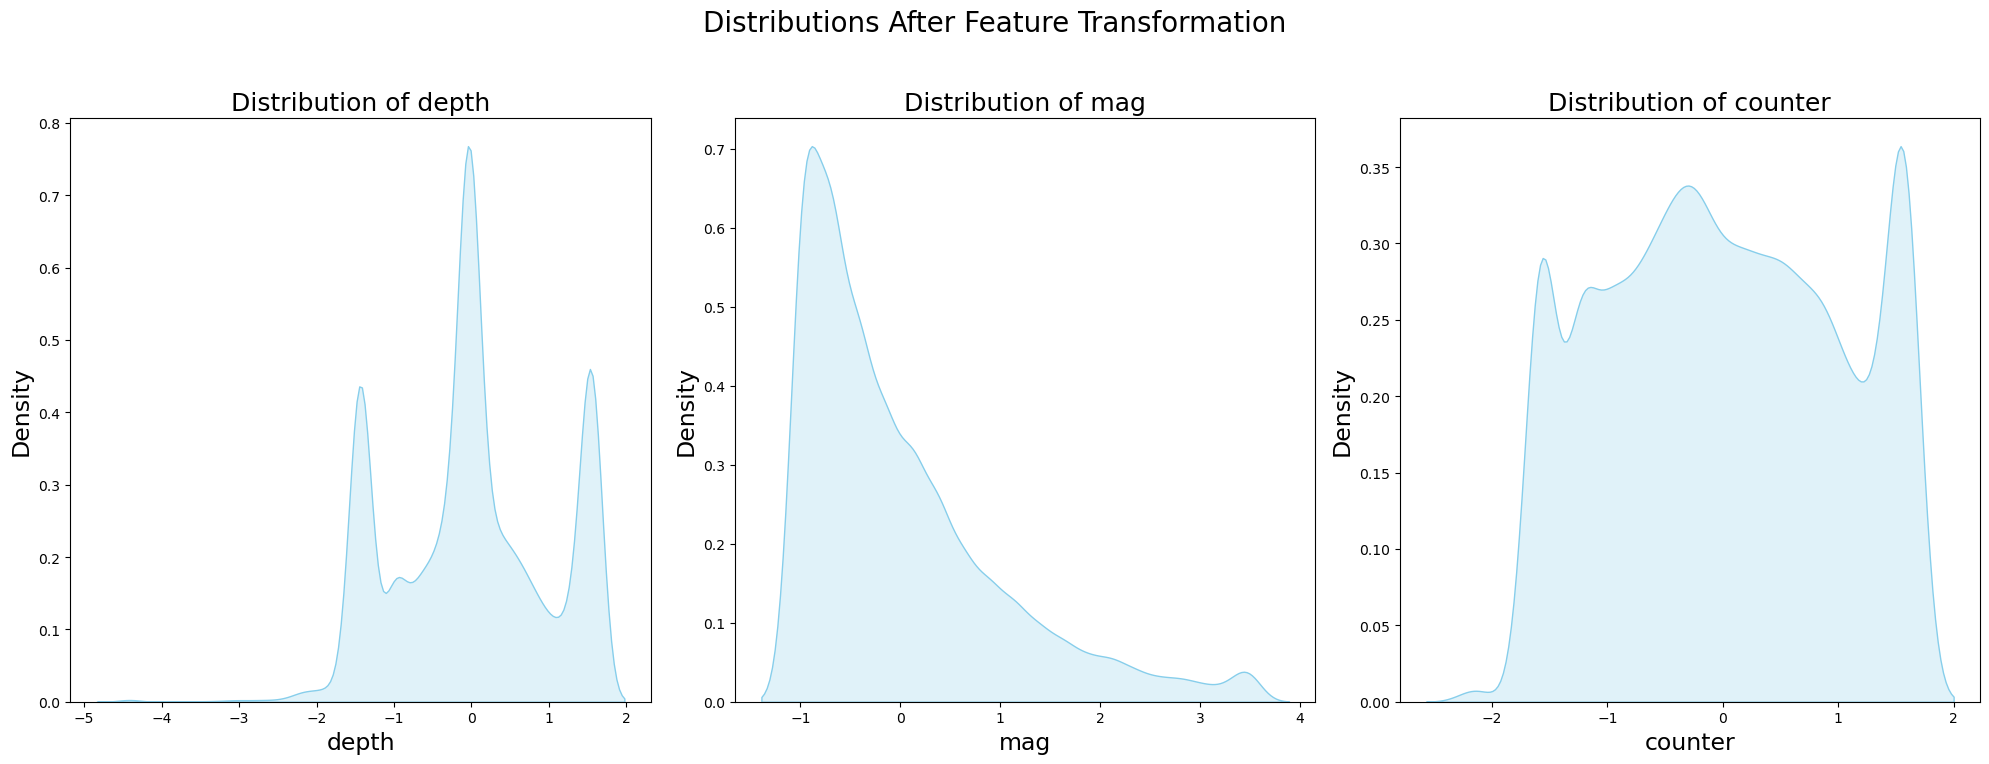

In [258]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define features
numerical_features = ['depth', 'mag', 'counter']

# Set up the matplotlib figure for numerical features
fig, axes = plt.subplots(nrows=1, ncols=len(numerical_features), figsize=(20, 8))  
axes = axes.flatten()  

# Plot numerical features
for i, col in enumerate(numerical_features):
    sns.kdeplot(data=train_df_sorted[col], ax=axes[i], fill=True, color='skyblue')
    axes[i].set_title(f'Distribution of {col}', fontsize=18)
    axes[i].set_xlabel(col, fontsize=17)
    axes[i].set_ylabel('Density', fontsize=17)

# Add a title to the whole figure
fig.suptitle('Distributions After Feature Transformation', fontsize=20)

# Adjust the layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust rect to make room for the suptitle
plt.savefig("Distributions After Feature Transformation.pdf")
plt.show()
plt.show()


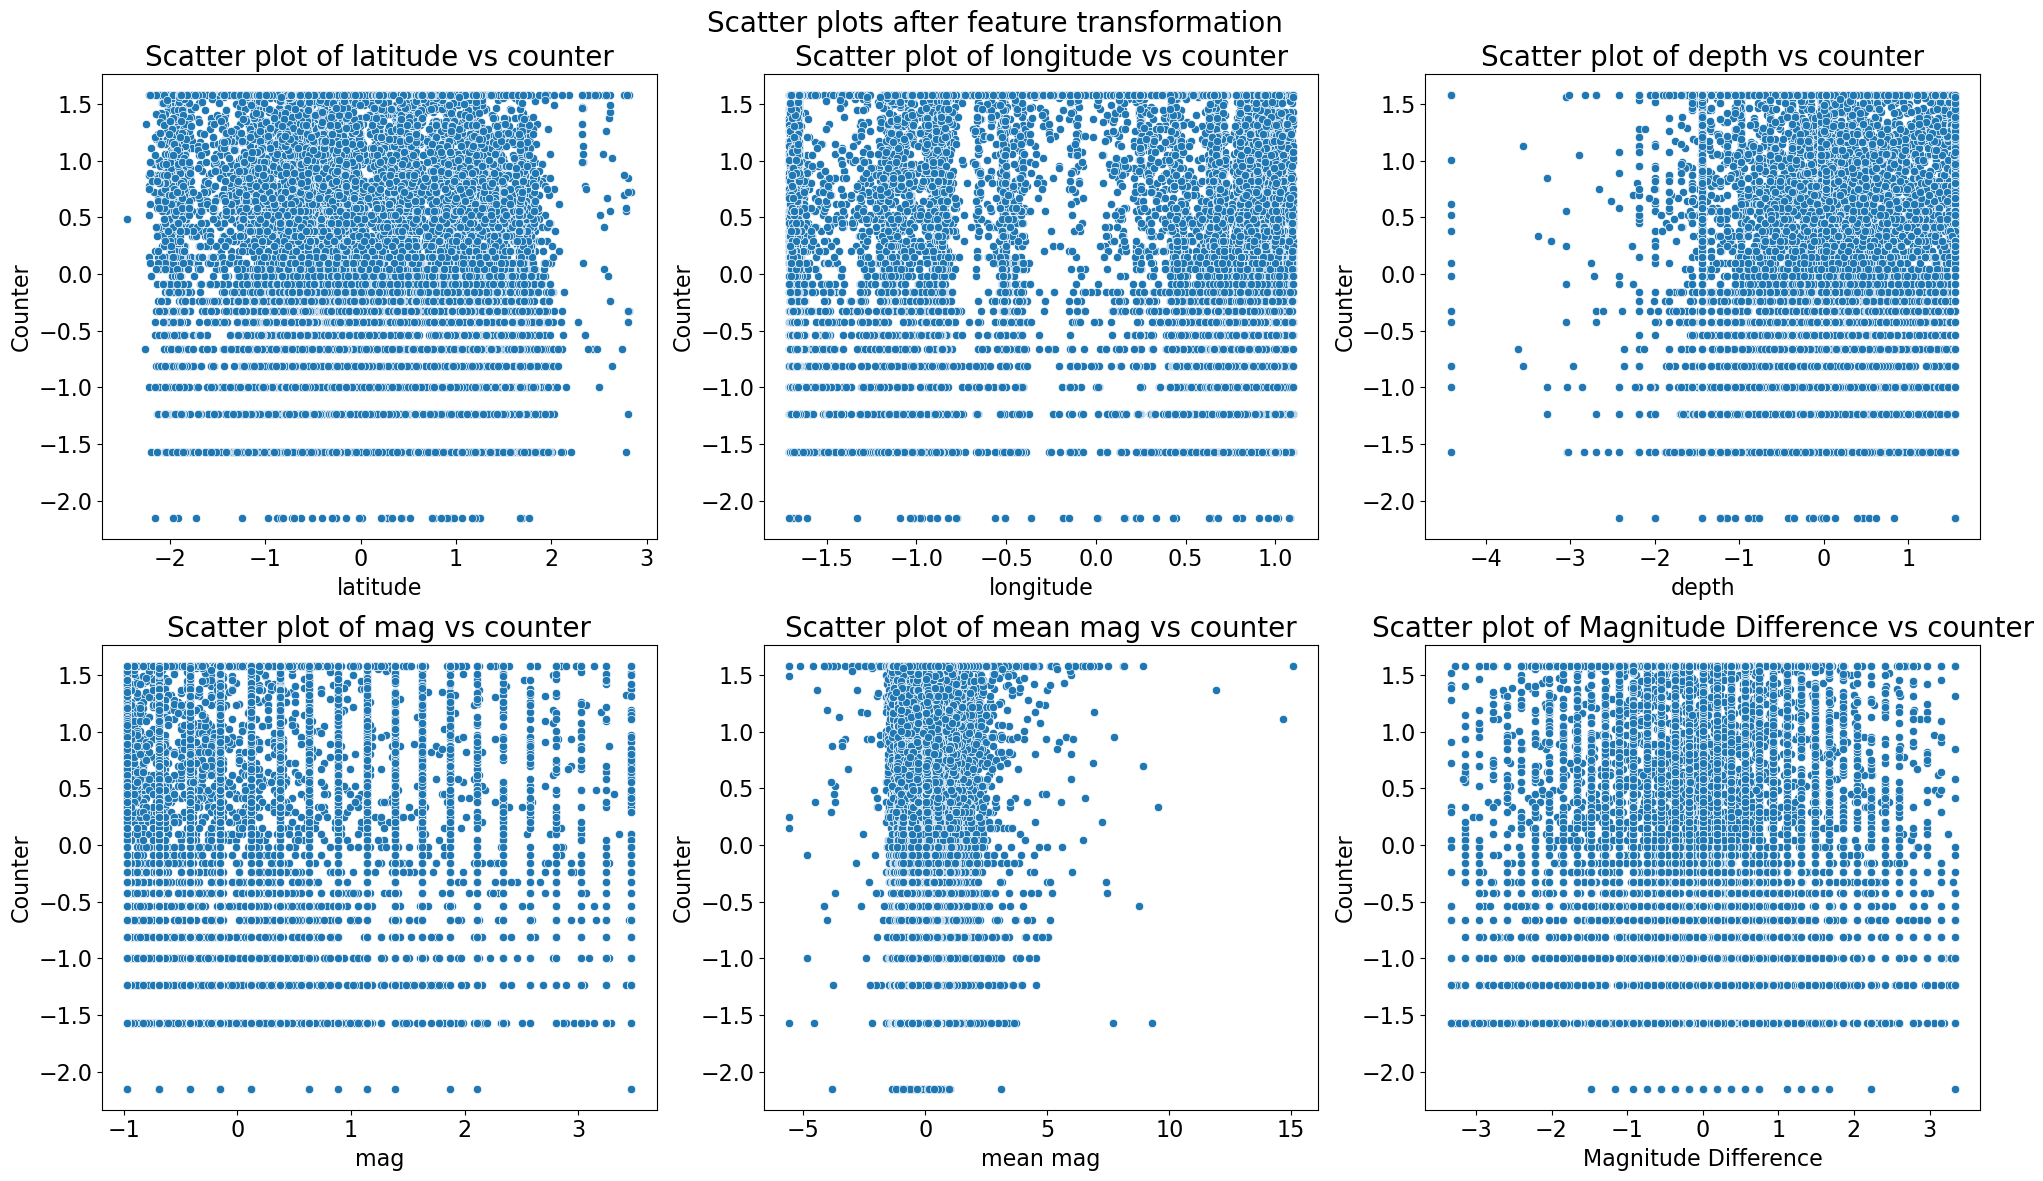

In [259]:
import matplotlib.pyplot as plt
import seaborn as sns


# Define the variables we want to plot with 'counter'
variables = ['latitude', 'longitude', 'depth', 'mag', 'mean mag', 'Magnitude Difference']

# Set up the figure size
plt.figure(figsize=(20, 12))  # Increase figure size

# Create each subplot
for i, var in enumerate(variables, start=1):
    plt.subplot(2, 3, i)  # 2 rows, 3 columns, i-th subplot
    sns.scatterplot(x=var, y='counter', data=train_df_sorted)
    plt.title(f'Scatter plot of {var} vs counter', fontsize=20) 
    plt.xlabel(var, fontsize=16)  
    plt.ylabel('Counter', fontsize=16)  
    plt.xticks(fontsize=16)  
    plt.yticks(fontsize=16)  

# Add a title to the whole figure
plt.suptitle('Scatter plots after feature transformation', fontsize=20)
# Adjust layout to prevent overlap
plt.tight_layout()
plt.savefig("Scatter plots after feature transformation.pdf")
plt.show()




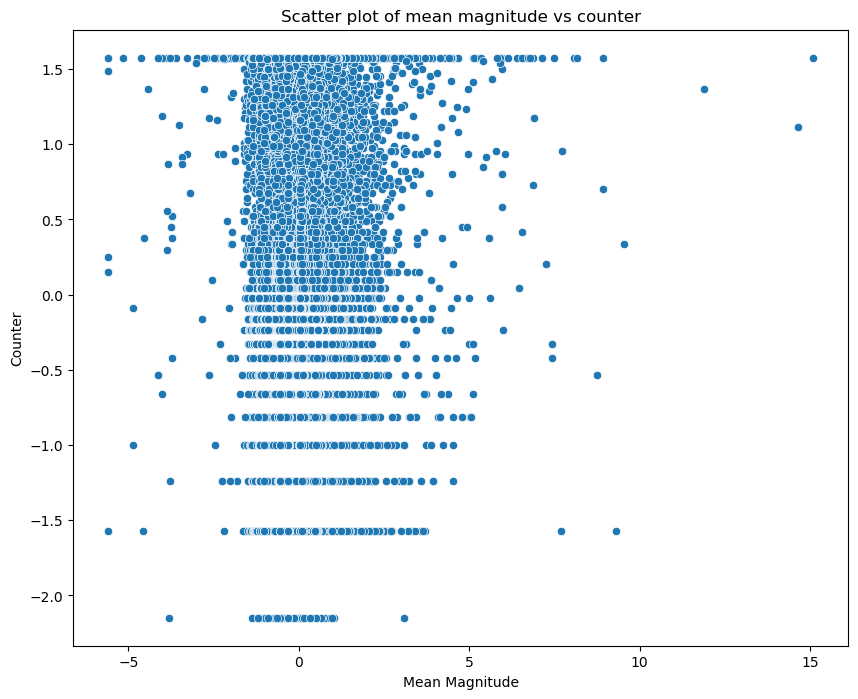

In [260]:
from sklearn.manifold import TSNE

numerical_features = ['latitude', 'longitude', 'depth', 'mag', 'year', 'month', 'day', 
                      'day_of_week_sin', 'day_of_week_cos', 'month_sin', 'month_cos', 
                      'mean mag', 'Magnitude Difference', 'number of earthquakes', 'counter']

# Scatter plot for selected features
plt.figure(figsize=(10, 8))
sns.scatterplot(x='mean mag', y='counter', data=train_df_sorted)
plt.title('Scatter plot of mean magnitude vs counter')
plt.xlabel('Mean Magnitude')
plt.ylabel('Counter')
plt.savefig("Scatter plot of mean magnitude vs counter.pdf")
plt.show()


## model for test set

In [141]:
train_df_sorted = encode_data(encoder, train_df_sorted)
test_df_sorted = encode_data(encoder, test_df_sorted)

""" print(f"train_df shape: {train_df_sorted.shape}")
print(f"test shape: {test_df_sorted.shape}")
print(f"train_df columns: {train_df_sorted.columns}")
print(f" test columns {test_df_sorted.columns}")

# Ensure all required features are selected
feature_columns = train_df_sorted.columns.tolist()
feature_columns_test = test_df_sorted.columns.tolist()

# Create sequences for LSTM
X_train, y_train = create_sequences(train_df_sorted[feature_columns].values, train_df_sorted['counter'].values.flatten(), time_steps)
X_val, y_val = create_sequences(test_df_sorted[feature_columns].values, test_df_sorted['counter'].values.flatten(), time_steps) """

' print(f"train_df shape: {train_df_sorted.shape}")\nprint(f"test shape: {test_df_sorted.shape}")\nprint(f"train_df columns: {train_df_sorted.columns}")\nprint(f" test columns {test_df_sorted.columns}")\n\n# Ensure all required features are selected\nfeature_columns = train_df_sorted.columns.tolist()\nfeature_columns_test = test_df_sorted.columns.tolist()\n\n# Create sequences for LSTM\nX_train, y_train = create_sequences(train_df_sorted[feature_columns].values, train_df_sorted[\'counter\'].values.flatten(), time_steps)\nX_val, y_val = create_sequences(test_df_sorted[feature_columns].values, test_df_sorted[\'counter\'].values.flatten(), time_steps) '

In [142]:
# Ensure 'counter' is excluded from feature columns
feature_columns = [col for col in train_df_sorted.columns if col != 'counter']

# Print to verify feature columns
print("Feature columns:", feature_columns)
print("Number of features in feature_columns:", len(feature_columns))

# Recreate sequences for LSTM with correct features
X_train, y_train = create_sequences(train_df_sorted[feature_columns].values, train_df_sorted['counter'].values.flatten(), time_steps)
X_val, y_val = create_sequences(test_df_sorted[feature_columns].values, test_df_sorted['counter'].values.flatten(), time_steps)

Feature columns: ['latitude', 'longitude', 'depth', 'mag', 'year', 'month', 'day', 'day_of_week', 'day_of_week_sin', 'day_of_week_cos', 'month_sin', 'month_cos', 'mean mag', 'Magnitude Difference', 'number of earthquakes', 'countries_Afghanistan', 'countries_Antarctica', 'countries_Argentina', 'countries_Australia', 'countries_Brazil', 'countries_Canada', 'countries_Chile', 'countries_China', 'countries_Colombia', 'countries_Ecuador', 'countries_Ethiopia', 'countries_Fiji', 'countries_France', 'countries_Greece', 'countries_Guatemala', 'countries_India', 'countries_Indonesia', 'countries_Iran', 'countries_Italy', 'countries_Japan', 'countries_Kiribati', 'countries_Mexico', 'countries_Myanmar', 'countries_Nepal', 'countries_New Zealand', 'countries_Nicaragua', 'countries_Norway', 'countries_Pakistan', 'countries_Panama', 'countries_Papua New Guinea', 'countries_Peru', 'countries_Philippines', 'countries_Portugal', 'countries_Russia', 'countries_Samoa', 'countries_Solomon Islands', 'coun

In [143]:
print(f"X train shape: {X_train.shape}")
print(f" train_df columns: {train_df_sorted.columns.tolist()}")

print(f"X val shape: {X_val.shape}")
print(f" X val columns: {test_df_sorted.columns.tolist()}")

X train shape: (17890, 7, 112)
 train_df columns: ['latitude', 'longitude', 'depth', 'mag', 'year', 'month', 'day', 'day_of_week', 'day_of_week_sin', 'day_of_week_cos', 'month_sin', 'month_cos', 'mean mag', 'Magnitude Difference', 'number of earthquakes', 'counter', 'countries_Afghanistan', 'countries_Antarctica', 'countries_Argentina', 'countries_Australia', 'countries_Brazil', 'countries_Canada', 'countries_Chile', 'countries_China', 'countries_Colombia', 'countries_Ecuador', 'countries_Ethiopia', 'countries_Fiji', 'countries_France', 'countries_Greece', 'countries_Guatemala', 'countries_India', 'countries_Indonesia', 'countries_Iran', 'countries_Italy', 'countries_Japan', 'countries_Kiribati', 'countries_Mexico', 'countries_Myanmar', 'countries_Nepal', 'countries_New Zealand', 'countries_Nicaragua', 'countries_Norway', 'countries_Pakistan', 'countries_Panama', 'countries_Papua New Guinea', 'countries_Peru', 'countries_Philippines', 'countries_Portugal', 'countries_Russia', 'countrie

In [144]:
# Identify extra feature in test_df_sorted
extra_features_in_test = set(test_df_sorted.columns) - set(train_df_sorted.columns)
missing_features_in_train = set(train_df_sorted.columns) - set(test_df_sorted.columns)

print("Extra features in test_df_sorted:", extra_features_in_test)
print("Missing features in train_df_sorted:", missing_features_in_train)


Extra features in test_df_sorted: set()
Missing features in train_df_sorted: set()


In [145]:
print("Number of feature columns in train_df_sorted:", len(train_df_sorted.columns))
print("Number of feature columns in test_df_sorted:", len(test_df_sorted.columns))

# Re-check shapes of X_train and X_val
print("Shape of X_train:", X_train.shape)
print("Shape of X_val:", X_val.shape)

Number of feature columns in train_df_sorted: 113
Number of feature columns in test_df_sorted: 113
Shape of X_train: (17890, 7, 112)
Shape of X_val: (4740, 7, 112)


In [146]:
# Rebuild the model with the best hyperparameters
best_model = hypermodel.build(best_hps)
history = best_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=40, callbacks=[EarlyStopping(monitor='val_mae', patience=6, restore_best_weights=True)])

c:\Anacoda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/40
560/560 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 1.2251 - mae: 0.8779 - val_loss: 0.9211 - val_mae: 0.8811
Epoch 2/40
560/560 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.8243 - mae: 0.8592 - val_loss: 0.7044 - val_mae: 0.8738
Epoch 3/40
560/560 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.6502 - mae: 0.8564 - val_loss: 0.6090 - val_mae: 0.8702
Epoch 4/40
560/560 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.5752 - mae: 0.8554 - val_loss: 0.5692 - val_mae: 0.8687
Epoch 5/40
560/560 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.5440 - mae: 0.8549 - val_loss: 0.5523 - val_mae: 0.8681
Epoch 6/40
560/560 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.5304 - mae: 0.8546 - val_loss: 0.5440 - val_mae: 0.8679
Epoch 7/40
560/560 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.5232 - mae: 0.8543 - val_loss: 0.5390 - val_mae: 0.8679
Epoch 8/40
560/560 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.5187 - mae: 0.8542 - val_loss: 0.5358 - val_mae: 0.8679
Epoch 9/40
560/560 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - lo

In [147]:
best_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 16)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,821 (96.96 KB)

 Trainable params: 8,273 (32.32 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 16,548 (64.64 KB)

In [148]:
print("Best hyperparameters:")
print(f"Units: {best_hps.get('units')}")
print(f"L2 Regularization: {best_hps.get('l2_reg')}")
print(f"Learning Rate: {best_hps.get('learning_rate')}")
print(f"Huber Delta: {best_hps.get('delta')}")
print(f"Batch Size: {best_hps.get('batch_size')}")

Best hyperparameters:
Units: 16
L2 Regularization: 0.01
Learning Rate: 0.0001
Huber Delta: 20
Batch Size: 32


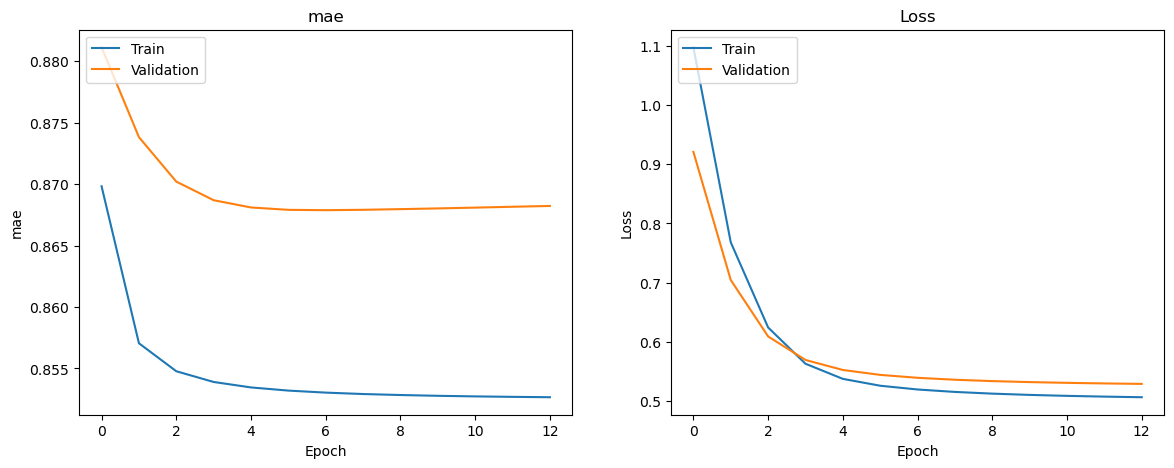

In [149]:
# Plotting the results
loss_acc_graphs(history)

In [150]:
test_loss, test_mae = best_model.evaluate(X_val, y_val)

149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5457 - mae: 0.8841


In [151]:
# Make predictions on the validation set
predictions_scaled = best_model.predict(X_val)

# Inverse scale the predictions
predictions_inverse_scaled = target_scaler.inverse_transform(predictions_scaled)

# Inverse the log transform
predictions_original = np.expm1(predictions_inverse_scaled).flatten()

# For the validation set, we need to inverse scale and then inverse log transform as well
y_val_inverse_scaled = target_scaler.inverse_transform(y_val.reshape(-1, 1))
y_val_original_values = np.expm1(y_val_inverse_scaled).flatten()

# Evaluate the error using MAE on the original scale
mae_original = mean_absolute_error(y_val_original_values, predictions_original)
print(f"Original Mean Absolute Error: {mae_original}")

# Compare the first few predictions to the actual values
for pred, actual in zip(predictions_original[:50], y_val_original_values[:50]):
    print(f"Predicted: {pred}, Actual: {actual}")

149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Original Mean Absolute Error: 19.61409954944246
Predicted: 19.760332107543945, Actual: 9.000000000000002
Predicted: 19.925373077392578, Actual: 2.0000000000000004
Predicted: 21.087312698364258, Actual: 10.000000000000002
Predicted: 19.87872886657715, Actual: 3.999999999999999
Predicted: 19.052627563476562, Actual: 56.00000000000001
Predicted: 17.68476676940918, Actual: 1.0
Predicted: 20.277629852294922, Actual: 83.40000000000053
Predicted: 18.94341278076172, Actual: 1.0
Predicted: 16.597017288208008, Actual: 3.0
Predicted: 16.213645935058594, Actual: 5.0
Predicted: 16.0819149017334, Actual: 10.000000000000002
Predicted: 22.08726692199707, Actual: 16.0
Predicted: 19.018510818481445, Actual: 16.0
Predicted: 20.39862823486328, Actual: 5.999999999999999
Predicted: 19.32569122314453, Actual: 3.0
Predicted: 18.960994720458984, Actual: 1.0
Predicted: 17.790496826171875, Actual: 6.999999999999998
Predicted: 17.23185920715332, Actual: 1.0
Predicted: 17.2

## Feature Importance

In [152]:
import numpy as np
import matplotlib.pyplot as plt


""" feature_columns = ['latitude', 'longitude', 'depth', 'mag', 'year', 'month', 'day', 'day_of_week', 'day_of_week_sin', 'day_of_week_cos', 'month_sin', 'month_cos', 'mean mag', 'Magnitude Difference', 'number of earthquakes', 'counter', 
'countries_Afghanistan', 'countries_Antarctica', 'countries_Argentina', 'countries_Australia', 'countries_Brazil', 'countries_Canada', 'countries_Chile', 'countries_China', 'countries_Colombia', 'countries_Ecuador', 
'countries_Ethiopia', 'countries_Fiji', 'countries_France', 'countries_Greece', 'countries_Guatemala', 'countries_India', 'countries_Indonesia', 'countries_Iran', 'countries_Italy', 'countries_Japan', 'countries_Kiribati', 
'countries_Mexico', 'countries_Myanmar', 'countries_Nepal', 'countries_New Zealand', 'countries_Nicaragua', 'countries_Norway', 'countries_Pakistan', 'countries_Panama', 'countries_Papua New Guinea', 'countries_Peru', 'countries_Philippines', 
'countries_Portugal', 'countries_Russia', 'countries_Samoa', 'countries_Solomon Islands', 'countries_Taiwan', 'countries_Tonga', 'countries_Trinidad and Tobago', 'countries_Turkey', 'countries_United Kingdom', 'countries_United States of America', 
'countries_Vanuatu', 'countries_nan', 'PlateName_Aegean Sea', 'PlateName_Africa', 'PlateName_Altiplano', 'PlateName_Amur', 'PlateName_Anatolia', 'PlateName_Antarctica', 'PlateName_Arabia', 'PlateName_Australia', 'PlateName_Balmoral Reef', 
'PlateName_Banda Sea', 'PlateName_Birds Head', 'PlateName_Burma', 'PlateName_Caribbean', 'PlateName_Caroline', 'PlateName_Cocos', 'PlateName_Conway Reef', 'PlateName_Easter', 'PlateName_Eurasia', 'PlateName_Futuna', 'PlateName_Galapagos', 
'PlateName_India', 'PlateName_Juan Fernandez', 'PlateName_Juan de Fuca', 'PlateName_Kermadec', 'PlateName_Manus', 'PlateName_Maoke', 'PlateName_Mariana', 'PlateName_Molucca Sea', 'PlateName_Nazca', 'PlateName_New Hebrides', "PlateName_Niuafo'ou", 
'PlateName_North America', 'PlateName_North Andes', 'PlateName_North Bismarck', 'PlateName_Okhotsk', 'PlateName_Okinawa', 'PlateName_Pacific', 'PlateName_Panama', 'PlateName_Philippine Sea', 'PlateName_Rivera', 'PlateName_Sandwich', 'PlateName_Scotia', 
'PlateName_Shetland', 'PlateName_Solomon Sea', 'PlateName_Somalia', 'PlateName_South America', 'PlateName_South Bismarck', 'PlateName_Sunda', 'PlateName_Timor', 'PlateName_Tonga', 'PlateName_Woodlark', 'PlateName_Yangtze', 'PlateName_nan'] """


# Define and map categorical features based on their encoded prefixes
categorical_features = {
    'countries': [index for index, name in enumerate(feature_columns) if 'countries_' in name],
    'PlateName': [index for index, name in enumerate(feature_columns) if 'PlateName_' in name]
}

# Include numeric features
numeric_features = ['latitude', 'longitude', 'depth', 'mag', 'year', 'month', 'day', 'day_of_week',
                    'day_of_week_sin', 'day_of_week_cos', 'month_sin', 'month_cos', 'mean mag',
                    'Magnitude Difference', 'number of earthquakes']

149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
0.8678742850577735
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


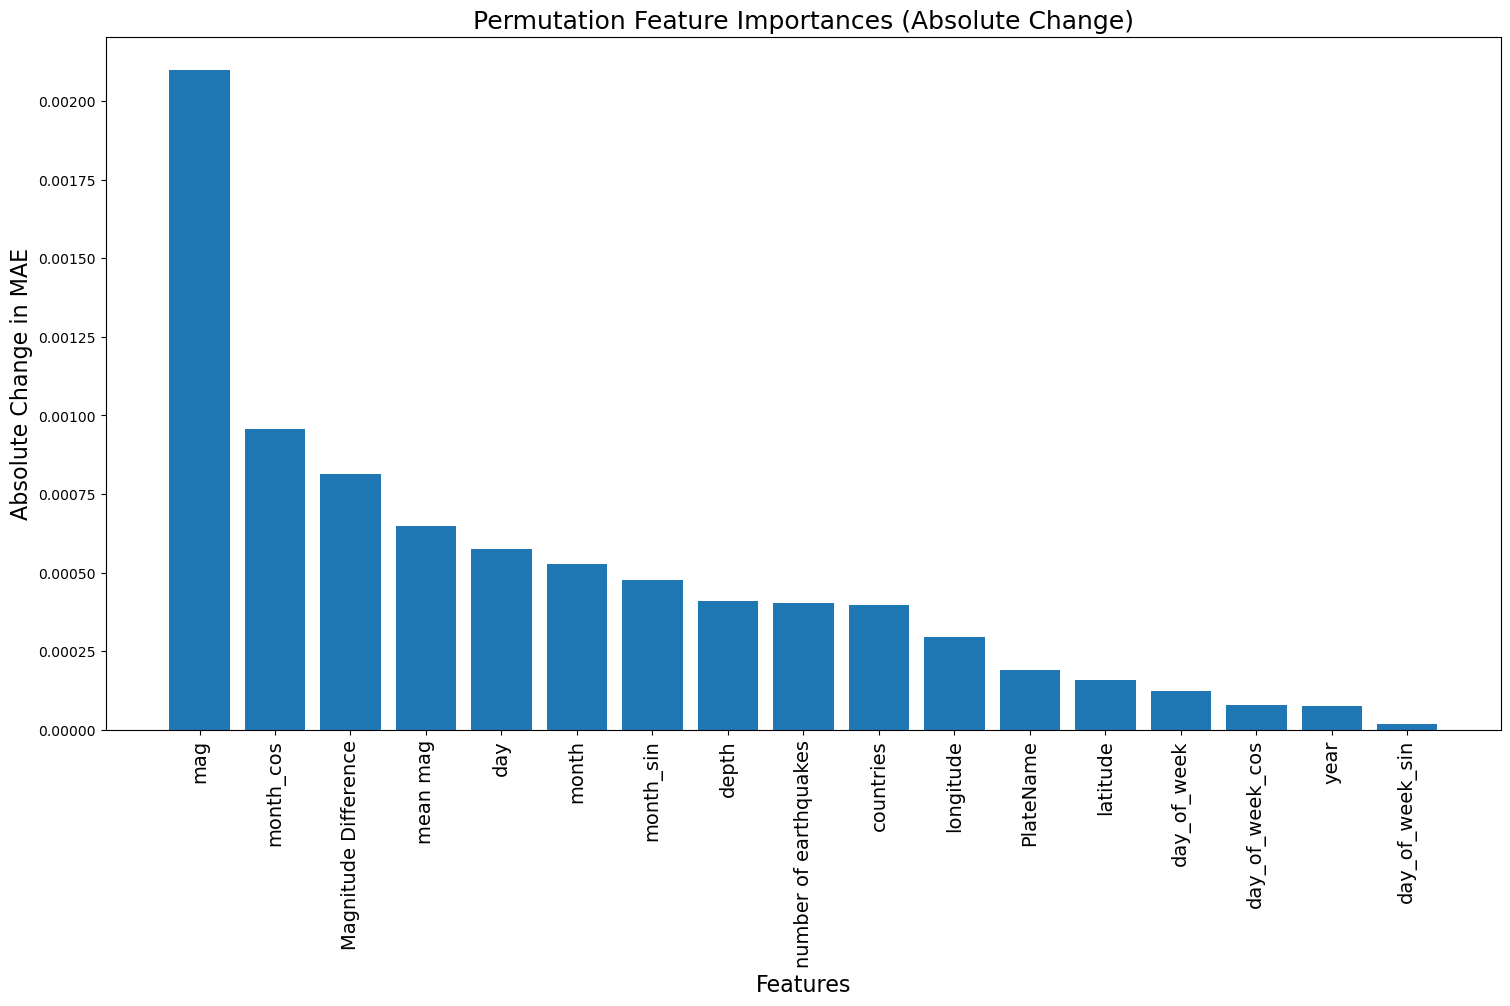

In [153]:
from sklearn.utils import shuffle
from sklearn.metrics import mean_absolute_error


# Initial score calculation before permutation
baseline_mae = mean_absolute_error(best_model.predict(X_val), y_val)
print(baseline_mae)
permutation_importances = {}

# Index mapping for numeric features
numeric_feature_indices = {name: i for i, name in enumerate(feature_columns) if name in numeric_features}

# Evaluate impact of shuffling each numeric feature
for feature_name, index in numeric_feature_indices.items():
    # Copy and shuffle the specific feature
    X_val_shuffled = np.copy(X_val)
    X_val_shuffled[:, :, index] = shuffle(X_val_shuffled[:, :, index])

    # Calculate MAE after permutation
    shuffled_mae = mean_absolute_error(best_model.predict(X_val_shuffled), y_val)
    permutation_importances[feature_name] = np.abs(shuffled_mae - baseline_mae)

# Evaluate impact of shuffling each categorical feature block
for feature_name, indices in categorical_features.items():
    X_val_shuffled = np.copy(X_val)
    shuffled_indices = shuffle(np.arange(X_val.shape[0]))
    
    # Shuffle each index within the block
    for index in indices:
        X_val_shuffled[:, :, index] = X_val_shuffled[shuffled_indices, :, index]

    shuffled_mae = mean_absolute_error(best_model.predict(X_val_shuffled), y_val)
    permutation_importances[feature_name] = np.abs(shuffled_mae - baseline_mae)

# Sort the calculated importances in descending order by their impact
sorted_permutation_importances = dict(sorted(permutation_importances.items(), key=lambda item: item[1], reverse=True))

# Plotting the sorted permutation importances
plt.figure(figsize=(18, 9))
features_sorted = list(sorted_permutation_importances.keys())
importances_sorted = list(sorted_permutation_importances.values())
plt.bar(features_sorted, importances_sorted)
plt.xticks(rotation=90, fontsize=14)
plt.xlabel('Features', fontsize=16)
plt.ylabel('Absolute Change in MAE', fontsize=16)
plt.title('Permutation Feature Importances (Absolute Change)', fontsize=18)
plt.savefig("Permutation Feature Importance.pdf")
plt.show()

Other method of feature importance

In [ ]:
# LIME


""" import numpy as np
import lime
import lime.lime_tabular
from sklearn.utils import shuffle
from collections import defaultdict
import matplotlib.pyplot as plt



# Ensure the feature_columns list reflects the correct order of features in the flattened array
n_timesteps = X_val.shape[1]
flattened_feature_columns = [f'{feature}_{i}' for i in range(n_timesteps) for feature in feature_columns]

# Flatten X_val for LIME while maintaining a reference to the original feature shape
n_instances, n_timesteps, n_features = X_val.shape
X_val_flat = X_val.reshape(n_instances, n_timesteps * n_features)

# Define the predict function for LIME
def predict_fn(data):
    data = data.reshape(data.shape[0], n_timesteps, n_features)  # Reshape data back to 3D for prediction
    predictions = best_model.predict(data)
    return predictions

# Initialize LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    X_val_flat,
    mode='regression',
    feature_names=flattened_feature_columns,
    categorical_features=[i for sublist in categorical_features.values() for i in sublist],
    verbose=True,
    feature_selection='auto'
)

# Collecting feature importances
feature_importances = defaultdict(float)

for i in range(len(X_val_flat)):
    exp = explainer.explain_instance(
        X_val_flat[i], 
        predict_fn,
        num_features=len(flattened_feature_columns)
    )
    for feature, importance in exp.as_list():
        feature_importances[feature] += abs(importance)  # Aggregate the absolute importance

# Aggregating categorical features
aggregated_importances = defaultdict(float)

for feature, importance in feature_importances.items():
    if any(cat in feature for cat in ['countries_', 'PlateName_']):
        if 'countries_' in feature:
            aggregated_importances['countries'] += importance
        elif 'PlateName_' in feature:
            aggregated_importances['PlateName'] += importance
    else:
        base_feature = '_'.join(feature.split('_')[:-1])  # Remove the timestep index
        aggregated_importances[base_feature] += importance

# Sort the calculated importances in descending order by their impact
sorted_aggregated_importances = dict(sorted(aggregated_importances.items(), key=lambda item: item[1], reverse=True))

# Plotting the sorted aggregated importances
plt.figure(figsize=(18, 9))
features_sorted = list(sorted_aggregated_importances.keys())
importances_sorted = list(sorted_aggregated_importances.values())
plt.bar(features_sorted, importances_sorted)
plt.xticks(rotation=90, fontsize=14)
plt.xlabel('Features', fontsize=16)
plt.ylabel('Aggregated Importance', fontsize=16)
plt.title('LIME Feature Importances (Aggregated)', fontsize=18)
plt.savefig("LIME Feature Importance.pdf")
plt.show()
 """

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Intercept 0.19988284106487977
Prediction_local [-0.01503592]
Right: 0.040153228
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Intercept 0.40145384027524567
Prediction_local [0.05420102]
Right: 0.0758608
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Intercept 0.13759688551063537
Prediction_local [0.01811257]
Right: 0.21240774
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Intercept 0.014957255992609494
Prediction_local [0.09565582]
Right: 0.31094453
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Intercept 0.054798401197477295
Prediction_local [0.05363747]
Right: 0.14869447
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Intercept 0.49056903643644983
Prediction_local [-0.01256631]
Right: 0.21703947
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Intercept 0.3209794108165922
Prediction_local [0.01894773]
Right: 0.3677066
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Intercept 0.08466752587048118
Prediction_local [-0.02933357]
Right: 0.15132962
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Inte

KeyboardInterrupt: 

In [ ]:
print(X_val.shape)
print(X_train.shape)
print(len(feature_columns))

(4740, 7, 113)
(17890, 7, 113)
112


In [ ]:
import shap
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

# and 'counter' is excluded from X_val
feature_columns = [col for col in feature_columns if col != 'counter']

# Rebuild the validation data without the 'counter' feature
n_instances, n_timesteps, n_features = X_val.shape

# Flatten the validation data for SHAP
X_val_flat = X_val.reshape(n_instances, n_timesteps * n_features)

# Define the predict function for SHAP
def predict_fn(data):
    data = data.reshape(data.shape[0], n_timesteps, n_features)  # Reshape data back to 3D for prediction
    predictions = best_model.predict(data)
    return predictions

# Use a sample of the background data for SHAP
background = shap.sample(X_val_flat, 100)

# Initialize the SHAP explainer for deep learning models
explainer = shap.KernelExplainer(predict_fn, background)

# Calculate SHAP values for a subset of the validation data
subset_size = 20  # Adjust based on computational resources
subset_indices = np.random.choice(len(X_val_flat), subset_size, replace=False)
shap_values = explainer.shap_values(X_val_flat[subset_indices])

# Ensure shap_values is an array
shap_values = np.array(shap_values)

# Check the shape of shap_values to handle multi-output
if len(shap_values) == 1:
    shap_values = shap_values[0]  # For single output

# Aggregate SHAP values
feature_importances = defaultdict(float)
for i in range(shap_values.shape[0]):
    for j in range(shap_values.shape[1]):
        feature_name = flattened_feature_columns[j]
        feature_importances[feature_name] += np.abs(shap_values[i][j])

# Aggregating categorical features
aggregated_importances = defaultdict(float)
for feature, importance in feature_importances.items():
    if any(cat in feature for cat in ['countries_', 'PlateName_']):
        if 'countries_' in feature:
            aggregated_importances['countries'] += importance
        elif 'PlateName_' in feature:
            aggregated_importances['PlateName'] += importance
    else:
        base_feature = '_'.join(feature.split('_')[:-1])  # Remove the timestep index
        aggregated_importances[base_feature] += importance

# Sort the calculated importances in descending order by their impact
sorted_aggregated_importances = dict(sorted(aggregated_importances.items(), key=lambda item: item[1], reverse=True))

# Plotting the sorted aggregated importances
plt.figure(figsize=(18, 9))
features_sorted = list(sorted_aggregated_importances.keys())
importances_sorted = list(sorted_aggregated_importances.values())
plt.bar(features_sorted, importances_sorted)
plt.xticks(rotation=90, fontsize=14)
plt.xlabel('Features', fontsize=16)
plt.ylabel('Aggregated Importance', fontsize=16)
plt.title('SHAP Feature Importances (Aggregated)', fontsize=18)
plt.savefig("SHAP_Feature_Importance.pdf")
plt.show()


Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


  0%|          | 0/50 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
9613/9613 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


KeyboardInterrupt: 

In [ ]:
print(sorted_aggregated_importances)

{'counter': 1.4004484862285973, 'PlateName': 0.32320960381675357, 'mean mag': 0.23546779367642762, 'countries': 0.22182890459032484, 'depth': 0.1811814261553661, 'day_of_week': 0.1805937402010559, 'Magnitude Difference': 0.17565726481356736, 'longitude': 0.16007963430418784, 'month': 0.1336802573720513, 'mag': 0.12727783846942994, 'day_of_week_cos': 0.11972189077364306, 'month_cos': 0.06852873893685428, 'day_of_week_sin': 0.06101010202956274, 'number of earthquakes': 0.05898467918939771, 'month_sin': 0.0567940541377008, 'latitude': 0.054322185271375834, 'day': 0.04462534776139964, 'year': 0.02405937992359096}


In [ ]:
print(flattened_feature_columns)

['latitude_0', 'longitude_0', 'depth_0', 'mag_0', 'year_0', 'month_0', 'day_0', 'day_of_week_0', 'day_of_week_sin_0', 'day_of_week_cos_0', 'month_sin_0', 'month_cos_0', 'mean mag_0', 'Magnitude Difference_0', 'number of earthquakes_0', 'countries_Afghanistan_0', 'countries_Antarctica_0', 'countries_Argentina_0', 'countries_Australia_0', 'countries_Brazil_0', 'countries_Canada_0', 'countries_Chile_0', 'countries_China_0', 'countries_Colombia_0', 'countries_Ecuador_0', 'countries_Ethiopia_0', 'countries_Fiji_0', 'countries_France_0', 'countries_Greece_0', 'countries_Guatemala_0', 'countries_India_0', 'countries_Indonesia_0', 'countries_Iran_0', 'countries_Italy_0', 'countries_Japan_0', 'countries_Kiribati_0', 'countries_Mexico_0', 'countries_Myanmar_0', 'countries_Nepal_0', 'countries_New Zealand_0', 'countries_Nicaragua_0', 'countries_Norway_0', 'countries_Pakistan_0', 'countries_Panama_0', 'countries_Papua New Guinea_0', 'countries_Peru_0', 'countries_Philippines_0', 'countries_Portuga

In [ ]:
import shap
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict


feature_columns = [col for col in feature_columns if col != 'counter']

n_instances, n_timesteps, n_features = X_val.shape

# Ensure the flattened feature columns match the shape of the flattened data
flattened_feature_columns = [f'{feature}_{i}' for i in range(n_timesteps) for feature in feature_columns]

# Flatten the validation data for SHAP
X_val_flat = X_val.reshape(n_instances, n_timesteps * n_features)

# Define the predict function for SHAP
def predict_fn(data):
    data = data.reshape(data.shape[0], n_timesteps, n_features)  # Reshape data back to 3D for prediction
    predictions = best_model.predict(data)
    return predictions

# Use a sample of the background data for SHAP
background = shap.sample(X_val_flat, 100)

# Initialize the SHAP explainer for deep learning models
explainer = shap.KernelExplainer(predict_fn, background)

# Calculate SHAP values for a subset of the validation data
subset_size = 20  # Adjust based on computational resources
subset_indices = np.random.choice(len(X_val_flat), subset_size, replace=False)
shap_values = explainer.shap_values(X_val_flat[subset_indices])

# Ensure shap_values is an array
shap_values = np.array(shap_values)

# Check the shape of shap_values to handle multi-output
if len(shap_values) == 1:
    shap_values = shap_values[0]  # For single output

# Aggregate SHAP values
feature_importances = defaultdict(float)
for i in range(shap_values.shape[0]):
    for j in range(shap_values.shape[1]):
        feature_name = flattened_feature_columns[j]
        feature_importances[feature_name] += np.abs(shap_values[i][j])

# Aggregating categorical features
aggregated_importances = defaultdict(float)
for feature, importance in feature_importances.items():
    if any(cat in feature for cat in ['countries_', 'PlateName_']):
        if 'countries_' in feature:
            aggregated_importances['countries'] += importance
        elif 'PlateName_' in feature:
            aggregated_importances['PlateName'] += importance
    else:
        base_feature = '_'.join(feature.split('_')[:-1])  # Remove the timestep index
        aggregated_importances[base_feature] += importance

# Sort the calculated importances in descending order by their impact
sorted_aggregated_importances = dict(sorted(aggregated_importances.items(), key=lambda item: item[1], reverse=True))

# Plotting the sorted aggregated importances
plt.figure(figsize=(18, 9))
features_sorted = list(sorted_aggregated_importances.keys())
importances_sorted = list(sorted_aggregated_importances.values())
plt.bar(features_sorted, importances_sorted)
plt.xticks(rotation=90, fontsize=14)
plt.xlabel('Features', fontsize=16)
plt.ylabel('Aggregated Importance', fontsize=16)
plt.title('SHAP Feature Importances', fontsize=18)
plt.savefig("SHAP_Feature_Importance.pdf")
plt.show()

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


  0%|          | 0/20 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
9657/9657 ━━━━━━━━━━━━━━━━━━━━ 36s 4ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
9663/9663 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
9675/9675 ━━━━━━━━━━━━━━━━━━━━ 30s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
9663/9663 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
9657/9657 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
9663/9663 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
9669/9669 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
9682/9682 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
9675/9675 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
9663/9663 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
9669/9669 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
9663/9663 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step
1/1 ━━━━━━━━━━━━

IndexError: list index out of range

In [ ]:
# Print to verify lengths
print("Number of flattened feature columns:", len(flattened_feature_columns))
print("Expected number of features in SHAP values:", n_timesteps * len(feature_columns))

Number of flattened feature columns: 784
Expected number of features in SHAP values: 784


Number of flattened feature columns: 784
Expected number of features in SHAP values: 784
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step  


  0%|          | 0/20 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
9657/9657 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
9663/9663 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
9669/9669 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
9669/9669 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
9682/9682 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
9663/9663 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
9657/9657 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
9669/9669 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
9663/9663 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
9663/9663 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
9663/9663 ━━━━━━━━━━━━━━━━━━━━ 32s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
9663/9663 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step
1/1 ━━━━━━━━━━━━

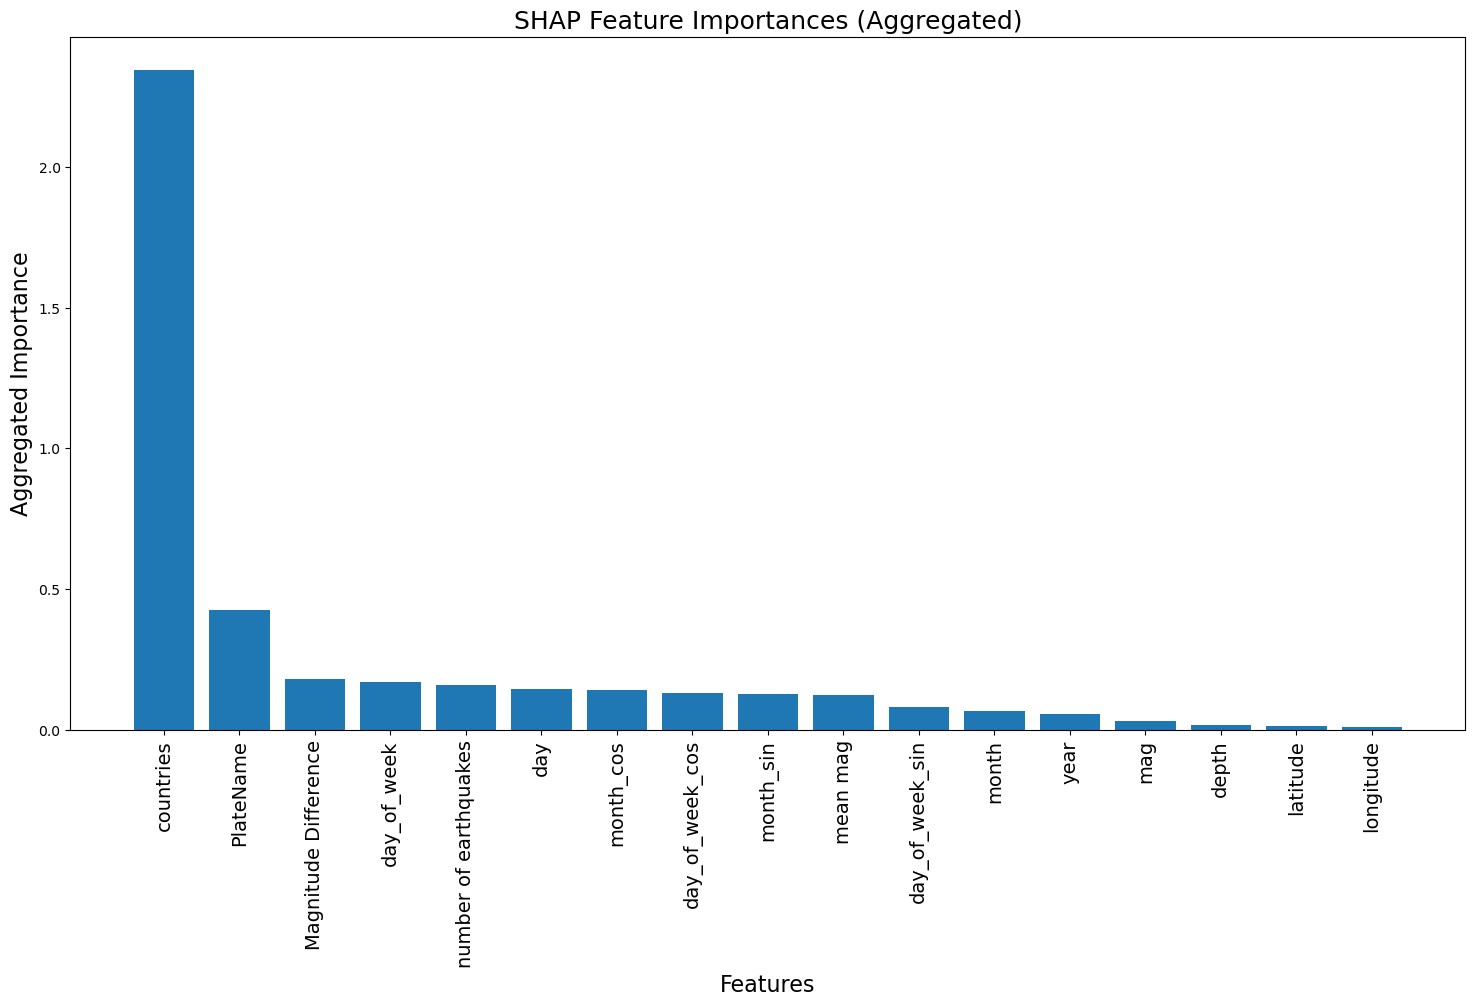

In [ ]:
import shap
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

n_instances, n_timesteps, n_features = X_val.shape

# Exclude 'counter' from feature_columns
feature_columns = [col for col in feature_columns if col != 'counter']

# Ensure the flattened feature columns match the shape of the flattened data
flattened_feature_columns = [f'{feature}_{i}' for i in range(n_timesteps) for feature in feature_columns]

# Print to verify lengths
print("Number of flattened feature columns:", len(flattened_feature_columns))
print("Expected number of features in SHAP values:", n_timesteps * len(feature_columns))

# Flatten the validation data for SHAP
X_val_flat = X_val.reshape(n_instances, n_timesteps * n_features)

# Define the predict function for SHAP
def predict_fn(data):
    data = data.reshape(data.shape[0], n_timesteps, n_features)  # Reshape data back to 3D for prediction
    predictions = best_model.predict(data)
    return predictions

# Use a sample of the background data for SHAP
background = shap.sample(X_val_flat, 100)

# Initialize the SHAP explainer for deep learning models
explainer = shap.KernelExplainer(predict_fn, background)

# Calculate SHAP values for a subset of the validation data
subset_size = 20  # Adjust based on computational resources
subset_indices = np.random.choice(len(X_val_flat), subset_size, replace=False)
shap_values = explainer.shap_values(X_val_flat[subset_indices])

# Ensure shap_values is an array
shap_values = np.array(shap_values)

# Check the shape of shap_values to handle multi-output
if len(shap_values) == 1:
    shap_values = shap_values[0]  # For single output

# Print to verify shapes
print("Shape of SHAP values:", shap_values.shape)

# Aggregate SHAP values
feature_importances = defaultdict(float)
for i in range(shap_values.shape[0]):
    for j in range(shap_values.shape[1]):
        try:
            feature_name = flattened_feature_columns[j]
            feature_importances[feature_name] += np.abs(shap_values[i][j])
        except IndexError:
            print(f"Index {j} is out of bounds for flattened_feature_columns")

# Aggregating categorical features
aggregated_importances = defaultdict(float)
for feature, importance in feature_importances.items():
    if any(cat in feature for cat in ['countries_', 'PlateName_']):
        if 'countries_' in feature:
            aggregated_importances['countries'] += importance
        elif 'PlateName_' in feature:
            aggregated_importances['PlateName'] += importance
    else:
        base_feature = '_'.join(feature.split('_')[:-1])  # Remove the timestep index
        aggregated_importances[base_feature] += importance

# Sort the calculated importances in descending order by their impact
sorted_aggregated_importances = dict(sorted(aggregated_importances.items(), key=lambda item: item[1], reverse=True))

# Plotting the sorted aggregated importances
plt.figure(figsize=(18, 9))
features_sorted = list(sorted_aggregated_importances.keys())
importances_sorted = list(sorted_aggregated_importances.values())
plt.bar(features_sorted, importances_sorted)
plt.xticks(rotation=90, fontsize=14)
plt.xlabel('Features', fontsize=16)
plt.ylabel('Aggregated Importance', fontsize=16)
plt.title('SHAP Feature Importances (Aggregated)', fontsize=18)
plt.savefig("SHAP_Feature_Importance.pdf")
plt.show()


In [ ]:
print(sorted_aggregated_importances)

{'countries': 2.3450864223188743, 'PlateName': 0.42443504726536424, 'Magnitude Difference': 0.1796950072767693, 'day_of_week': 0.1698540700552506, 'number of earthquakes': 0.15917979701963653, 'day': 0.1463451531143454, 'month_cos': 0.14060190917287516, 'day_of_week_cos': 0.132150094026165, 'month_sin': 0.12628364422727711, 'mean mag': 0.1244924942687487, 'day_of_week_sin': 0.08182541919075992, 'month': 0.06604958512237018, 'year': 0.05534947698597818, 'mag': 0.030574292068022476, 'depth': 0.015100635771533892, 'latitude': 0.01341274711126157, 'longitude': 0.008979025052694947}


In [ ]:
import shap
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

n_instances, n_timesteps, n_features = X_val.shape

# Ensure 'counter' is excluded from feature_columns
feature_columns = [col for col in feature_columns if col != 'counter']

# Verify exclusion of 'counter' and lengths
print("Feature columns:", feature_columns)
print("Number of features in feature_columns:", len(feature_columns))

# Ensure the flattened feature columns match the shape of the flattened data
flattened_feature_columns = [f'{feature}_{i}' for i in range(n_timesteps) for feature in feature_columns]

# Print to verify lengths
print("Number of flattened feature columns:", len(flattened_feature_columns))
print("Expected number of features in SHAP values:", n_timesteps * len(feature_columns))

# Flatten the validation data for SHAP
X_val_flat = X_val.reshape(n_instances, n_timesteps * n_features)

# Define the predict function for SHAP
def predict_fn(data):
    data = data.reshape(data.shape[0], n_timesteps, n_features)  # Reshape data back to 3D for prediction
    predictions = best_model.predict(data)
    return predictions

# Use a sample of the background data for SHAP
background = shap.sample(X_val_flat, 100)

# Initialize the SHAP explainer for deep learning models
explainer = shap.KernelExplainer(predict_fn, background)

# Calculate SHAP values for a subset of the validation data
subset_size = 20  # Adjust based on computational resources
subset_indices = np.random.choice(len(X_val_flat), subset_size, replace=False)
shap_values = explainer.shap_values(X_val_flat[subset_indices])

# Ensure shap_values is an array
shap_values = np.array(shap_values)

# Check the shape of shap_values to handle multi-output
if len(shap_values) == 1:
    shap_values = shap_values[0]  # For single output

# Print to verify shapes
print("Shape of SHAP values:", shap_values.shape)

# Ensure indices match with flattened_feature_columns
assert shap_values.shape[1] == len(flattened_feature_columns), "Mismatch in SHAP values and feature columns"

# Aggregate SHAP values
feature_importances = defaultdict(float)
for i in range(shap_values.shape[0]):
    for j in range(shap_values.shape[1]):
        feature_name = flattened_feature_columns[j]
        feature_importances[feature_name] += np.abs(shap_values[i][j])

# Aggregating categorical features
aggregated_importances = defaultdict(float)
for feature, importance in feature_importances.items():
    if any(cat in feature for cat in ['countries_', 'PlateName_']):
        if 'countries_' in feature:
            aggregated_importances['countries'] += importance
        elif 'PlateName_' in feature:
            aggregated_importances['PlateName'] += importance
    else:
        base_feature = '_'.join(feature.split('_')[:-1])  # Remove the timestep index
        aggregated_importances[base_feature] += importance

# Sort the calculated importances in descending order by their impact
sorted_aggregated_importances = dict(sorted(aggregated_importances.items(), key=lambda item: item[1], reverse=True))

# Plotting the sorted aggregated importances
plt.figure(figsize=(18, 9))
features_sorted = list(sorted_aggregated_importances.keys())
importances_sorted = list(sorted_aggregated_importances.values())
plt.bar(features_sorted, importances_sorted)
plt.xticks(rotation=90, fontsize=14)
plt.xlabel('Features', fontsize=16)
plt.ylabel('Aggregated Importance', fontsize=16)
plt.title('SHAP Feature Importances (Aggregated)', fontsize=18)
plt.savefig("SHAP_Feature_Importance.pdf")
plt.show()


Feature columns: ['latitude', 'longitude', 'depth', 'mag', 'year', 'month', 'day', 'day_of_week', 'day_of_week_sin', 'day_of_week_cos', 'month_sin', 'month_cos', 'mean mag', 'Magnitude Difference', 'number of earthquakes', 'countries_Afghanistan', 'countries_Antarctica', 'countries_Argentina', 'countries_Australia', 'countries_Brazil', 'countries_Canada', 'countries_Chile', 'countries_China', 'countries_Colombia', 'countries_Ecuador', 'countries_Ethiopia', 'countries_Fiji', 'countries_France', 'countries_Greece', 'countries_Guatemala', 'countries_India', 'countries_Indonesia', 'countries_Iran', 'countries_Italy', 'countries_Japan', 'countries_Kiribati', 'countries_Mexico', 'countries_Myanmar', 'countries_Nepal', 'countries_New Zealand', 'countries_Nicaragua', 'countries_Norway', 'countries_Pakistan', 'countries_Panama', 'countries_Papua New Guinea', 'countries_Peru', 'countries_Philippines', 'countries_Portugal', 'countries_Russia', 'countries_Samoa', 'countries_Solomon Islands', 'coun

  0%|          | 0/20 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
9663/9663 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
9669/9669 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
9663/9663 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
9663/9663 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
9663/9663 ━━━━━━━━━━━━━━━━━━━━ 29s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
9657/9657 ━━━━━━━━━━━━━━━━━━━━ 29s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
9669/9669 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
9663/9663 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
9669/9669 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
9663/9663 ━━━━━━━━━━━━━━━━━━━━ 29s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
9669/9669 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
9657/9657 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step
1/1 ━━━━━━━━━━━━

AssertionError: Mismatch in SHAP values and feature columns

In [ ]:
import shap
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

n_instances, n_timesteps, n_features = X_val.shape

# Exclude 'counter' from feature_columns
feature_columns = [col for col in feature_columns if col != 'counter']

# Verify exclusion of 'counter' and lengths
print("Feature columns:", feature_columns)
print("Number of features in feature_columns:", len(feature_columns))

# Ensure the flattened feature columns match the shape of the flattened data
flattened_feature_columns = [f'{feature}_{i}' for i in range(n_timesteps) for feature in feature_columns]

# Print to verify lengths
print("Number of flattened feature columns:", len(flattened_feature_columns))
print("Expected number of features in SHAP values:", n_timesteps * len(feature_columns))

# Flatten the validation data for SHAP
X_val_flat = X_val.reshape(n_instances, n_timesteps * n_features)

# Verify if extra features are present in the model
model_input_shape = best_model.input_shape
print("Model input shape:", model_input_shape)

# Define the predict function for SHAP
def predict_fn(data):
    data = data.reshape(data.shape[0], n_timesteps, n_features)  # Reshape data back to 3D for prediction
    predictions = best_model.predict(data)
    return predictions

# Use a sample of the background data for SHAP
background = shap.sample(X_val_flat, 100)

# Initialize the SHAP explainer for deep learning models
explainer = shap.KernelExplainer(predict_fn, background)

# Calculate SHAP values for a subset of the validation data
subset_size = 20  # Adjust based on computational resources
subset_indices = np.random.choice(len(X_val_flat), subset_size, replace=False)
shap_values = explainer.shap_values(X_val_flat[subset_indices])

# Ensure shap_values is an array
shap_values = np.array(shap_values)

# Check the shape of shap_values to handle multi-output
if len(shap_values) == 1:
    shap_values = shap_values[0]  # For single output

# Print to verify shapes
print("Shape of SHAP values:", shap_values.shape)

# Ensure indices match with flattened_feature_columns
assert shap_values.shape[1] == len(flattened_feature_columns), "Mismatch in SHAP values and feature columns"

# Aggregate SHAP values
feature_importances = defaultdict(float)
for i in range(shap_values.shape[0]):
    for j in range(shap_values.shape[1]):
        if j < len(flattened_feature_columns):  # Ensure index is within bounds
            feature_name = flattened_feature_columns[j]
            feature_importances[feature_name] += np.abs(shap_values[i][j])
        else:
            print(f"Index {j} is out of bounds for flattened_feature_columns")

# Aggregating categorical features
aggregated_importances = defaultdict(float)
for feature, importance in feature_importances.items():
    if any(cat in feature for cat in ['countries_', 'PlateName_']):
        if 'countries_' in feature:
            aggregated_importances['countries'] += importance
        elif 'PlateName_' in feature:
            aggregated_importances['PlateName'] += importance
    else:
        base_feature = '_'.join(feature.split('_')[:-1])  # Remove the timestep index
        aggregated_importances[base_feature] += importance

# Sort the calculated importances in descending order by their impact
sorted_aggregated_importances = dict(sorted(aggregated_importances.items(), key=lambda item: item[1], reverse=True))

# Plotting the sorted aggregated importances
plt.figure(figsize=(18, 9))
features_sorted = list(sorted_aggregated_importances.keys())
importances_sorted = list(sorted_aggregated_importances.values())
plt.bar(features_sorted, importances_sorted)
plt.xticks(rotation=90, fontsize=14)
plt.xlabel('Features', fontsize=16)
plt.ylabel('Aggregated Importance', fontsize=16)
plt.title('SHAP Feature Importances (Aggregated)', fontsize=18)
plt.savefig("SHAP_Feature_Importance.pdf")
plt.show()


Feature columns: ['latitude', 'longitude', 'depth', 'mag', 'year', 'month', 'day', 'day_of_week', 'day_of_week_sin', 'day_of_week_cos', 'month_sin', 'month_cos', 'mean mag', 'Magnitude Difference', 'number of earthquakes', 'countries_Afghanistan', 'countries_Antarctica', 'countries_Argentina', 'countries_Australia', 'countries_Brazil', 'countries_Canada', 'countries_Chile', 'countries_China', 'countries_Colombia', 'countries_Ecuador', 'countries_Ethiopia', 'countries_Fiji', 'countries_France', 'countries_Greece', 'countries_Guatemala', 'countries_India', 'countries_Indonesia', 'countries_Iran', 'countries_Italy', 'countries_Japan', 'countries_Kiribati', 'countries_Mexico', 'countries_Myanmar', 'countries_Nepal', 'countries_New Zealand', 'countries_Nicaragua', 'countries_Norway', 'countries_Pakistan', 'countries_Panama', 'countries_Papua New Guinea', 'countries_Peru', 'countries_Philippines', 'countries_Portugal', 'countries_Russia', 'countries_Samoa', 'countries_Solomon Islands', 'coun

  0%|          | 0/20 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
9657/9657 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
9669/9669 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
9663/9663 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
9669/9669 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
9663/9663 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
9657/9657 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
9669/9669 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
9657/9657 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
9657/9657 ━━━━━━━━━━━━━━━━━━━━ 30s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
9669/9669 ━━━━━━━━━━━━━━━━━━━━ 29s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
9663/9663 ━━━━━━━━━━━━━━━━━━━━ 30s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
9663/9663 ━━━━━━━━━━━━━━━━━━━━ 29s 3ms/step
1/1 ━━━━━━━━━━━━

AssertionError: Mismatch in SHAP values and feature columns

In [ ]:
# Verify if extra features are present in the model
model_input_shape = best_model.input_shape
print("Model input shape:", model_input_shape)

# Check for extra features in the input data
print("X_val shape:", X_val.shape)
#print("X_val_flat shape:", X_val_flat.shape)

Model input shape: (None, 7, 113)
X_val shape: (4740, 7, 113)


In [ ]:
# Print feature columns
print("Feature columns (from data):", feature_columns)
print("Number of features in feature_columns:", len(feature_columns))

# Check model input shape
print("Model input shape:", best_model.input_shape)

# Check the first instance of X_val to inspect all features
print("First instance of X_val:", X_val[0])

# Compare the shapes of X_val and X_train
print("X_val shape:", X_val.shape)
print("X_train shape:", X_train.shape)

# Check if there is any discrepancy in feature_columns
train_features = train_df_sorted.columns.tolist()
val_features = test_df_sorted.columns.tolist()

print("Features in train_df_sorted:", train_features)
print("Features in test_df_sorted:", val_features)

# Identify any missing features
missing_in_train = set(val_features) - set(train_features)
missing_in_val = set(train_features) - set(val_features)

print("Missing in train:", missing_in_train)
print("Missing in val:", missing_in_val)


Feature columns (from data): ['latitude', 'longitude', 'depth', 'mag', 'year', 'month', 'day', 'day_of_week', 'day_of_week_sin', 'day_of_week_cos', 'month_sin', 'month_cos', 'mean mag', 'Magnitude Difference', 'number of earthquakes', 'counter', 'countries_Afghanistan', 'countries_Antarctica', 'countries_Argentina', 'countries_Australia', 'countries_Brazil', 'countries_Canada', 'countries_Chile', 'countries_China', 'countries_Colombia', 'countries_Ecuador', 'countries_Ethiopia', 'countries_Fiji', 'countries_France', 'countries_Greece', 'countries_Guatemala', 'countries_India', 'countries_Indonesia', 'countries_Iran', 'countries_Italy', 'countries_Japan', 'countries_Kiribati', 'countries_Mexico', 'countries_Myanmar', 'countries_Nepal', 'countries_New Zealand', 'countries_Nicaragua', 'countries_Norway', 'countries_Pakistan', 'countries_Panama', 'countries_Papua New Guinea', 'countries_Peru', 'countries_Philippines', 'countries_Portugal', 'countries_Russia', 'countries_Samoa', 'countries_

In [ ]:
import pandas as pd
n_instances, n_timesteps, n_features = X_val.shape

# Convert X_val back to a DataFrame to inspect column names
X_val_df = pd.DataFrame(X_val.reshape(n_instances, -1))

# Print the first few rows to inspect columns
print(X_val_df.head())

# Check for the extra feature by comparing shapes
print("Shape of X_val:", X_val.shape)
print("Shape of X_train:", X_train.shape)
print("Number of feature columns:", len(feature_columns))

# Identify extra columns in X_val
#extra_columns = X_val_df.columns.difference(pd.Index(flattened_feature_columns))
#print("Extra columns in X_val:", extra_columns)


        0         1         2         3         4         5         6    \
0 -0.933277 -0.798414  1.429736 -0.201247  1.767795 -1.601477 -1.673799   
1 -1.315649 -0.877309 -0.419438  3.248090  1.767795 -1.601477 -1.560163   
2 -2.028143  0.864819 -1.438336 -0.689332  1.767795 -1.601477 -1.446526   
3 -0.682528  1.006118 -1.438336 -0.966275  1.767795 -1.601477 -1.332890   
4 -0.780681  1.034441  1.429736  0.635301  1.767795 -1.601477 -1.219254   

        7         8         9    ...  781  782  783  784  785  786  787  788  \
0  1.000175 -0.974928 -0.222521  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  1.500192 -0.781831  0.623490  ...  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
2 -1.499913  0.000000  1.000000  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3 -0.999895  0.781831  0.623490  ...  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0   
4 -0.499878  0.974928 -0.222521  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   789  790  
0  0.0  0.0  
1  0.0  0.0  
2  0.0  0.0  
3  0.0  0.0 

In [ ]:
import shap
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

n_instances, n_timesteps, n_features = X_val.shape

# Exclude 'counter' from feature_columns
feature_columns = [col for col in feature_columns if col != 'counter']

# Verify exclusion of 'counter' and lengths
print("Feature columns:", feature_columns)
print("Number of features in feature_columns:", len(feature_columns))

# Ensure the flattened feature columns match the shape of the flattened data
flattened_feature_columns = [f'{feature}_{i}' for i in range(n_timesteps) for feature in feature_columns]

# Print to verify lengths
print("Number of flattened feature columns:", len(flattened_feature_columns))
print("Expected number of features in SHAP values:", n_timesteps * len(feature_columns))

# Flatten the validation data for SHAP
X_val_flat = X_val.reshape(n_instances, n_timesteps * n_features)

# Verify if extra features are present in the model
model_input_shape = best_model.input_shape
print("Model input shape:", model_input_shape)

# Define the predict function for SHAP
def predict_fn(data):
    data = data.reshape(data.shape[0], n_timesteps, n_features)  # Reshape data back to 3D for prediction
    predictions = best_model.predict(data)
    return predictions

# Use a sample of the background data for SHAP
background = shap.sample(X_val_flat, 100)

# Initialize the SHAP explainer for deep learning models
explainer = shap.KernelExplainer(predict_fn, background)

# Calculate SHAP values for a subset of the validation data
subset_size = 20  # Adjust based on computational resources
subset_indices = np.random.choice(len(X_val_flat), subset_size, replace=False)
shap_values = explainer.shap_values(X_val_flat[subset_indices])

# Ensure shap_values is an array
shap_values = np.array(shap_values)

# Check the shape of shap_values to handle multi-output
if len(shap_values) == 1:
    shap_values = shap_values[0]  # For single output

# Print to verify shapes
print("Shape of SHAP values:", shap_values.shape)

# Ensure indices match with flattened_feature_columns
assert shap_values.shape[1] == len(flattened_feature_columns), "Mismatch in SHAP values and feature columns"

# Aggregate SHAP values
feature_importances = defaultdict(float)
for i in range(shap_values.shape[0]):
    for j in range(shap_values.shape[1]):
        if j < len(flattened_feature_columns):  # Ensure index is within bounds
            feature_name = flattened_feature_columns[j]
            feature_importances[feature_name] += np.abs(shap_values[i][j])
        else:
            print(f"Index {j} is out of bounds for flattened_feature_columns")

# Aggregating categorical features
aggregated_importances = defaultdict(float)
for feature, importance in feature_importances.items():
    if any(cat in feature for cat in ['countries_', 'PlateName_']):
        if 'countries_' in feature:
            aggregated_importances['countries'] += importance
        elif 'PlateName_' in feature:
            aggregated_importances['PlateName'] += importance
    else:
        base_feature = '_'.join(feature.split('_')[:-1])  # Remove the timestep index
        aggregated_importances[base_feature] += importance

# Sort the calculated importances in descending order by their impact
sorted_aggregated_importances = dict(sorted(aggregated_importances.items(), key=lambda item: item[1], reverse=True))

# Plotting the sorted aggregated importances
plt.figure(figsize=(18, 9))
features_sorted = list(sorted_aggregated_importances.keys())
importances_sorted = list(sorted_aggregated_importances.values())
plt.bar(features_sorted, importances_sorted)
plt.xticks(rotation=90, fontsize=14)
plt.xlabel('Features', fontsize=16)
plt.ylabel('Aggregated Importance', fontsize=16)
plt.title('SHAP Feature Importances (Aggregated)', fontsize=18)
plt.savefig("SHAP_Feature_Importance.pdf")
plt.show()


Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


Feature columns: ['latitude', 'longitude', 'depth', 'mag', 'year', 'month', 'day', 'day_of_week', 'day_of_week_sin', 'day_of_week_cos', 'month_sin', 'month_cos', 'mean mag', 'Magnitude Difference', 'number of earthquakes', 'countries_Afghanistan', 'countries_Antarctica', 'countries_Argentina', 'countries_Australia', 'countries_Brazil', 'countries_Canada', 'countries_Chile', 'countries_China', 'countries_Colombia', 'countries_Ecuador', 'countries_Ethiopia', 'countries_Fiji', 'countries_France', 'countries_Greece', 'countries_Guatemala', 'countries_India', 'countries_Indonesia', 'countries_Iran', 'countries_Italy', 'countries_Japan', 'countries_Kiribati', 'countries_Mexico', 'countries_Myanmar', 'countries_Nepal', 'countries_New Zealand', 'countries_Nicaragua', 'countries_Norway', 'countries_Pakistan', 'countries_Panama', 'countries_Papua New Guinea', 'countries_Peru', 'countries_Philippines', 'countries_Portugal', 'countries_Russia', 'countries_Samoa', 'countries_Solomon Islands', 'coun

  0%|          | 0/20 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
9663/9663 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
9663/9663 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
9669/9669 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
9675/9675 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
9657/9657 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
9663/9663 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
9657/9657 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
9669/9669 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
9657/9657 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
9663/9663 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
9657/9657 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
9663/9663 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step
1/1 ━━━━━━━━━━━━

AssertionError: Mismatch in SHAP values and feature columns

149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
MAE change for countries (categorical): -0.00947829218353391
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
MAE change for PlateName (categorical): -0.002113395099399895
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
MAE change for latitude (numeric): 0.0018039892494421395
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
MAE change for longitude (numeric): 0.007015505722304027
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
MAE change for depth (numeric): -0.004796727598971984
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
MAE change for mag (numeric): 0.027208900552256665
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
MAE change for year (numeric): -0.05925642900829331
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
MAE change for month (numeric): 0.00048364053798621853
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
MAE change for day (numeric): 0.0016133184674416157
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
MAE change for day_of_week (numeric): 0.006054296875802834
149/149 ━━━━━━━━━━━━━━━━━━━━ 1

C:\Users\Harrys\AppData\Local\Temp\ipykernel_22536\771863254.py:72: UserWarning:

FixedFormatter should only be used together with FixedLocator



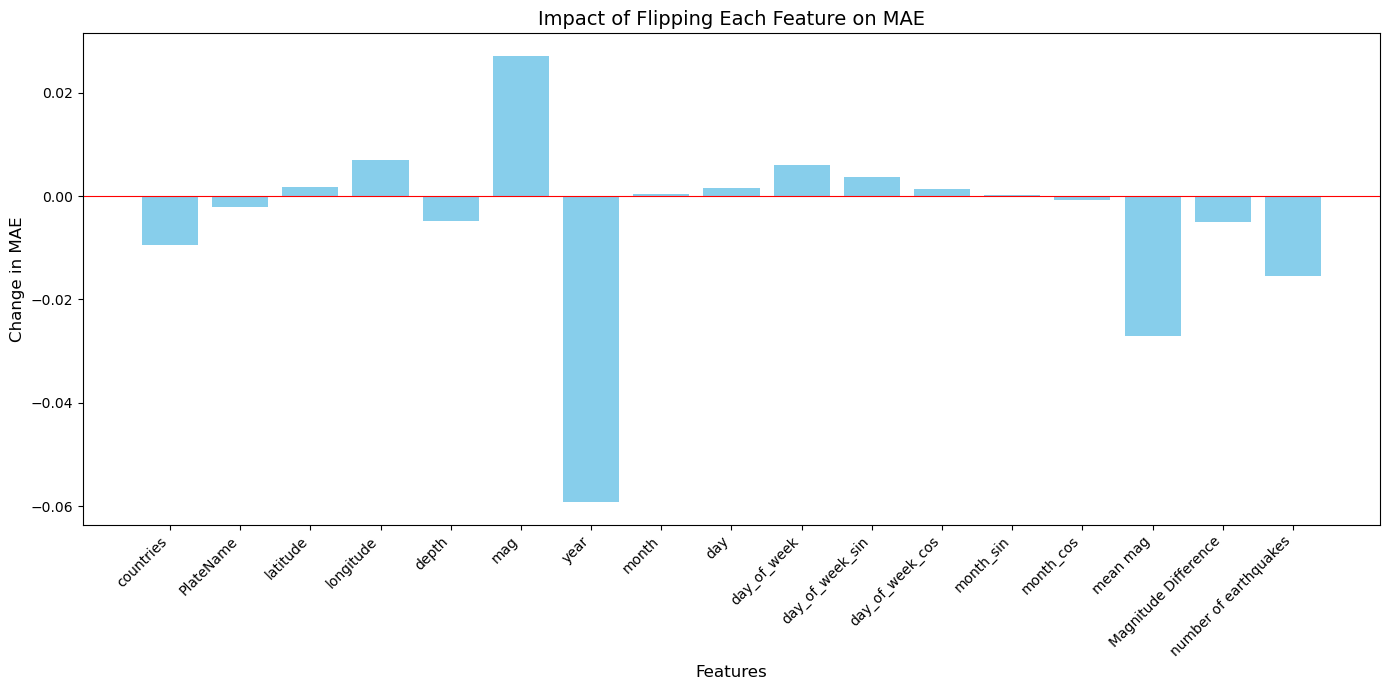

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


feature_columns = ['latitude', 'longitude', 'depth', 'mag', 'year', 'month', 'day', 'day_of_week', 'day_of_week_sin', 'day_of_week_cos', 'month_sin', 'month_cos', 'mean mag', 'Magnitude Difference', 'number of earthquakes', 'counter', 
'countries_Afghanistan', 'countries_Antarctica', 'countries_Argentina', 'countries_Australia', 'countries_Brazil', 'countries_Canada', 'countries_Chile', 'countries_China', 'countries_Colombia', 'countries_Ecuador', 
'countries_Ethiopia', 'countries_Fiji', 'countries_France', 'countries_Greece', 'countries_Guatemala', 'countries_India', 'countries_Indonesia', 'countries_Iran', 'countries_Italy', 'countries_Japan', 'countries_Kiribati', 
'countries_Mexico', 'countries_Myanmar', 'countries_Nepal', 'countries_New Zealand', 'countries_Nicaragua', 'countries_Norway', 'countries_Pakistan', 'countries_Panama', 'countries_Papua New Guinea', 'countries_Peru', 'countries_Philippines', 
'countries_Portugal', 'countries_Russia', 'countries_Samoa', 'countries_Solomon Islands', 'countries_Taiwan', 'countries_Tonga', 'countries_Trinidad and Tobago', 'countries_Turkey', 'countries_United Kingdom', 'countries_United States of America', 
'countries_Vanuatu', 'countries_nan', 'PlateName_Aegean Sea', 'PlateName_Africa', 'PlateName_Altiplano', 'PlateName_Amur', 'PlateName_Anatolia', 'PlateName_Antarctica', 'PlateName_Arabia', 'PlateName_Australia', 'PlateName_Balmoral Reef', 
'PlateName_Banda Sea', 'PlateName_Birds Head', 'PlateName_Burma', 'PlateName_Caribbean', 'PlateName_Caroline', 'PlateName_Cocos', 'PlateName_Conway Reef', 'PlateName_Easter', 'PlateName_Eurasia', 'PlateName_Futuna', 'PlateName_Galapagos', 
'PlateName_India', 'PlateName_Juan Fernandez', 'PlateName_Juan de Fuca', 'PlateName_Kermadec', 'PlateName_Manus', 'PlateName_Maoke', 'PlateName_Mariana', 'PlateName_Molucca Sea', 'PlateName_Nazca', 'PlateName_New Hebrides', "PlateName_Niuafo'ou", 
'PlateName_North America', 'PlateName_North Andes', 'PlateName_North Bismarck', 'PlateName_Okhotsk', 'PlateName_Okinawa', 'PlateName_Pacific', 'PlateName_Panama', 'PlateName_Philippine Sea', 'PlateName_Rivera', 'PlateName_Sandwich', 'PlateName_Scotia', 
'PlateName_Shetland', 'PlateName_Solomon Sea', 'PlateName_Somalia', 'PlateName_South America', 'PlateName_South Bismarck', 'PlateName_Sunda', 'PlateName_Timor', 'PlateName_Tonga', 'PlateName_Woodlark', 'PlateName_Yangtze', 'PlateName_nan']


#'countries_freq', 'PlateName_freq'
#feature_columns = ['latitude', 'longitude', 'depth', 'mag', 'year', 'month', 'day', 'day_of_week', 'day_of_week_sin', 'day_of_week_cos', 'month_sin', 'month_cos', 'mean mag', 'Magnitude Difference', 'number of earthquakes', 'counter','countries_freq', 'PlateName_freq']

# Define and map categorical features based on their encoded prefixes
categorical_features = {
    'countries': [index for index, name in enumerate(feature_columns) if 'countries_' in name],
    'PlateName': [index for index, name in enumerate(feature_columns) if 'PlateName_' in name]
}

# Include numeric features
numeric_features = ['latitude', 'longitude', 'depth', 'mag', 'year', 'month', 'day', 'day_of_week',
                    'day_of_week_sin', 'day_of_week_cos', 'month_sin', 'month_cos', 'mean mag',
                    'Magnitude Difference', 'number of earthquakes']

def flip_features_and_evaluate(model, X, feature_indices):
    """
    Flip features by setting all specified indices in the sequences to zero and evaluate the model.
    
    Parameters:
        model: Trained model to use for predictions.
        X: Original validation data sequences.
        feature_indices: List of indices of the features to flip to zero.
        
    Returns:
        Modified MAE after flipping the features.
    """
    X_flipped = np.copy(X)
    # Set all specified feature indices to zero
    X_flipped[:, :, feature_indices] = 0
    # Predict and calculate MAE
    predictions_flipped_scaled = model.predict(X_flipped)
    predictions_flipped_inverse_scaled = target_scaler.inverse_transform(predictions_flipped_scaled)
    predictions_flipped_original = np.expm1(predictions_flipped_inverse_scaled).flatten()
    new_mae = mean_absolute_error(y_val_original_values, predictions_flipped_original)
    return new_mae

# Calculate MAE for each feature when flipped
mae_differences = {}
for feature, indices in categorical_features.items():
    new_mae = flip_features_and_evaluate(best_model, X_val, indices)
    mae_differences[feature] = new_mae - mae_original
    print(f"MAE change for {feature} (categorical): {new_mae - mae_original}")

for feature in numeric_features:
    feature_index = feature_columns.index(feature)
    new_mae = flip_features_and_evaluate(best_model, X_val, [feature_index])
    mae_differences[feature] = new_mae - mae_original
    print(f"MAE change for {feature} (numeric): {new_mae - mae_original}")

# Plot the results with better handling for visibility
fig, ax = plt.subplots(figsize=(14, 7))
ax.bar(mae_differences.keys(), mae_differences.values(), color='skyblue')
ax.set_xlabel('Features', fontsize=12)
ax.set_ylabel('Change in MAE', fontsize=12)
ax.set_title('Impact of Flipping Each Feature on MAE', fontsize=14)
ax.set_xticklabels(mae_differences.keys(), rotation=45, ha="right")
ax.axhline(0, color='red', linewidth=0.8)  # Adds a horizontal line at zero change for reference
plt.tight_layout()
plt.show()


Permutation Feature Importance

149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


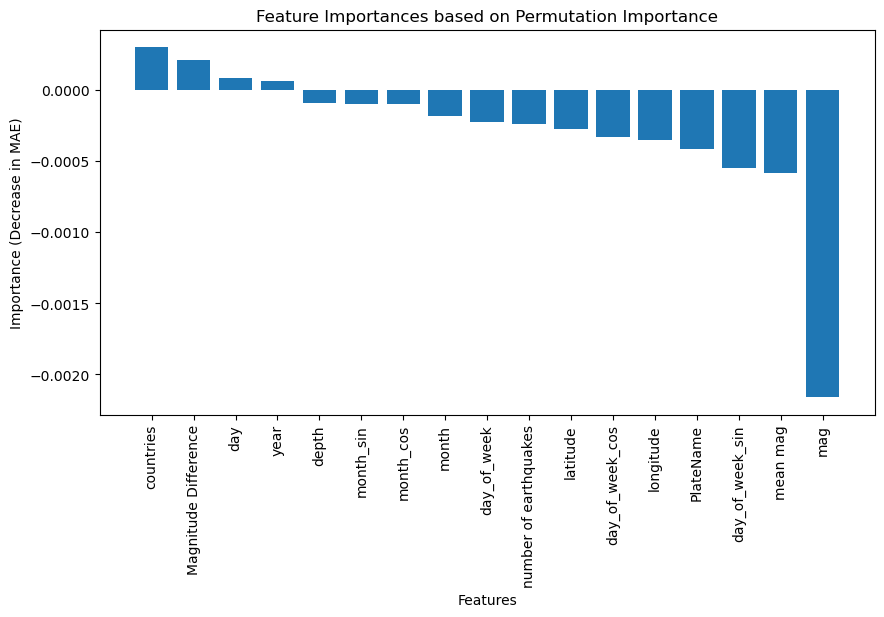

In [ ]:
from sklearn.utils import shuffle
from sklearn.metrics import mean_absolute_error

original_score = mean_absolute_error(best_model.predict(X_val), y_val)
feature_importances = {}

# Numeric features indices
numeric_feature_indices = {name: i for i, name in enumerate(feature_columns) if name in numeric_features}

# Shuffle and evaluate each numeric feature
for feature_name, index in numeric_feature_indices.items():
    X_val_permuted = np.copy(X_val)
    X_val_permuted[:, :, index] = shuffle(X_val_permuted[:, :, index])

    permuted_score = mean_absolute_error(best_model.predict(X_val_permuted), y_val)
    feature_importances[feature_name] = original_score - permuted_score

# Shuffle and evaluate each one-hot encoded categorical feature as a block
for feature_name, indices in categorical_features.items():
    X_val_permuted = np.copy(X_val)
    shuffled_indices = shuffle(np.arange(X_val.shape[0]))
    
    for index in indices:
        X_val_permuted[:, :, index] = X_val_permuted[shuffled_indices, :, index]

    permuted_score = mean_absolute_error(best_model.predict(X_val_permuted), y_val)
    feature_importances[feature_name] = original_score - permuted_score

# Sorting features by importance
sorted_features = sorted(feature_importances, key=feature_importances.get, reverse=True)

# Plotting feature importances
plt.figure(figsize=(10, 5))
bars = plt.bar(range(len(feature_importances)), [feature_importances[feature] for feature in sorted_features])
plt.xticks(range(len(feature_importances)), sorted_features, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance (Decrease in MAE)')
plt.title('Feature Importances based on Permutation Importance')
plt.show()

combined feature importance graph

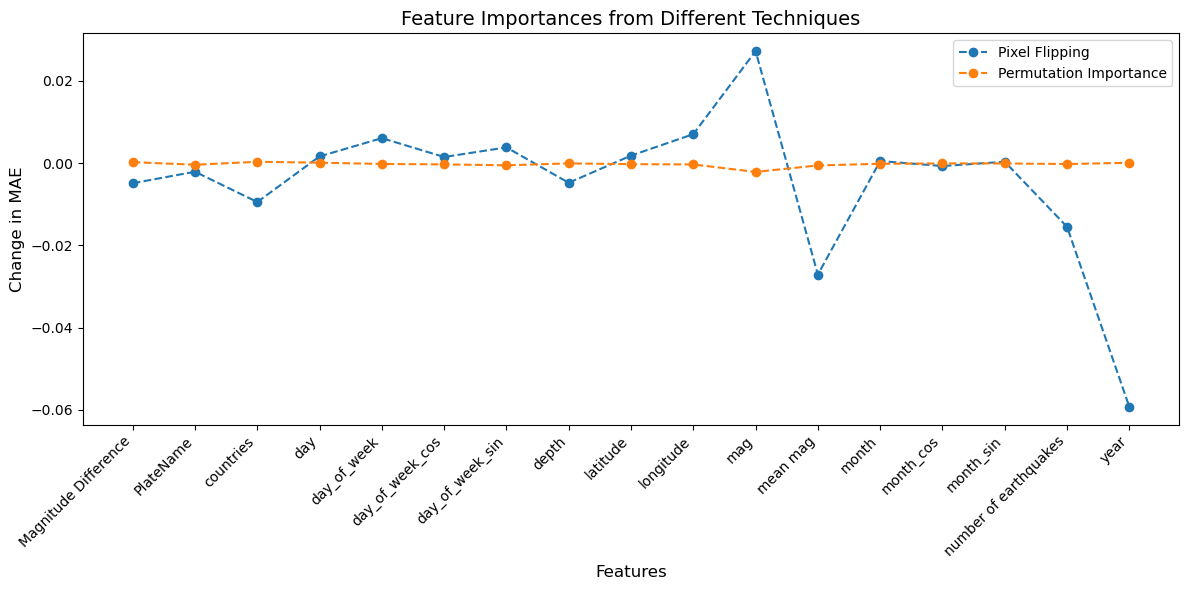

In [ ]:
# convert the dictionaries to sorted lists for plotting
features = sorted(mae_differences.keys())
pixel_flipping_values = [mae_differences[feature] for feature in features]
permutation_importance_values = [feature_importances[feature] for feature in features]

# Plot the simulated feature importances
plt.figure(figsize=(12, 6))

# Plotting both methods on the same graph
plt.plot(features, pixel_flipping_values, marker='o', linestyle='--', label='Pixel Flipping')
plt.plot(features, permutation_importance_values, marker='o', linestyle='--', label='Permutation Importance')

plt.xlabel('Features', fontsize=12)
plt.ylabel('Change in MAE', fontsize=12)
plt.title('Feature Importances from Different Techniques', fontsize=14)
plt.legend()
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

## Error Analysis

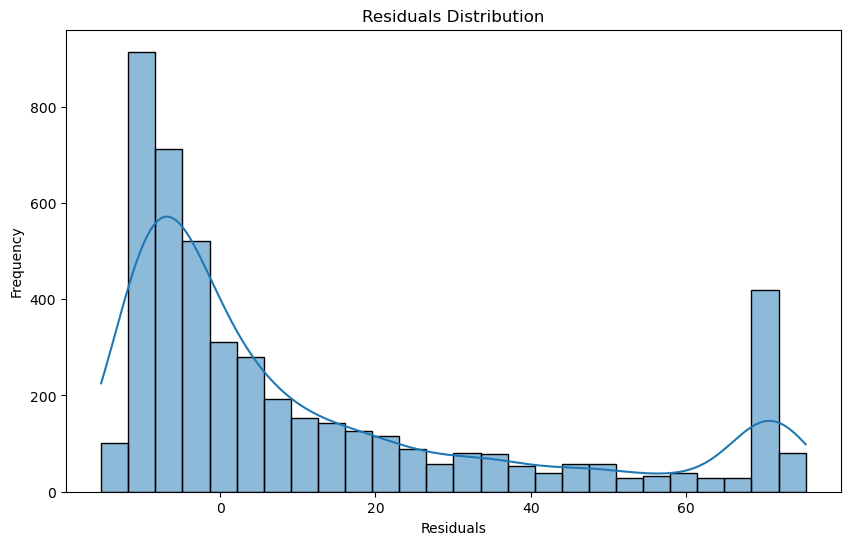

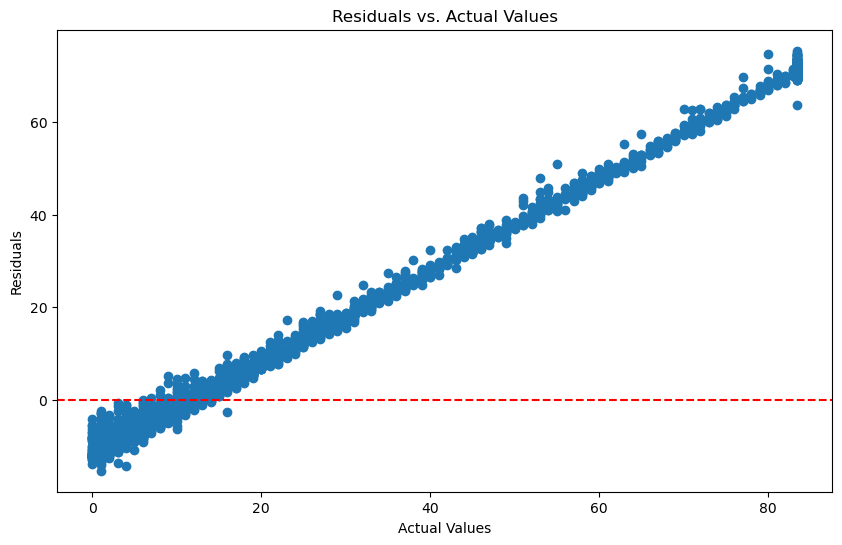

In [ ]:
# Calculate residuals
residuals = y_val_original_values - predictions_original

# Plotting the residuals distribution
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.savefig("Residuals Distribution - test set.pdf")

plt.show()

# Scatter plot of the residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_val_original_values, residuals)
plt.title('Residuals vs. Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at zero for reference
plt.savefig("Residuals Scatter Plot - test set.pdf")
plt.show()